***Import relevant packages***

In [1]:
#!pip install matplotlib-venn

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib_venn import venn2
import statsmodels.api as sm
from scipy.stats import t
import seaborn as sns
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

***Load the data***

In [3]:
# Specify the Excel file path
file_path = 'pXRF_vs_lab_assay.xlsx'

# Read the first sheet into a DataFrame
df1 = pd.read_excel(file_path, sheet_name='pXRF')

# Read the second sheet into another DataFrame
df2 = pd.read_excel(file_path, sheet_name='lab_assay')

***Convert units in lab dataset so the two datasets have consistent units***

In [4]:
# Function to convert columns with "%" in their names from percentage to ppm
def convert_to_ppm(df):
    columns_to_convert = [col for col in df.columns if '%' in col]
    for col in columns_to_convert:
        df[col.replace('%', 'ppm')] = df[col] * 10000
        df.drop(col, axis=1, inplace=True)
    return df

# Convert columns for both dataframes
df1 = convert_to_ppm(df1)
df2 = convert_to_ppm(df2)

In [5]:
df1

Point number       Prospect     Coordinates.Grid  Coordinates.East  \
0       MP01871S  Sugarbag East  GDA94 / MGA zone 56               NaN   
1       MP01101S         Ridler  GDA94 / MGA zone 56               NaN   
2       MP01101S         Ridler  GDA94 / MGA zone 56               NaN   
3       MP01101S         Ridler  GDA94 / MGA zone 56               NaN   
4       MP01061S            NaN  GDA94 / MGA zone 56               NaN   
..           ...            ...                  ...               ...   
269     MP01051S            NaN  GDA94 / MGA zone 56          324750.0   
270     MP01051S            NaN  GDA94 / MGA zone 56          324750.0   
271     MP01050S            NaN  GDA94 / MGA zone 56          324700.0   
272     MP01050S            NaN  GDA94 / MGA zone 56          324700.0   
273     MP01050S            NaN  GDA94 / MGA zone 56          324700.0   

     Coordinates.North  Coordinates.RL Sample Type       Date Units  \
0                  NaN             NaN         RAW 2023-08-10   PPM   
1                  NaN             NaN         RAW 2023-01-13   PPM   
2                  NaN             NaN         RAW 2023-01-13   PPM   
3                  NaN             NaN         RAW 2023-01-13   PPM   
4                  NaN             NaN        PULP 2023-06-06   PPM   
..                 ...             ...         ...        ...   ...   
269          7296500.0           126.0        PULP 2023-06-06   PPM   
270          7296500.0           126.0        PULP 2023-06-06   PPM   
271          7296500.0           155.0        PULP 2023-06-06   PPM   
272          7296500.0           155.0        PULP 2023-06-06   PPM   
273          7296500.0           155.0        PULP 2023-06-06   PPM   

     Mg Concentration  ...  Au Concentration  Hg Concentration  \
0              5388.0  ...           -1.0000           -1.0000   
1                 NaN  ...           -0.0001           -0.0001   
2                 NaN  ...           -0.0001           -0.0001   
3                 NaN  ...           -0.0001           -0.0001   
4              2495.0  ...           -1.0000           -1.0000   
..                ...  ...               ...               ...   
269            3436.0  ...           -1.0000           -1.0000   
270            3436.0  ...           -1.0000           -1.0000   
271           -1100.0  ...           -1.0000           -1.0000   
272           -1100.0  ...           -1.0000           -1.0000   
273           -1100.0  ...           -1.0000           -1.0000   

     Pb Concentration  Bi Concentration  Th Concentration  U Concentration  \
0             -2.0000              16.0             -2.00          -1.0000   
1             -0.0001               NaN             14.65          -0.0001   
2             -0.0001               NaN              4.17          -0.0001   
3             -0.0001               NaN             20.86          -0.0001   
4              9.0000              -1.0             14.00          -1.0000   
..                ...               ...               ...              ...   
269           10.0000              -1.0             34.00          -1.0000   
270           10.0000              -1.0             34.00          -1.0000   
271           10.0000              -1.0             27.00          -1.0000   
272           10.0000              -1.0             27.00          -1.0000   
273           10.0000              -1.0             27.00          -1.0000   

     Quality  Notes  Device  Sample Dispatch  
0        NaN      1   Vanta          SGS0010  
1        NaN    NaN   Niton          SGS0003  
2        NaN    NaN   Niton          SGS0003  
3        NaN    NaN   Niton          SGS0003  
4        NaN      1   Vanta          SGS0003  
..       ...    ...     ...              ...  
269      NaN      1   Vanta          SGS0003  
270      NaN      1   Vanta          SGS0003  
271      NaN      1   Vanta          SGS0003  
272      NaN      1   Vanta          SGS0003  
273      NaN   

In [6]:
df2

Point number Prospect     Coordinates.Grid  Coordinates.East  \
0       MP01266S   Ridler  GDA94 / MGA zone 56          325300.0   
1       MP01264S   Ridler  GDA94 / MGA zone 56          325200.0   
2       MP01260S   Ridler  GDA94 / MGA zone 56          325150.0   
3       MP01259S   Ridler  GDA94 / MGA zone 56          325100.0   
4       MP01258S   Ridler  GDA94 / MGA zone 56          325050.0   
..           ...      ...                  ...               ...   
262     MP01012S      NaN  GDA94 / MGA zone 56          325000.0   
263     MP01011S      NaN  GDA94 / MGA zone 56          324950.0   
264     MP01010S      NaN  GDA94 / MGA zone 56          324900.0   
265     MP01009S      NaN  GDA94 / MGA zone 56          324850.0   
266     MP01008S      NaN  GDA94 / MGA zone 56          324800.0   

     Coordinates.North  Coordinates.RL Sample Number Sample Type  \
0            7296050.0           155.0      MP01266S    Original   
1            7296050.0           181.0      MP01264S    Original   
2            7296050.0           187.0      MP01260S    Original   
3            7296050.0           187.0      MP01259S    Original   
4            7296050.0           189.0      MP01258S    Original   
..                 ...             ...           ...         ...   
262          7296600.0           134.0      MP01012S    Original   
263          7296600.0           139.0      MP01011S    Original   
264          7296600.0           142.0      MP01010S    Original   
265          7296600.0           142.0      MP01009S    Original   
266          7296600.0           142.0      MP01008S    Original   

     Control Type AssayMethod  ... Comments  Al ppm GO_ICP41Q100  \
0             NaN      ICP-MS  ...      NaN              64500.0   
1             NaN      ICP-MS  ...      NaN              74700.0   
2             NaN      ICP-MS  ...      NaN              73600.0   
3             NaN      ICP-MS  ...      NaN              67200.0   
4             NaN      ICP-MS  ...      NaN              80100.0   
..            ...         ...  ...      ...                  ...   
262           NaN      ICP-MS  ...      NaN              53600.0   
263           NaN      ICP-MS  ...      NaN              57600.0   
264           NaN      ICP-MS  ...      NaN              59300.0   
265           NaN      ICP-MS  ...      NaN              62300.0   
266           NaN      ICP-MS  ...      NaN              51200.0   

     Ca ppm GO_ICP41Q100  Fe ppm GO_ICP41Q100  K ppm GO_ICP41Q100  \
0                 4700.0              14300.0             33500.0   
1                 5400.0              29800.0             29600.0   
2                 8500.0              29400.0             29400.0   
3                 6200.0              29400.0             27000.0   
4                 9700.0              44900.0             22400.0   
..                   ...                  ...                 ...   
262               9000.0              27200.0             22400.0   
263               5900.0              27400.0             24000.0   
264               6700.0              27400.0             18900.0   
265               4700.0              27300.0             20800.0   
266               6300.0              17800.0             26100.0   

     Mg ppm GO_ICP41Q100  Na ppm GO_ICP41Q100  P ppm GO_ICP41Q100  \
0                 2300.0              21800.0               200.0   
1                 4200.0              23100.0               200.0   
2                 5400.0              21000.0               400.0   
3                 3900.0              20500.0               200.0   
4                 7800.0              21500.0               600.0   
..                   ...                  ...                 ...   
262               3500.0              16900.0               400.0   
263               4500.0              23200.0               500.0   
264               5900.0              20800.0               600.0   
265               3400.0          

***Count non-negative values and their percentage in each column***

In [7]:
# Function to count non-negative values and their percentage in each column
def count_non_negative(df):
    total_rows = len(df)
    for col in df.columns:
        non_neg_count = df[df[col] >= 0][col].count()
        percentage = (non_neg_count / total_rows) * 100
        print(f"{col}: {non_neg_count} non-negative values, {percentage:.2f}% of total")

In [8]:
print("For pXRF data")
count_non_negative(df1.iloc[:, 9:49])

For pXRF data
Mg Concentration: 144 non-negative values, 52.55% of total
Al Concentration: 223 non-negative values, 81.39% of total
Si Concentration: 223 non-negative values, 81.39% of total
P Concentration: 220 non-negative values, 80.29% of total
S Concentration: 6 non-negative values, 2.19% of total
K Concentration: 274 non-negative values, 100.00% of total
Ca Concentration: 274 non-negative values, 100.00% of total
Ti Concentration: 274 non-negative values, 100.00% of total
V Concentration: 243 non-negative values, 88.69% of total
Cr Concentration: 161 non-negative values, 58.76% of total
Mn Concentration: 274 non-negative values, 100.00% of total
Fe Concentration: 274 non-negative values, 100.00% of total
Co Concentration: 221 non-negative values, 80.66% of total
Ni Concentration: 245 non-negative values, 89.42% of total
Cu Concentration: 270 non-negative values, 98.54% of total
Zn Concentration: 274 non-negative values, 100.00% of total
As Concentration: 148 non-negative values, 

In [9]:
print("For lab analysis data")
count_non_negative(df2.iloc[:, 11:81])

For lab analysis data
Au Final ppm: 41 non-negative values, 15.36% of total
Ag Final ppm: 6 non-negative values, 2.25% of total
As Final ppm: 92 non-negative values, 34.46% of total
Cu Final ppm: 264 non-negative values, 98.88% of total
Mn Final ppm: 267 non-negative values, 100.00% of total
Pb Final ppm: 261 non-negative values, 97.75% of total
Ag ppm GO_IMS41Q100: 6 non-negative values, 2.25% of total
As ppm GO_IMS41Q100: 92 non-negative values, 34.46% of total
Au ppm GE_ARE2V50: 41 non-negative values, 15.36% of total
Au_R ppm GE_ARE2V50: 1 non-negative values, 0.37% of total
Au_S ppm GE_ARE2V50: 0 non-negative values, 0.00% of total
Ba ppm GO_IMS41Q100: 267 non-negative values, 100.00% of total
Be ppm GO_IMS41Q100: 265 non-negative values, 99.25% of total
Bi ppm GO_IMS41Q100: 14 non-negative values, 5.24% of total
Cd ppm GO_IMS41Q100: 0 non-negative values, 0.00% of total
Ce ppm GO_IMS41Q100: 267 non-negative values, 100.00% of total
Co ppm GO_IMS41Q100: 267 non-negative values, 10

***Plot the availablity***

Elements with at least 80% data availability (pXRF data):
Al
Si
P
K
Ca
Ti
V
Mn
Fe
Co
Ni
Cu
Zn
Rb
Sr
Y
Zr
Mo
Ba
Pb
Th


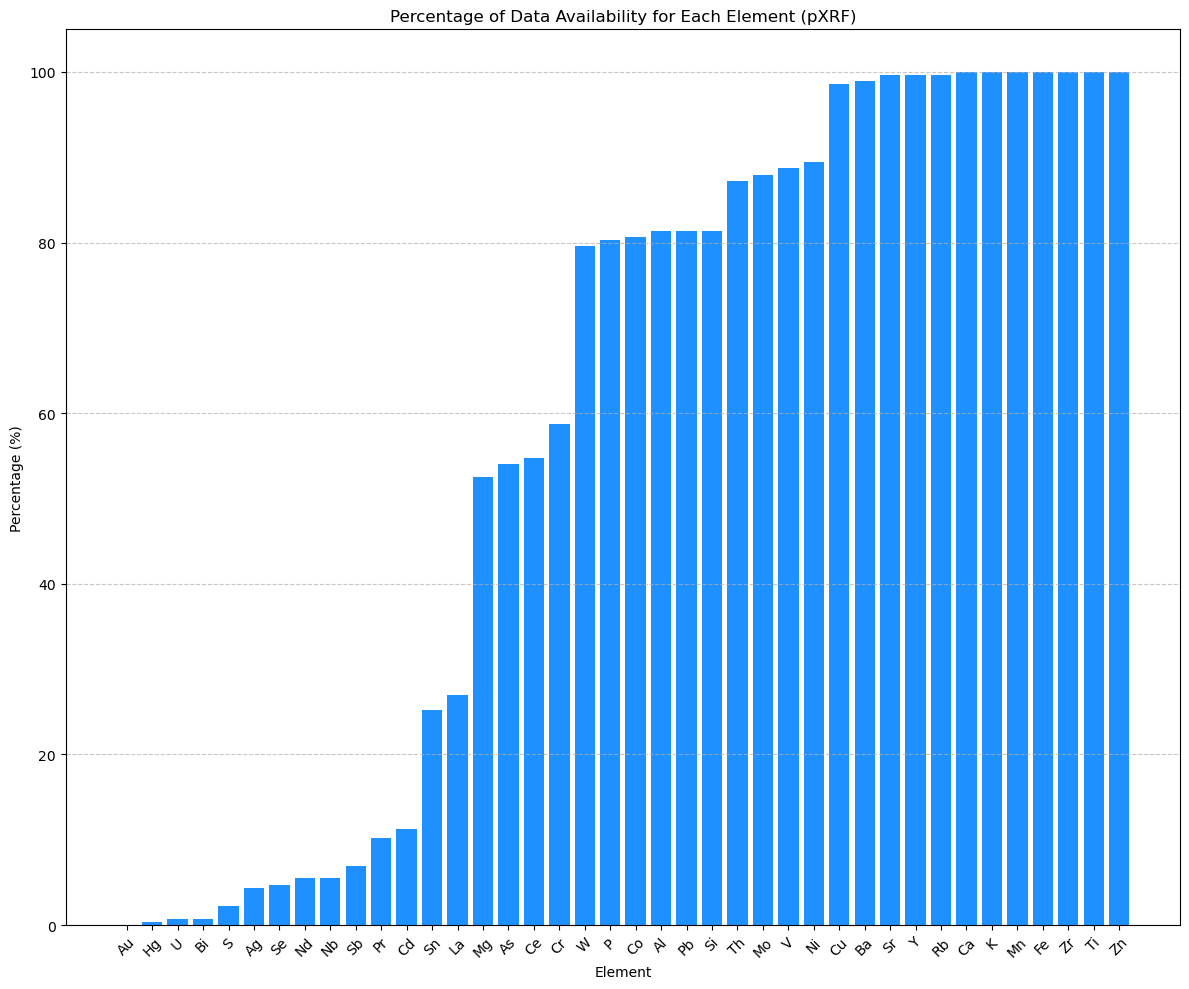

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Given data
data = {
    'Element': ['Mg', 'Al', 'Si', 'P', 'S', 'K', 'Ca', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'As', 'Se', 
                'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Ag', 'Cd', 'Sn', 'Sb', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'W', 'Au', 'Hg', 
                'Pb', 'Bi', 'Th', 'U'],
    'Percentage': [52.55, 81.39, 81.39, 80.29, 2.19, 100, 100, 100, 88.69, 58.76, 100, 100, 80.66, 89.42, 98.54, 100, 
                   54.01, 4.74, 99.64, 99.64, 99.64, 100, 5.47, 87.96, 4.38, 11.31, 25.18, 6.93, 98.91, 27.01, 54.74, 
                   10.22, 5.47, 79.56, 0, 0.36, 81.39, 0.73, 87.23, 0.73]
}

# Convert to DataFrame
df3 = pd.DataFrame(data)

# Elements with at least 80% data availability
elements_80_percent_pXRF = df3[df3['Percentage'] >= 80]['Element'].tolist()

print("Elements with at least 80% data availability (pXRF data):")
for elem in elements_80_percent_pXRF:
    print(elem)

# Sort data by percentage for visualization
df3 = df3.sort_values(by="Percentage", ascending=True)

# Plot
plt.figure(figsize=(12, 10))
plt.bar(df3['Element'], df3['Percentage'], color='dodgerblue')
plt.ylabel('Percentage (%)')
plt.xlabel('Element')
plt.title('Percentage of Data Availability for Each Element (pXRF)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig("pXRF_data_availablity.png", bbox_inches='tight', dpi=300)
plt.show()

Elements with at least 80% data availability:
Al
Si
P
K
Ca
Ti
V
Mn
Fe
Co
Ni
Cu
Zn
Rb
Sr
Y
Zr
Mo
Ba
Pb
Th


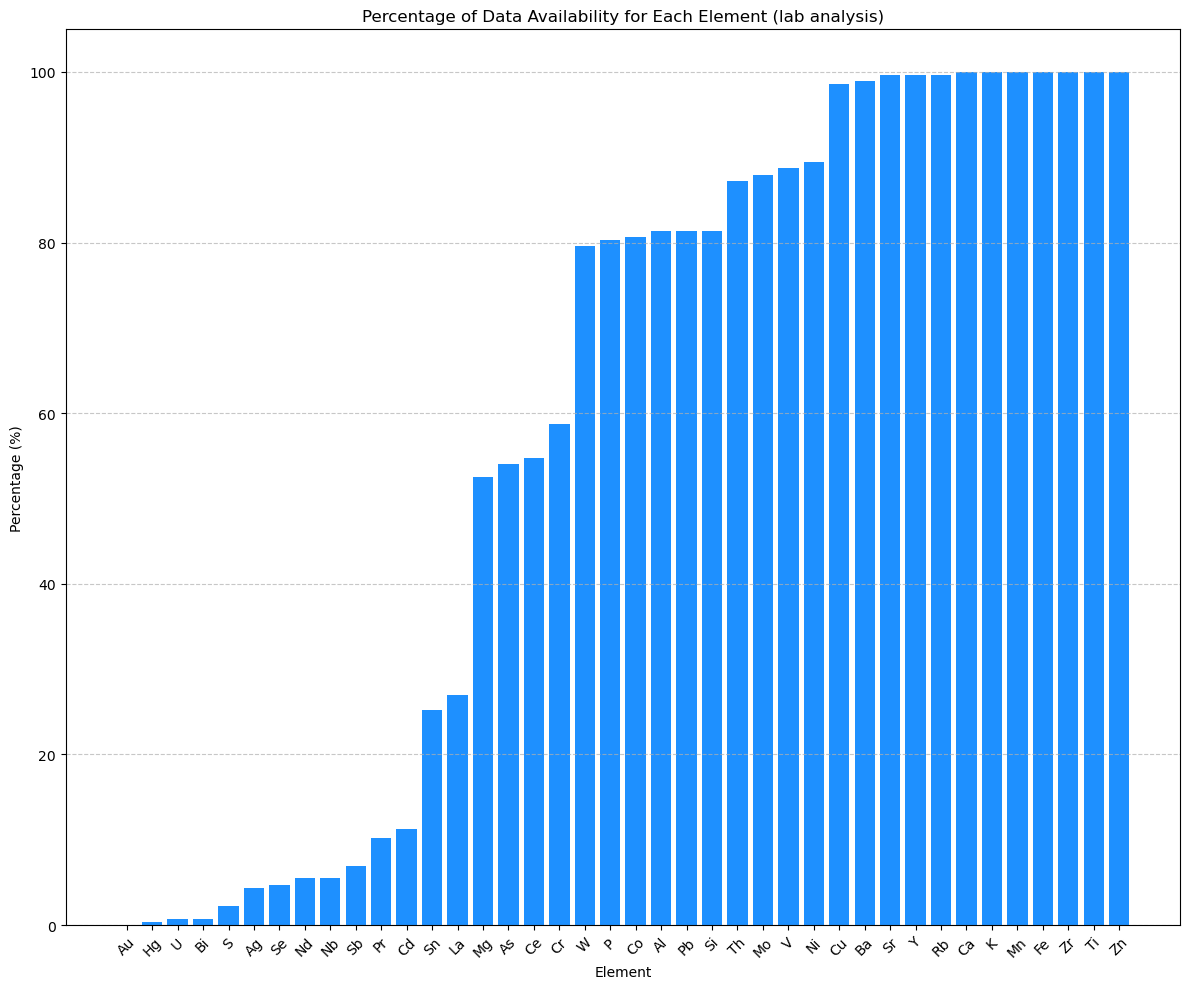

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Given data
data = {
    'Element': ['Mg', 'Al', 'Si', 'P', 'S', 'K', 'Ca', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'As', 'Se', 
                'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Ag', 'Cd', 'Sn', 'Sb', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'W', 'Au', 'Hg', 
                'Pb', 'Bi', 'Th', 'U'],
    'Percentage': [52.55, 81.39, 81.39, 80.29, 2.19, 100, 100, 100, 88.69, 58.76, 100, 100, 80.66, 89.42, 98.54, 100, 
                   54.01, 4.74, 99.64, 99.64, 99.64, 100, 5.47, 87.96, 4.38, 11.31, 25.18, 6.93, 98.91, 27.01, 54.74, 
                   10.22, 5.47, 79.56, 0, 0.36, 81.39, 0.73, 87.23, 0.73]
}

# Convert to DataFrame
df4 = pd.DataFrame(data)

# Elements with at least 80% data availability
elements_80_percent = df4[df4['Percentage'] >= 80]['Element'].tolist()

print("Elements with at least 80% data availability:")
for elem in elements_80_percent:
    print(elem)

# Sort data by percentage for visualization
df4 = df4.sort_values(by="Percentage", ascending=True)

# Plot
plt.figure(figsize=(12, 10))
plt.bar(df4['Element'], df4['Percentage'], color='dodgerblue')
plt.ylabel('Percentage (%)')
plt.xlabel('Element')
plt.title('Percentage of Data Availability for Each Element (lab analysis)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig("Lab_analysis_data_availablity.png", bbox_inches='tight', dpi=300)
plt.show()

***Rename columns***

In [12]:
# Function to rename columns by extracting the first string before the first space
def rename_columns(df):
    new_column_names = {}
    for col in df.columns:
        new_name = col.split(' ')[0]
        new_column_names[col] = new_name
    
    df.rename(columns=new_column_names, inplace=True)

In [13]:
# Rename columns
rename_columns(df1)

# Display renamed DataFrame
df1

Point       Prospect     Coordinates.Grid  Coordinates.East  \
0    MP01871S  Sugarbag East  GDA94 / MGA zone 56               NaN   
1    MP01101S         Ridler  GDA94 / MGA zone 56               NaN   
2    MP01101S         Ridler  GDA94 / MGA zone 56               NaN   
3    MP01101S         Ridler  GDA94 / MGA zone 56               NaN   
4    MP01061S            NaN  GDA94 / MGA zone 56               NaN   
..        ...            ...                  ...               ...   
269  MP01051S            NaN  GDA94 / MGA zone 56          324750.0   
270  MP01051S            NaN  GDA94 / MGA zone 56          324750.0   
271  MP01050S            NaN  GDA94 / MGA zone 56          324700.0   
272  MP01050S            NaN  GDA94 / MGA zone 56          324700.0   
273  MP01050S            NaN  GDA94 / MGA zone 56          324700.0   

     Coordinates.North  Coordinates.RL  Sample       Date Units      Mg  ...  \
0                  NaN             NaN     RAW 2023-08-10   PPM  5388.0  ...   
1                  NaN             NaN     RAW 2023-01-13   PPM     NaN  ...   
2                  NaN             NaN     RAW 2023-01-13   PPM     NaN  ...   
3                  NaN             NaN     RAW 2023-01-13   PPM     NaN  ...   
4                  NaN             NaN    PULP 2023-06-06   PPM  2495.0  ...   
..                 ...             ...     ...        ...   ...     ...  ...   
269          7296500.0           126.0    PULP 2023-06-06   PPM  3436.0  ...   
270          7296500.0           126.0    PULP 2023-06-06   PPM  3436.0  ...   
271          7296500.0           155.0    PULP 2023-06-06   PPM -1100.0  ...   
272          7296500.0           155.0    PULP 2023-06-06   PPM -1100.0  ...   
273          7296500.0           155.0    PULP 2023-06-06   PPM -1100.0  ...   

         Au      Hg       Pb    Bi     Th       U  Quality  Notes  Device  \
0   -1.0000 -1.0000  -2.0000  16.0  -2.00 -1.0000      NaN      1   Vanta   
1   -0.0001 -0.0001  -0.0001   NaN  14.65 -0.0001      NaN    NaN   Niton   
2   -0.0001 -0.0001  -0.0001   NaN   4.17 -0.0001      NaN    NaN   Niton   
3   -0.0001 -0.0001  -0.0001   NaN  20.86 -0.0001      NaN    NaN   Niton   
4   -1.0000 -1.0000   9.0000  -1.0  14.00 -1.0000      NaN      1   Vanta   
..      ...     ...      ...   ...    ...     ...      ...    ...     ...   
269 -1.0000 -1.0000  10.0000  -1.0  34.00 -1.0000      NaN      1   Vanta   
270 -1.0000 -1.0000  10.0000  -1.0  34.00 -1.0000      NaN      1   Vanta   
271 -1.0000 -1.0000  10.0000  -1.0  27.00 -1.0000      NaN      1   Vanta   
272 -1.0000 -1.0000  10.0000  -1.0  27.00 -1.0000      NaN      1   Vanta   
273 -1.0000 -1.0000  10.0000  -1.0  27.00 -1.0000      NaN      1   Vanta   

      Sample  
0    SGS0010  
1    SGS0003  
2    SGS0003  
3    SGS0003  
4    SGS0003  
..       ...  
269  SGS0003  
270  SGS0003  
271  SGS0003  
272  SGS0003  
273  SGS0003  

[274 rows x 53 columns]

In [14]:
# Rename columns
rename_columns(df2)

# Display renamed DataFrame
df2

Point Prospect     Coordinates.Grid  Coordinates.East  \
0    MP01266S   Ridler  GDA94 / MGA zone 56          325300.0   
1    MP01264S   Ridler  GDA94 / MGA zone 56          325200.0   
2    MP01260S   Ridler  GDA94 / MGA zone 56          325150.0   
3    MP01259S   Ridler  GDA94 / MGA zone 56          325100.0   
4    MP01258S   Ridler  GDA94 / MGA zone 56          325050.0   
..        ...      ...                  ...               ...   
262  MP01012S      NaN  GDA94 / MGA zone 56          325000.0   
263  MP01011S      NaN  GDA94 / MGA zone 56          324950.0   
264  MP01010S      NaN  GDA94 / MGA zone 56          324900.0   
265  MP01009S      NaN  GDA94 / MGA zone 56          324850.0   
266  MP01008S      NaN  GDA94 / MGA zone 56          324800.0   

     Coordinates.North  Coordinates.RL    Sample    Sample  Control  \
0            7296050.0           155.0  MP01266S  Original      NaN   
1            7296050.0           181.0  MP01264S  Original      NaN   
2            7296050.0           187.0  MP01260S  Original      NaN   
3            7296050.0           187.0  MP01259S  Original      NaN   
4            7296050.0           189.0  MP01258S  Original      NaN   
..                 ...             ...       ...       ...      ...   
262          7296600.0           134.0  MP01012S  Original      NaN   
263          7296600.0           139.0  MP01011S  Original      NaN   
264          7296600.0           142.0  MP01010S  Original      NaN   
265          7296600.0           142.0  MP01009S  Original      NaN   
266          7296600.0           142.0  MP01008S  Original      NaN   

    AssayMethod  ... Comments       Al      Ca       Fe        K      Mg  \
0        ICP-MS  ...      NaN  64500.0  4700.0  14300.0  33500.0  2300.0   
1        ICP-MS  ...      NaN  74700.0  5400.0  29800.0  29600.0  4200.0   
2        ICP-MS  ...      NaN  73600.0  8500.0  29400.0  29400.0  5400.0   
3        ICP-MS  ...      NaN  67200.0  6200.0  29400.0  27000.0  3900.0   
4        ICP-MS  ...      NaN  80100.0  9700.0  44900.0  22400.0  7800.0   
..          ...  ...      ...      ...     ...      ...      ...     ...   
262      ICP-MS  ...      NaN  53600.0  9000.0  27200.0  22400.0  3500.0   
263      ICP-MS  ...      NaN  57600.0  5900.0  27400.0  24000.0  4500.0   
264      ICP-MS  ...      NaN  59300.0  6700.0  27400.0  18900.0  5900.0   
265      ICP-MS  ...      NaN  62300.0  4700.0  27300.0  20800.0  3400.0   
266      ICP-MS  ...      NaN  51200.0  6300.0  17800.0  26100.0  3300.0   

          Na      P      S      Ti  
0    21800.0  200.0 -100.0  2290.0  
1    23100.0  200.0 -100.0  2750.0  
2    21000.0  400.0  200.0  2850.0  
3    20500.0  200.0  100.0  3250.0  
4    21500.0  600.0  200.0  4760.0  
..       ...    ...    ...     ...  
262  16900.0  400.0  200.0  5210.0  
263  23200.0  500.0  200.0  3850.0  
264  20800.0  600.0  200.0  4000.0  
265  24800.0  500.0  200.0  4210.0  
266  23000.0  400.0  200.0  3600.0  

[267 rows x 106 columns]

***Find overlapping elements***

In [15]:
# Extract the desired columns from df1 and df2
df1_filtered = df1.iloc[:, 9:49]
df2_filtered = df2.iloc[:, 11:81]

# Find overlapping column names
overlapping_columns = set(df1_filtered.columns).intersection(set(df2_filtered.columns))

# Count of overlapping columns
count_overlapping = len(overlapping_columns)

# Print results
print(f"Number of overlapping columns between pXRF data and lab analysis data: {count_overlapping}")
print(f"Overlapping columns are: {overlapping_columns}")

Number of overlapping columns between pXRF data and lab analysis data: 30
Overlapping columns are: {'Nb', 'Cr', 'Co', 'As', 'Au', 'La', 'Sr', 'Mo', 'Pb', 'U', 'Y', 'Rb', 'Cu', 'Sn', 'Ag', 'Cd', 'V', 'Zr', 'Th', 'Pr', 'Nd', 'Ce', 'W', 'Zn', 'Se', 'Bi', 'Ba', 'Sb', 'Ni', 'Mn'}


***Create Venn diagram***

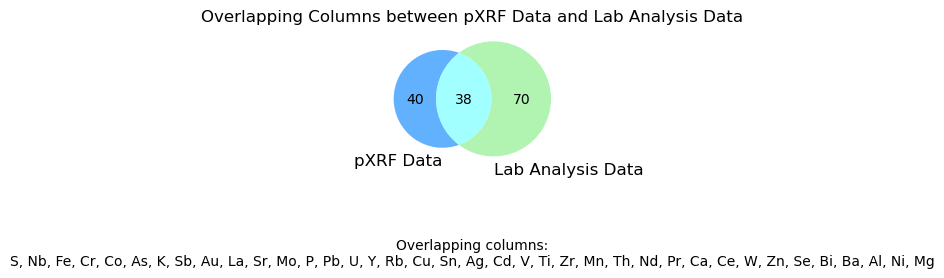

In [16]:
# Adjusted total columns for each dataset
total_pXRF = 40
total_lab_analysis = 70

# Overlapping columns
overlap_columns = {'Ag', 'Se', 'As', 'Zn', 'Zr', 'Th', 'Ca', 'Ti', 'Al', 'Ba', 'La', 'Cd', 'Fe', 'K', 'Au', 'Ni', 
                   'Nd', 'Mg', 'Mo', 'U', 'W', 'Pb', 'Y', 'P', 'Cu', 'Co', 'Rb', 'Sr', 'Nb', 'Sn', 'Ce', 'Cr', 
                   'Pr', 'Bi', 'Sb', 'S', 'Mn', 'V'}

# Create Venn diagram
venn = venn2(subsets=(total_pXRF, total_lab_analysis, len(overlap_columns)),
      set_labels=('pXRF Data', 'Lab Analysis Data'),
      set_colors=('dodgerblue', 'lightgreen'),
      alpha=0.7)

plt.title("Overlapping Columns between pXRF Data and Lab Analysis Data")

# Displaying the overlapping column names below the Venn diagram
overlap_str = ', '.join(overlap_columns)
plt.annotate(f"Overlapping columns:\n{overlap_str}", xy=(0.5, -0.5), ha='center', va='top', xycoords='axes fraction')

# Adjust the plot layout to fit the text
plt.tight_layout()
plt.savefig("venn_diagram.png", bbox_inches='tight', dpi=300)
plt.show()


In [17]:
df1.set_index('Point', inplace=True)

df1

Prospect     Coordinates.Grid  Coordinates.East  \
Point                                                            
MP01871S  Sugarbag East  GDA94 / MGA zone 56               NaN   
MP01101S         Ridler  GDA94 / MGA zone 56               NaN   
MP01101S         Ridler  GDA94 / MGA zone 56               NaN   
MP01101S         Ridler  GDA94 / MGA zone 56               NaN   
MP01061S            NaN  GDA94 / MGA zone 56               NaN   
...                 ...                  ...               ...   
MP01051S            NaN  GDA94 / MGA zone 56          324750.0   
MP01051S            NaN  GDA94 / MGA zone 56          324750.0   
MP01050S            NaN  GDA94 / MGA zone 56          324700.0   
MP01050S            NaN  GDA94 / MGA zone 56          324700.0   
MP01050S            NaN  GDA94 / MGA zone 56          324700.0   

          Coordinates.North  Coordinates.RL  Sample       Date Units      Mg  \
Point                                                                          
MP01871S                NaN             NaN     RAW 2023-08-10   PPM  5388.0   
MP01101S                NaN             NaN     RAW 2023-01-13   PPM     NaN   
MP01101S                NaN             NaN     RAW 2023-01-13   PPM     NaN   
MP01101S                NaN             NaN     RAW 2023-01-13   PPM     NaN   
MP01061S                NaN             NaN    PULP 2023-06-06   PPM  2495.0   
...                     ...             ...     ...        ...   ...     ...   
MP01051S          7296500.0           126.0    PULP 2023-06-06   PPM  3436.0   
MP01051S          7296500.0           126.0    PULP 2023-06-06   PPM  3436.0   
MP01050S          7296500.0           155.0    PULP 2023-06-06   PPM -1100.0   
MP01050S          7296500.0           155.0    PULP 2023-06-06   PPM -1100.0   
MP01050S          7296500.0           155.0    PULP 2023-06-06   PPM -1100.0   

               Al  ...      Au      Hg       Pb    Bi     Th       U  Quality  \
Point              ...                                                          
MP01871S  51655.0  ... -1.0000 -1.0000  -2.0000  16.0  -2.00 -1.0000      NaN   
MP01101S      NaN  ... -0.0001 -0.0001  -0.0001   NaN  14.65 -0.0001      NaN   
MP01101S      NaN  ... -0.0001 -0.0001  -0.0001   NaN   4.17 -0.0001      NaN   
MP01101S      NaN  ... -0.0001 -0.0001  -0.0001   NaN  20.86 -0.0001      NaN   
MP01061S  60436.0  ... -1.0000 -1.0000   9.0000  -1.0  14.00 -1.0000      NaN   
...           ...  ...     ...     ...      ...   ...    ...     ...      ...   
MP01051S  53508.0  ... -1.0000 -1.0000  10.0000  -1.0  34.00 -1.0000      NaN   
MP01051S  53508.0  ... -1.0000 -1.0000  10.0000  -1.0  34.00 -1.0000      NaN   
MP01050S  47016.0  ... -1.0000 -1.0000  10.0000  -1.0  27.00 -1.0000      NaN   
MP01050S  47016.0  ... -1.0000 -1.0000  10.0000  -1.0  27.00 -1.0000      NaN   
MP01050S  47016.0  ... -1.0000 -1.0000  10.0000  -1.0  27.00 -1.0000      NaN   

          Notes  Device   Sample  
Point                             
MP01871S      1   Vanta  SGS0010  
MP01101S    NaN   Niton  SGS0003  
MP01101S    NaN   Niton  SGS0003  
MP01101S    NaN   Niton  SGS0003  
MP01061S      1   Vanta  SGS0003  
...         ...     ...      ...  
MP01051S      1   Vanta  SGS0003  
MP01051S      1   Vanta  SGS0003  
MP01050S      1   Vanta  SGS0003  
MP01050S      1   Vanta  SGS0003  
MP01050S      1   Vanta  SGS0003  

[274 rows x 52 columns]

In [18]:
df2.set_index('Point', inplace=True)

df2

Prospect     Coordinates.Grid  Coordinates.East  Coordinates.North  \
Point                                                                         
MP01266S   Ridler  GDA94 / MGA zone 56          325300.0          7296050.0   
MP01264S   Ridler  GDA94 / MGA zone 56          325200.0          7296050.0   
MP01260S   Ridler  GDA94 / MGA zone 56          325150.0          7296050.0   
MP01259S   Ridler  GDA94 / MGA zone 56          325100.0          7296050.0   
MP01258S   Ridler  GDA94 / MGA zone 56          325050.0          7296050.0   
...           ...                  ...               ...                ...   
MP01012S      NaN  GDA94 / MGA zone 56          325000.0          7296600.0   
MP01011S      NaN  GDA94 / MGA zone 56          324950.0          7296600.0   
MP01010S      NaN  GDA94 / MGA zone 56          324900.0          7296600.0   
MP01009S      NaN  GDA94 / MGA zone 56          324850.0          7296600.0   
MP01008S      NaN  GDA94 / MGA zone 56          324800.0          7296600.0   

          Coordinates.RL    Sample    Sample  Control AssayMethod   Sample  \
Point                                                                        
MP01266S           155.0  MP01266S  Original      NaN      ICP-MS  SGS0007   
MP01264S           181.0  MP01264S  Original      NaN      ICP-MS  SGS0007   
MP01260S           187.0  MP01260S  Original      NaN      ICP-MS  SGS0007   
MP01259S           187.0  MP01259S  Original      NaN      ICP-MS  SGS0007   
MP01258S           189.0  MP01258S  Original      NaN      ICP-MS  SGS0007   
...                  ...       ...       ...      ...         ...      ...   
MP01012S           134.0  MP01012S  Original      NaN      ICP-MS  SGS0003   
MP01011S           139.0  MP01011S  Original      NaN      ICP-MS  SGS0003   
MP01010S           142.0  MP01010S  Original      NaN      ICP-MS  SGS0003   
MP01009S           142.0  MP01009S  Original      NaN      ICP-MS  SGS0003   
MP01008S           142.0  MP01008S  Original      NaN      ICP-MS  SGS0003   

          ...  Comments       Al      Ca       Fe        K      Mg       Na  \
Point     ...                                                                 
MP01266S  ...       NaN  64500.0  4700.0  14300.0  33500.0  2300.0  21800.0   
MP01264S  ...       NaN  74700.0  5400.0  29800.0  29600.0  4200.0  23100.0   
MP01260S  ...       NaN  73600.0  8500.0  29400.0  29400.0  5400.0  21000.0   
MP01259S  ...       NaN  67200.0  6200.0  29400.0  27000.0  3900.0  20500.0   
MP01258S  ...       NaN  80100.0  9700.0  44900.0  22400.0  7800.0  21500.0   
...       ...       ...      ...     ...      ...      ...     ...      ...   
MP01012S  ...       NaN  53600.0  9000.0  27200.0  22400.0  3500.0  16900.0   
MP01011S  ...       NaN  57600.0  5900.0  27400.0  24000.0  4500.0  23200.0   
MP01010S  ...       NaN  59300.0  6700.0  27400.0  18900.0  5900.0  20800.0   
MP01009S  ...       NaN  62300.0  4700.0  27300.0  20800.0  3400.0  24800.0   
MP01008S  ...       NaN  51200.0  6300.0  17800.0  26100.0  3300.0  23000.0   

              P      S      Ti  
Point                           
MP01266S  200.0 -100.0  2290.0  
MP01264S  200.0 -100.0  2750.0  
MP01260S  400.0  200.0  2850.0  
MP01259S  200.0  100.0  3250.0  
MP01258S  600.0  200.0  4760.0  
...         ...    ...     ...  
MP01012S  400.0  200.0  5210.0  
MP01011S  500.0  200.0  3850.0  
MP01010S  600.0  200.0  4000.0  
MP01009S  500.0  200.0  4210.0  
MP01008S  400.0  200.0  3600.0  

[267 rows x 105 columns]

In [19]:
df1.iloc[:, 9:49]

Al        Si      P        S         K        Ca       Ti  \
Point                                                                      
MP01871S  51655.0  201272.0  652.0 -13.0000   8282.00   5447.00  5712.00   
MP01101S      NaN       NaN    NaN  -0.0001  21227.39  10557.50  4127.36   
MP01101S      NaN       NaN    NaN  -0.0001  16823.53   9522.32  3466.78   
MP01101S      NaN       NaN    NaN  -0.0001  21246.46  10343.35  4690.04   
MP01061S  60436.0  250659.0  387.0 -13.0000  27517.00   7081.00  4577.00   
...           ...       ...    ...      ...       ...       ...      ...   
MP01051S  53508.0  212475.0  443.0 -13.0000  24004.00  10506.00  4583.00   
MP01051S  53508.0  212475.0  443.0 -13.0000  24004.00  10506.00  4583.00   
MP01050S  47016.0  232222.0  306.0 -13.0000  24453.00   7456.00  4289.00   
MP01050S  47016.0  232222.0  306.0 -13.0000  24453.00   7456.00  4289.00   
MP01050S  47016.0  232222.0  306.0 -13.0000  24453.00   7456.00  4289.00   

               V       Cr       Mn  ...    Pr    Nd        W      Au      Hg  \
Point                               ...                                        
MP01871S  127.00  -8.0000  1447.00  ... -30.0 -60.0  18.0000 -1.0000 -1.0000   
MP01101S  116.47  -0.0001   347.30  ...   NaN   NaN  -0.0001 -0.0001 -0.0001   
MP01101S   83.05  -0.0001   306.24  ...   NaN   NaN  -0.0001 -0.0001 -0.0001   
MP01101S   92.70  -0.0001   425.59  ...   NaN   NaN  -0.0001 -0.0001 -0.0001   
MP01061S  110.00  41.0000   387.00  ... -30.0 -60.0  19.0000 -1.0000 -1.0000   
...          ...      ...      ...  ...   ...   ...      ...     ...     ...   
MP01051S  156.00  67.0000   369.00  ... -30.0 -60.0  11.0000 -1.0000 -1.0000   
MP01051S  156.00  67.0000   369.00  ... -30.0 -60.0  11.0000 -1.0000 -1.0000   
MP01050S   91.00  -8.0000   268.00  ... -30.0 -60.0  11.0000 -1.0000 -1.0000   
MP01050S   91.00  -8.0000   268.00  ... -30.0 -60.0  11.0000 -1.0000 -1.0000   
MP01050S   91.00  -8.0000   268.00  ... -30.0 -60.0  11.0000 -1.0000 -1.0000   

               Pb    Bi     Th       U  Quality  
Point                                            
MP01871S  -2.0000  16.0  -2.00 -1.0000      NaN  
MP01101S  -0.0001   NaN  14.65 -0.0001      NaN  
MP01101S  -0.0001   NaN   4.17 -0.0001      NaN  
MP01101S  -0.0001   NaN  20.86 -0.0001      NaN  
MP01061S   9.0000  -1.0  14.00 -1.0000      NaN  
...           ...   ...    ...     ...      ...  
MP01051S  10.0000  -1.0  34.00 -1.0000      NaN  
MP01051S  10.0000  -1.0  34.00 -1.0000      NaN  
MP01050S  10.0000  -1.0  27.00 -1.0000      NaN  
MP01050S  10.0000  -1.0  27.00 -1.0000      NaN  
MP01050S  10.0000  -1.0  27.00 -1.0000      NaN  

[274 rows x 40 columns]

In [20]:
df2.iloc[:, 11:81]

Ag  As  Cu   Mn  Pb   Ag  As    Au  Au_R  Au_S  ...  Lith1  \
Point                                                      ...          
MP01266S -0.5  -5  31  224   9 -0.5  -5 -0.01 -0.01   NaN  ...    NaN   
MP01264S -0.5  -5  37  148  17 -0.5  -5 -0.01   NaN   NaN  ...    NaN   
MP01260S -0.5  -5  52  247  17 -0.5  -5  0.01   NaN   NaN  ...    NaN   
MP01259S -0.5  -5  32  316  18 -0.5  -5  0.01   NaN   NaN  ...    NaN   
MP01258S -0.5  -5  39  536  11 -0.5  -5 -0.01   NaN   NaN  ...    NaN   
...       ...  ..  ..  ...  ..  ...  ..   ...   ...   ...  ...    ...   
MP01012S -0.5  10  38  425   8 -0.5  10 -0.01   NaN   NaN  ...    NaN   
MP01011S -0.5   9  45  491   7 -0.5   9 -0.01   NaN   NaN  ...    NaN   
MP01010S -0.5   7  57  339   8 -0.5   7 -0.01   NaN   NaN  ...    NaN   
MP01009S -0.5   9  92  309   8 -0.5   9 -0.01   NaN   NaN  ...    NaN   
MP01008S -0.5   5  42  420   8 -0.5   5 -0.01   NaN   NaN  ...    NaN   

          Colour1  Texture1  Lith2  Colour2  Texture2  Struc1Type  \
Point                                                               
MP01266S      NaN       NaN    NaN      NaN       NaN         NaN   
MP01264S      NaN       NaN    NaN      NaN       NaN         NaN   
MP01260S      NaN       NaN    NaN      NaN       NaN         NaN   
MP01259S      NaN       NaN    NaN      NaN       NaN         NaN   
MP01258S      NaN       NaN    NaN      NaN       NaN         NaN   
...           ...       ...    ...      ...       ...         ...   
MP01012S      NaN       NaN    NaN      NaN       NaN         NaN   
MP01011S      NaN       NaN    NaN      NaN       NaN         NaN   
MP01010S      NaN       NaN    NaN      NaN       NaN         NaN   
MP01009S      NaN       NaN    NaN      NaN       NaN         NaN   
MP01008S      NaN       NaN    NaN      NaN       NaN         NaN   

          Struct2Type  Alt1  Alt1Style  
Point                                   
MP01266S          NaN   NaN        NaN  
MP01264S          NaN   NaN        NaN  
MP01260S          NaN   NaN        NaN  
MP01259S          NaN   NaN        NaN  
MP01258S          NaN   NaN        NaN  
...               ...   ...        ...  
MP01012S          NaN   NaN        NaN  
MP01011S          NaN   NaN        NaN  
MP01010S          NaN   NaN        NaN  
MP01009S          NaN   NaN        NaN  
MP01008S          NaN   NaN        NaN  

[267 rows x 70 columns]

***Find intersection for common elements in both datasets with at least 80% availablity***

In [21]:
selected_elements_pXRF = ['Al', 'Si', 'P', 'K', 'Ca', 'Ti', 'V', 'Mn', 'Fe', 'Co', 
                    'Ni', 'Cu', 'Zn', 'Rb', 'Sr', 'Y', 'Zr', 'Mo', 'Ba', 'Pb', 'Th']

selected_elements_lab = ['Al', 'Si', 'P', 'K', 'Ca', 'Ti', 'V', 'Mn', 'Fe', 'Co', 'Ni', 
                         'Cu', 'Zn', 'Rb', 'Sr', 'Y', 'Zr', 'Mo', 'Ba', 'Pb', 'Th']

# Find intersection
intersection = list(set(selected_elements_pXRF) & set(selected_elements_lab))

print(intersection)

['Si', 'Fe', 'Co', 'K', 'Sr', 'Mo', 'Pb', 'P', 'Cu', 'Y', 'Rb', 'V', 'Ti', 'Zr', 'Th', 'Ca', 'Zn', 'Ba', 'Al', 'Ni', 'Mn']


In [22]:
len(intersection)

21

***Plot the linear regression***

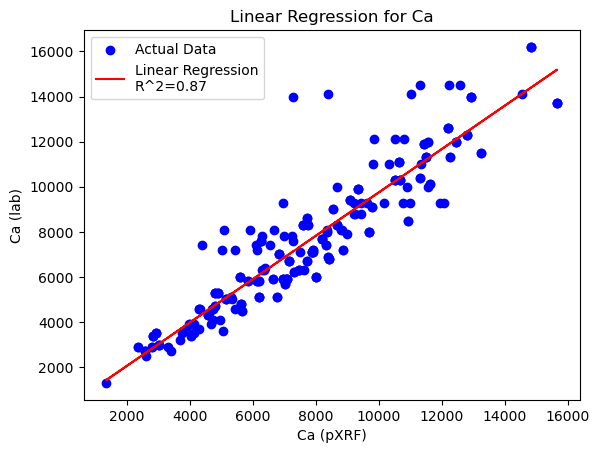

Linear Regression function for Ca: y = 0.96x + 143.06


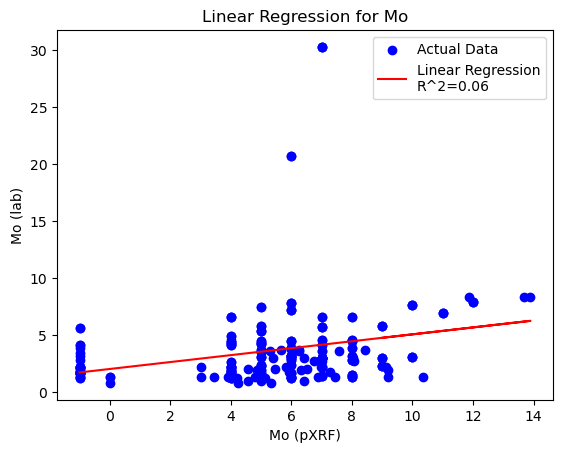

Linear Regression function for Mo: y = 0.30x + 2.02


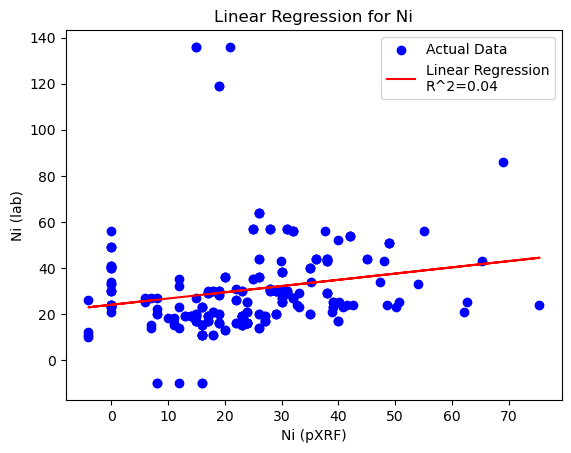

Linear Regression function for Ni: y = 0.27x + 23.96


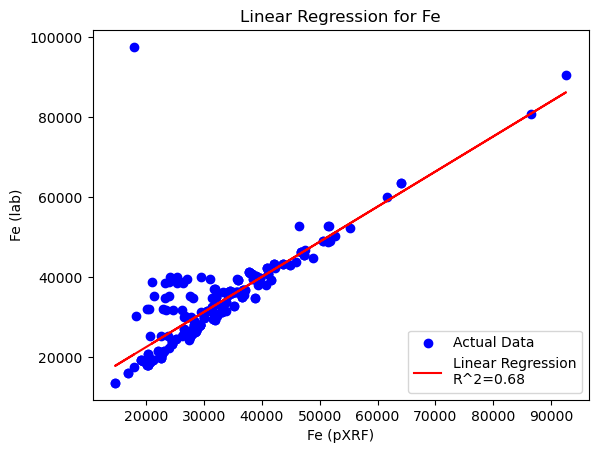

Linear Regression function for Fe: y = 0.88x + 4971.36


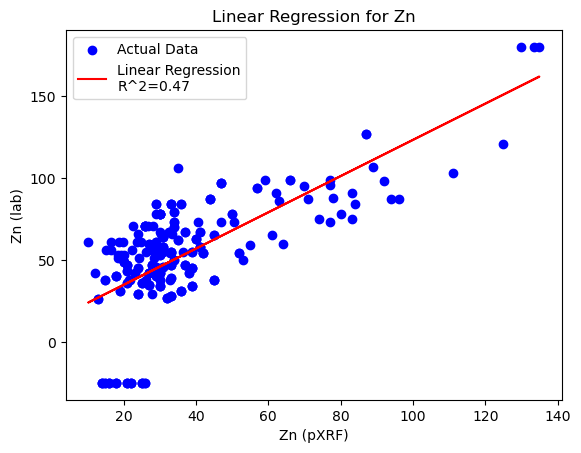

Linear Regression function for Zn: y = 1.11x + 12.70


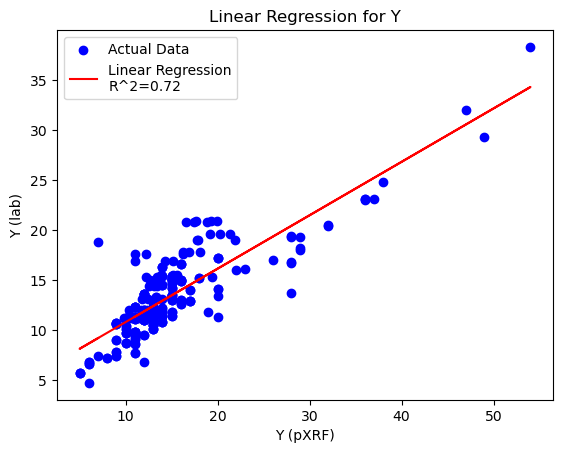

Linear Regression function for Y: y = 0.53x + 5.44


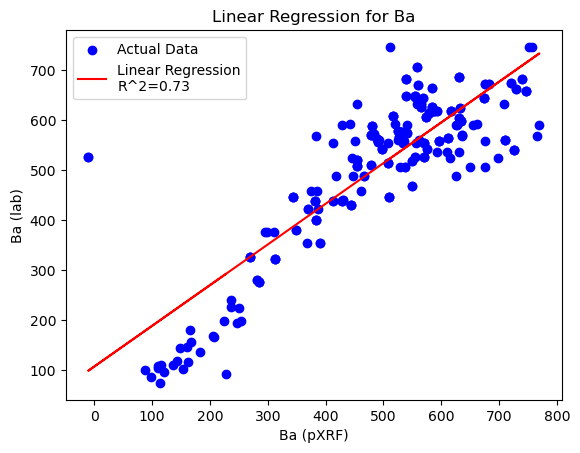

Linear Regression function for Ba: y = 0.81x + 107.75
Si not present in both DataFrames.


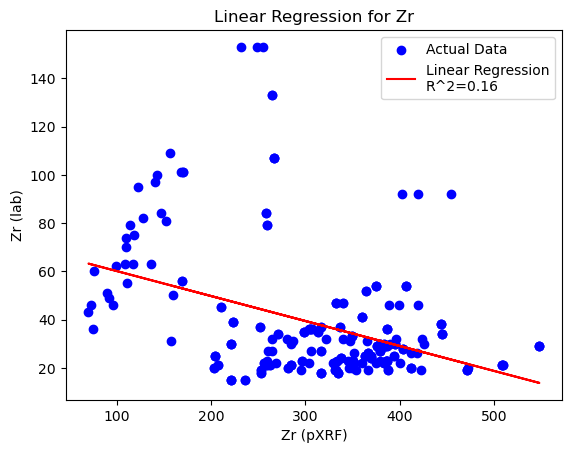

Linear Regression function for Zr: y = -0.10x + 70.44


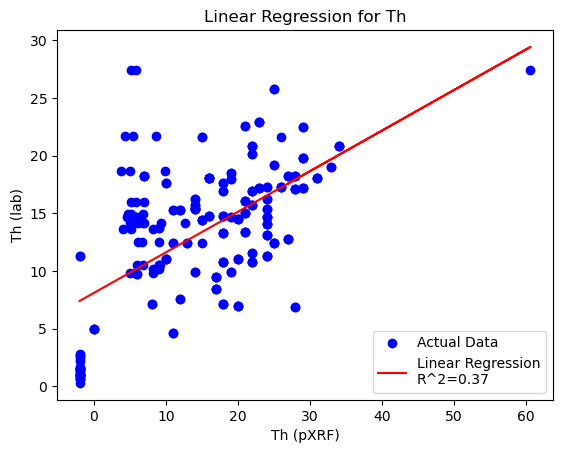

Linear Regression function for Th: y = 0.35x + 8.10


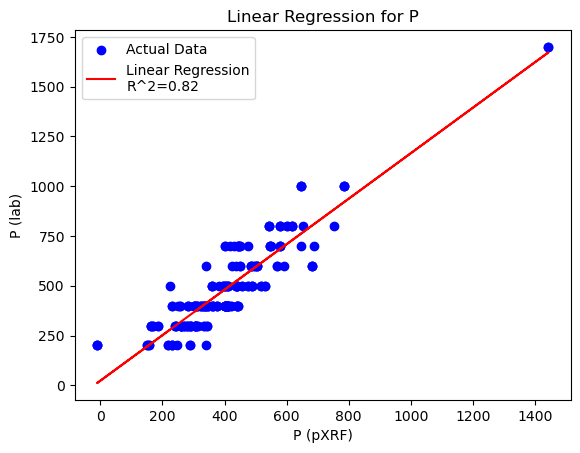

Linear Regression function for P: y = 1.14x + 23.40


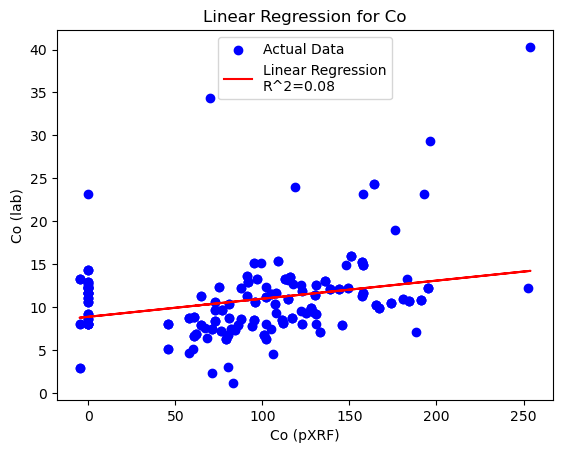

Linear Regression function for Co: y = 0.02x + 8.89


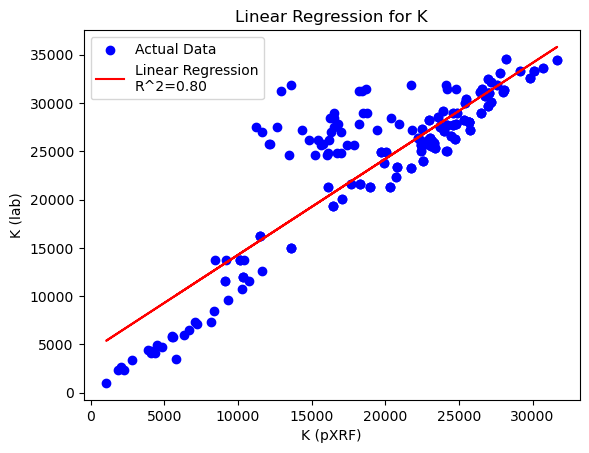

Linear Regression function for K: y = 0.99x + 4327.61


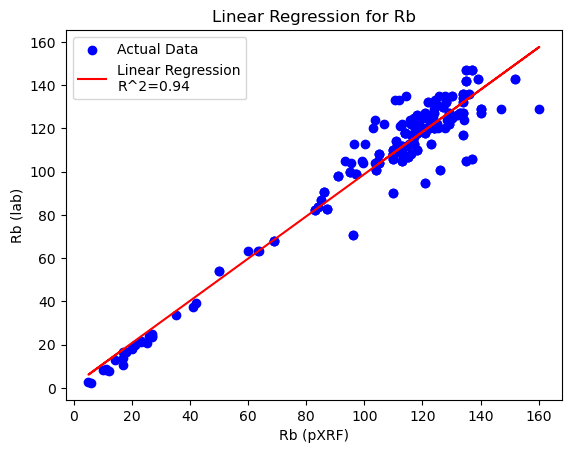

Linear Regression function for Rb: y = 0.98x + 1.26


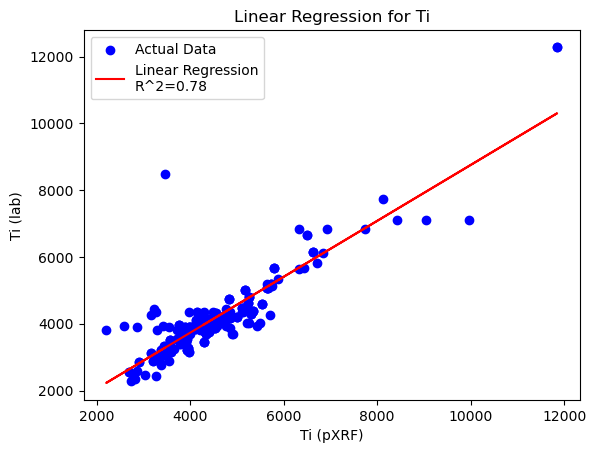

Linear Regression function for Ti: y = 0.84x + 381.71


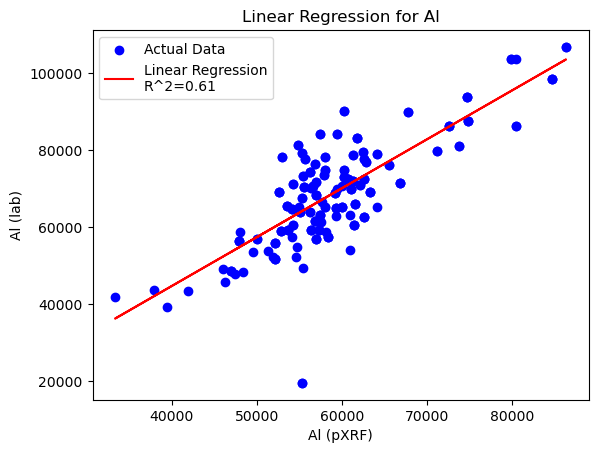

Linear Regression function for Al: y = 1.27x + -6135.72


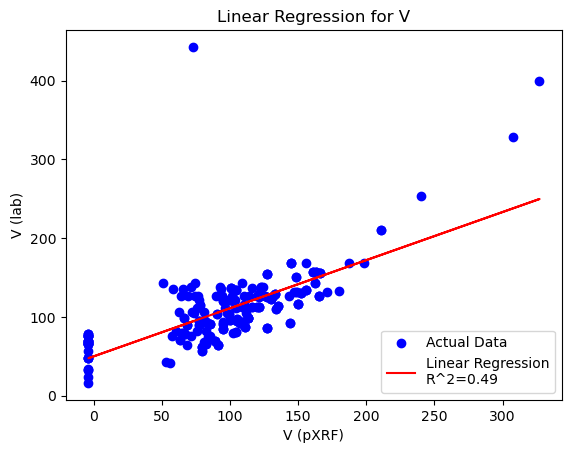

Linear Regression function for V: y = 0.61x + 49.87


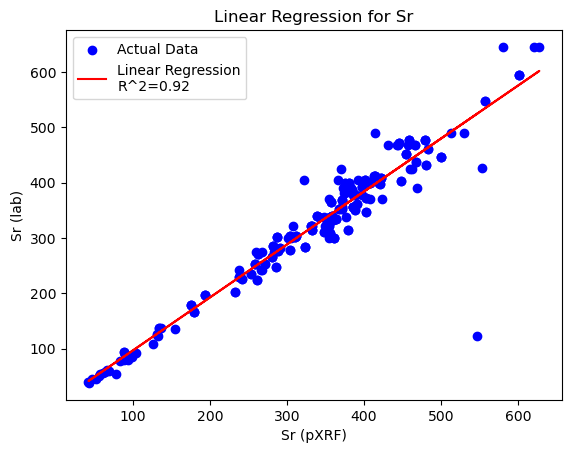

Linear Regression function for Sr: y = 0.96x + 1.33


In [23]:
# Sample DataFrames
df_pXRF = df1
df_lab = df2

# List of elements (add to this list as you progress with regression for more elements)
# 18 elements work
elements = ['Ca', 'Mo', 'Ni', 'Fe', 'Zn', 'Y', 'Ba', 'Si', 'Zr', 'Th', 'P', 'Co','K', 'Rb', 'Ti', 'Al', 'V', 'Sr']

#Not working for 'Mn', 'Pb', 'Cu' at the moment

# Initialize the linear regression model
model = LinearRegression()

for element in elements:
    # Check if element is in both DataFrames
    if element in df_pXRF.columns and element in df_lab.columns:
        
        # Merge dataframes on the index and only take rows where both dataframes have non-NaN values for the element
        combined_df = pd.merge(df_pXRF[[element]], df_lab[[element]], left_index=True, right_index=True, how='inner').dropna()
        
        X = combined_df[[f'{element}_x']].values  # Data from df_pXRF
        y = combined_df[f'{element}_y'].values    # Data from df_lab
        
        # Fit the linear regression model
        model.fit(X, y)
        
        # Predict using the model
        y_pred = model.predict(X)
        
        # Calculate R^2 score
        r2 = r2_score(y, y_pred)
        
        # Visualization
        plt.scatter(X, y, color='blue', label='Actual Data')
        plt.plot(X, y_pred, color='red', label=f'Linear Regression\nR^2={r2:.2f}')
        plt.xlabel(f'{element} (pXRF)')
        plt.ylabel(f'{element} (lab)')
        plt.legend()
        plt.title(f'Linear Regression for {element}')
        plt.show()

        # Print the regression function
        print(f"Linear Regression function for {element}: y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}")

    else:
        print(f"{element} not present in both DataFrames.")


***Indentify outliers using Studentized residuals and Cook's Distance***

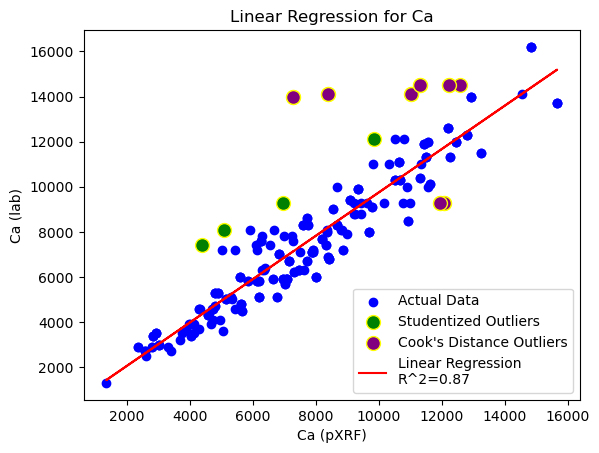

Linear Regression function for Ca: y = 0.96x + 143.06


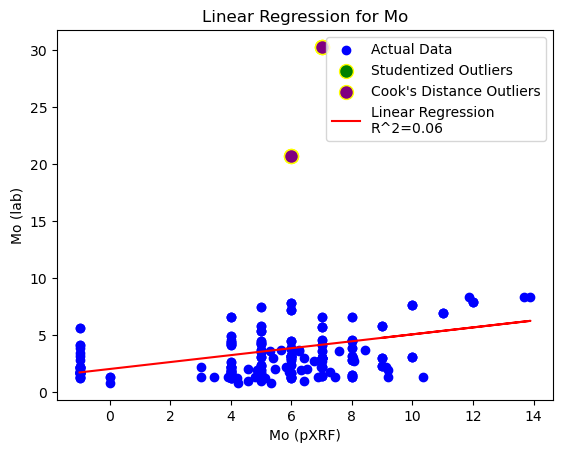

Linear Regression function for Mo: y = 0.30x + 2.02


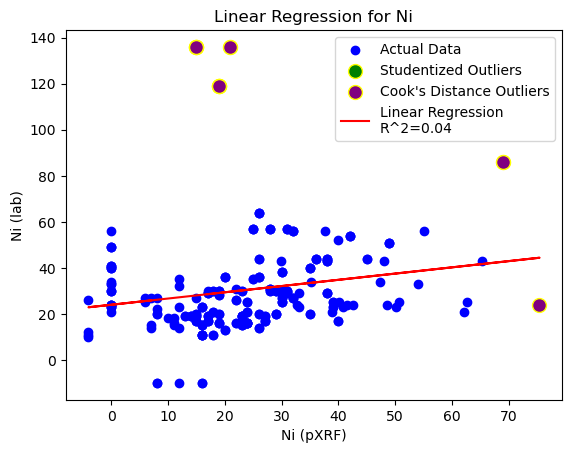

Linear Regression function for Ni: y = 0.27x + 23.96


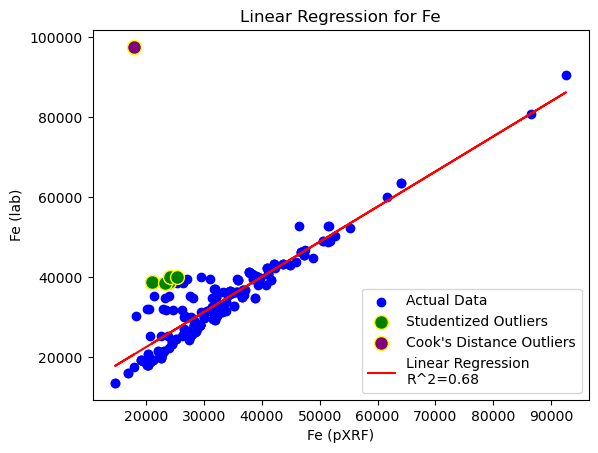

Linear Regression function for Fe: y = 0.88x + 4971.36


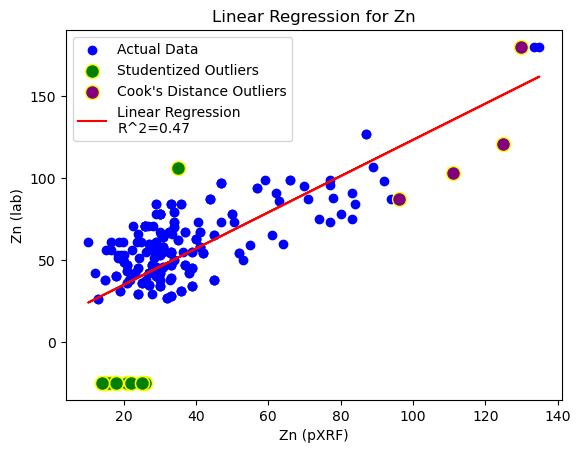

Linear Regression function for Zn: y = 1.11x + 12.70


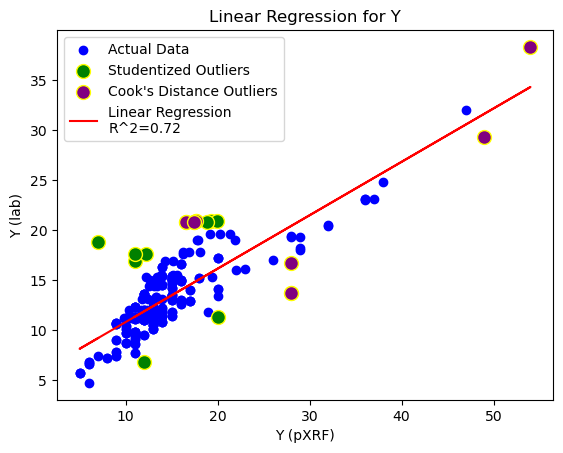

Linear Regression function for Y: y = 0.53x + 5.44


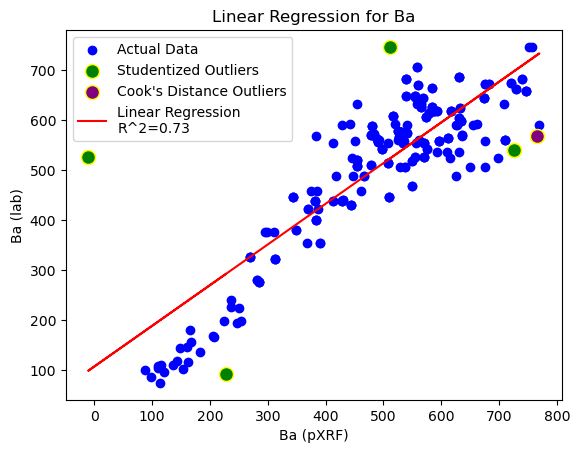

Linear Regression function for Ba: y = 0.81x + 107.75
Si not present in both DataFrames.


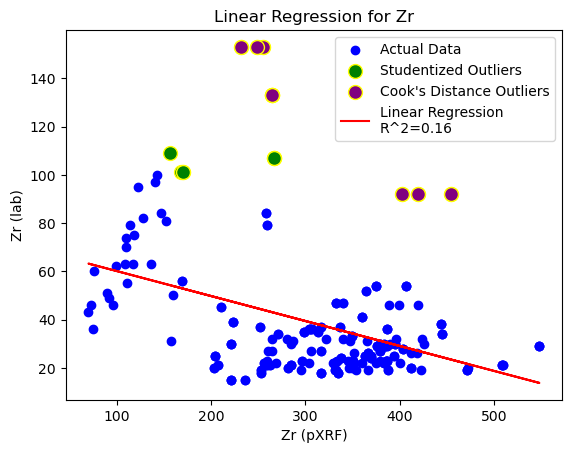

Linear Regression function for Zr: y = -0.10x + 70.44


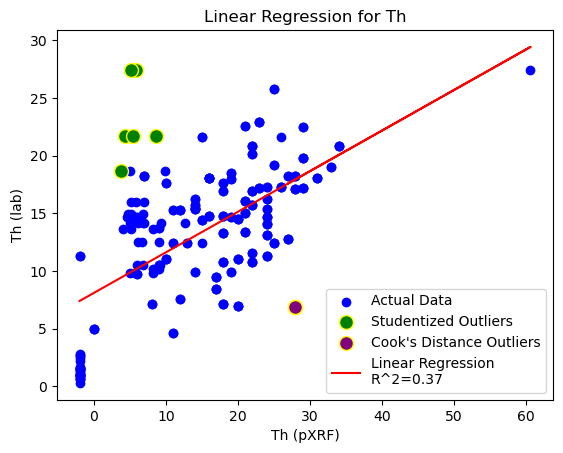

Linear Regression function for Th: y = 0.35x + 8.10


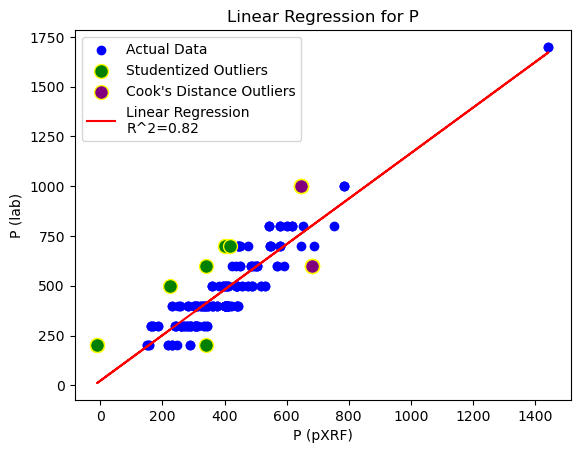

Linear Regression function for P: y = 1.14x + 23.40


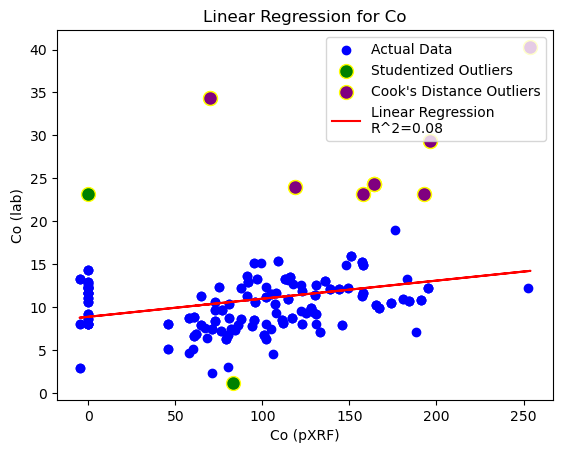

Linear Regression function for Co: y = 0.02x + 8.89


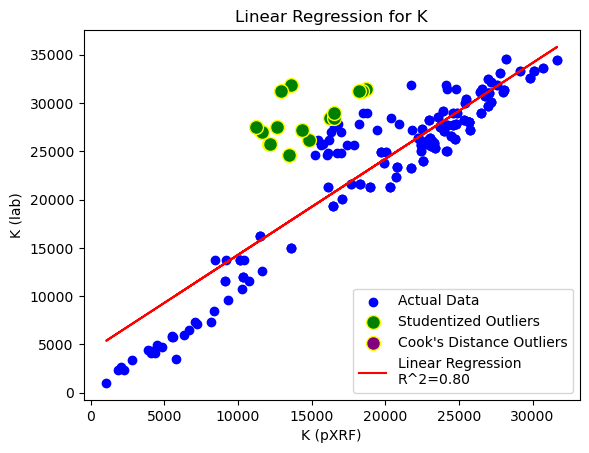

Linear Regression function for K: y = 0.99x + 4327.61


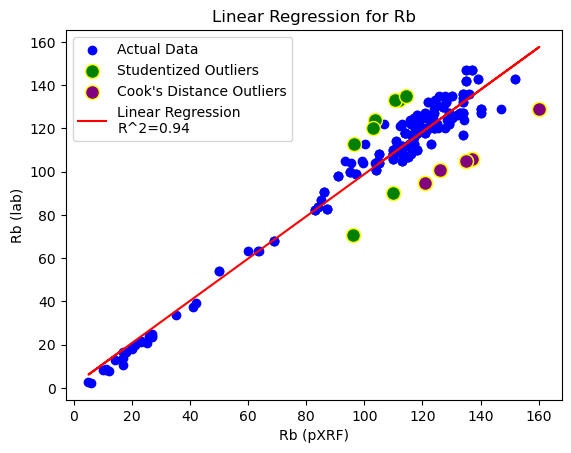

Linear Regression function for Rb: y = 0.98x + 1.26


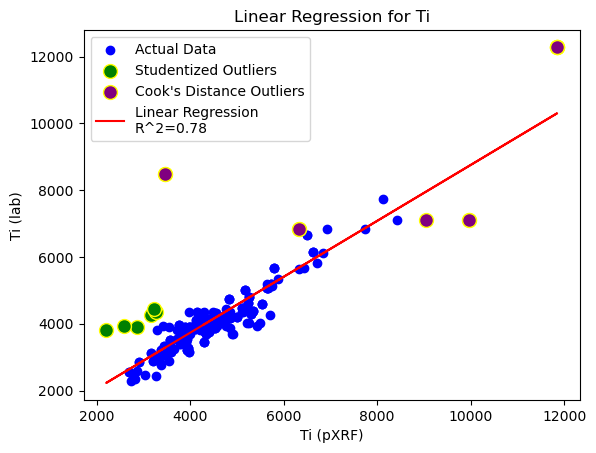

Linear Regression function for Ti: y = 0.84x + 381.71


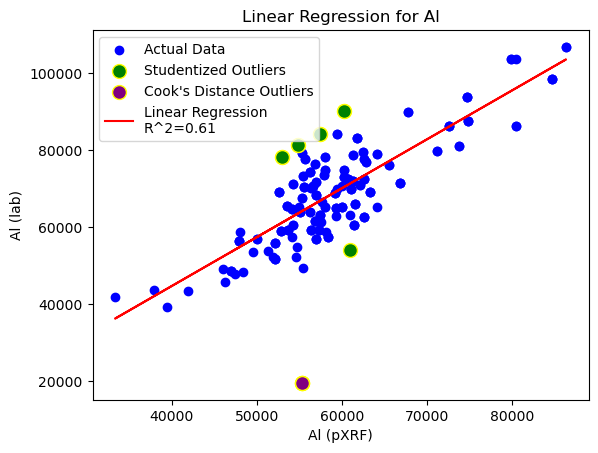

Linear Regression function for Al: y = 1.27x + -6135.72


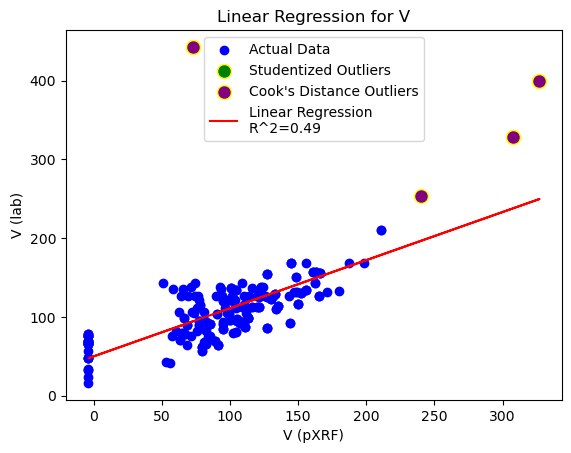

Linear Regression function for V: y = 0.61x + 49.87


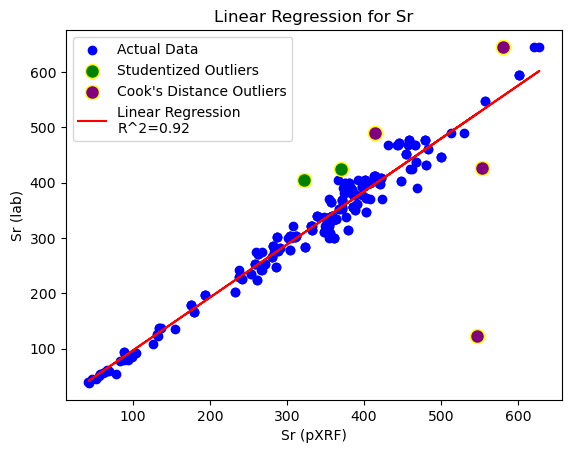

Linear Regression function for Sr: y = 0.96x + 1.33


In [24]:
# Sample DataFrames
df_pXRF = df1
df_lab = df2

# List of elements
elements = ['Ca', 'Mo', 'Ni', 'Fe', 'Zn', 'Y', 'Ba', 'Si', 'Zr', 'Th', 'P', 'Co', 'K', 'Rb', 'Ti', 'Al', 'V', 'Sr']

# Initialize the linear regression model
model = LinearRegression()

def detect_outliers(X, y, y_pred, significance=0.05):
    """
    Detect outliers using Studentized residuals and Cook's Distance.
    """
    residuals = y - y_pred
    MSE = np.sum((residuals)**2) / (len(y) - 2)
    
    # Studentized Residuals
    H = np.dot(X, np.linalg.solve(np.dot(X.T, X), X.T))
    leverage = np.diag(H)
    studentized_residuals = residuals / np.sqrt(MSE * (1-leverage))
    
    t_threshold = t.ppf(1-significance/2, df=len(y)-2)
    studentized_outliers = np.where(np.abs(studentized_residuals) > t_threshold)
    
    # Cook's Distance
    cook_d = (residuals**2 * leverage) / (2 * MSE)
    cook_threshold = 4 / len(y)
    cook_outliers = np.where(cook_d > cook_threshold)
    
    return studentized_outliers, cook_outliers

for element in elements:
    if element in df_pXRF.columns and element in df_lab.columns:
        combined_df = pd.merge(df_pXRF[[element]], df_lab[[element]], left_index=True, right_index=True, how='inner').dropna()
        X = combined_df[[f'{element}_x']].values
        y = combined_df[f'{element}_y'].values
        model.fit(X, y)
        y_pred = model.predict(X)
        r2 = r2_score(y, y_pred)
        
        studentized_outliers, cook_outliers = detect_outliers(X, y, y_pred)
        
        # Visualization with Outliers Highlighted
        plt.scatter(X, y, color='blue', label='Actual Data')
        plt.scatter(X[studentized_outliers], y[studentized_outliers], color='green', s=100, edgecolor='yellow', label='Studentized Outliers')
        plt.scatter(X[cook_outliers], y[cook_outliers], color='purple', s=100, edgecolor='yellow', label='Cook\'s Distance Outliers')
        plt.plot(X, y_pred, color='red', label=f'Linear Regression\nR^2={r2:.2f}')
        plt.xlabel(f'{element} (pXRF)')
        plt.ylabel(f'{element} (lab)')
        plt.legend()
        plt.title(f'Linear Regression for {element}')
        plt.show()
        
        # Print the regression function
        print(f"Linear Regression function for {element}: y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}")

    else:
        print(f"{element} not present in both DataFrames.")

***Remove outliers detected by Studentized residuals and those detected by Cook's Distance respectively***

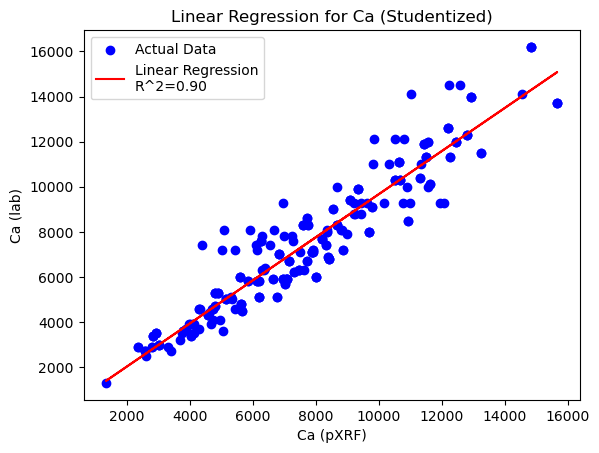

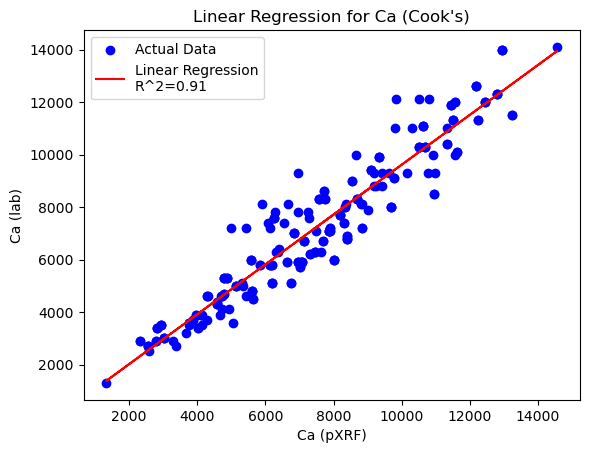

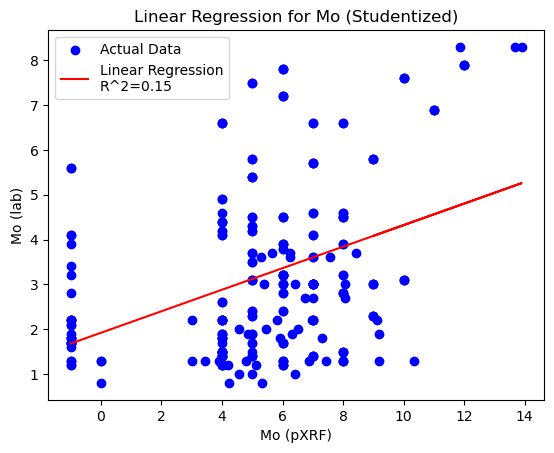

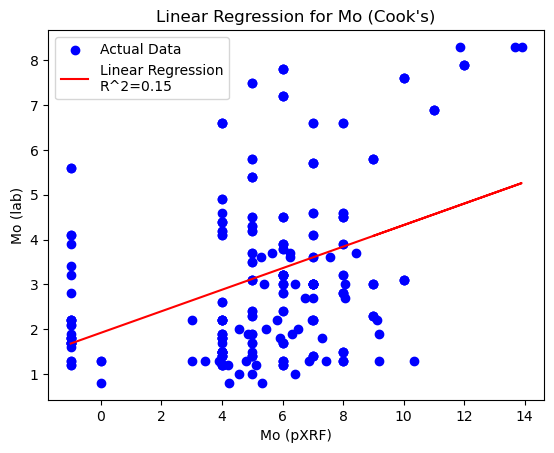

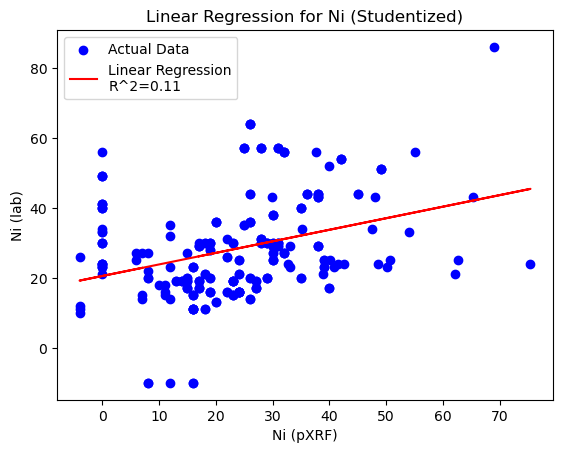

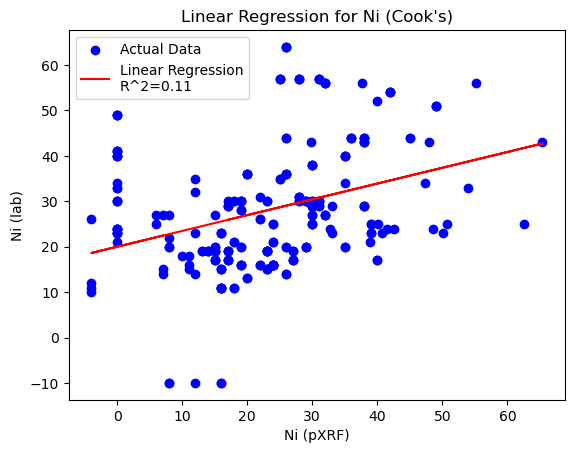

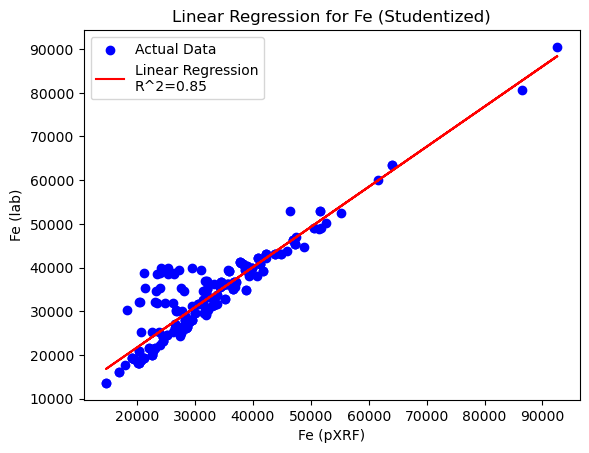

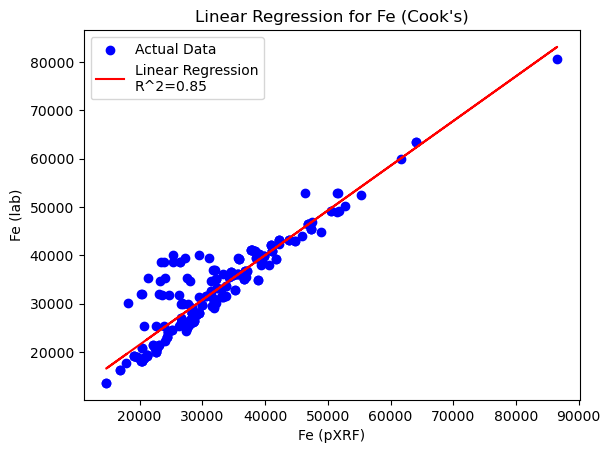

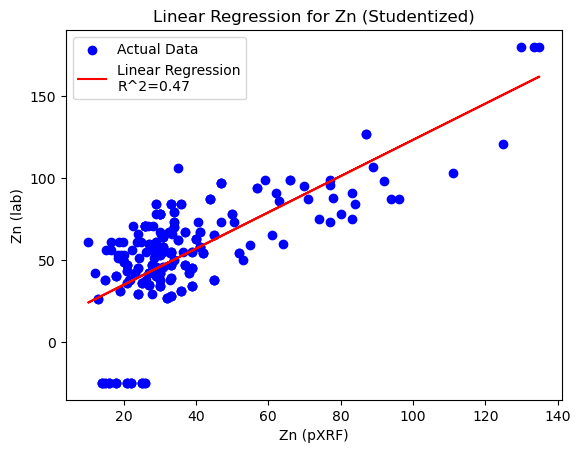

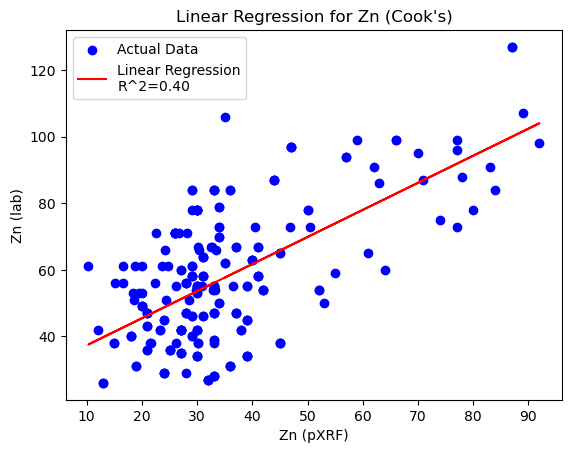

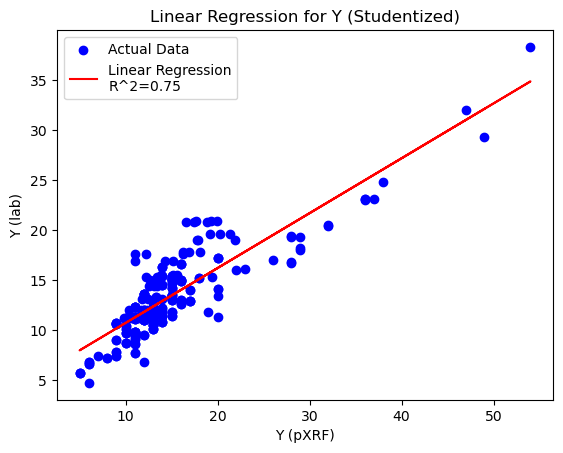

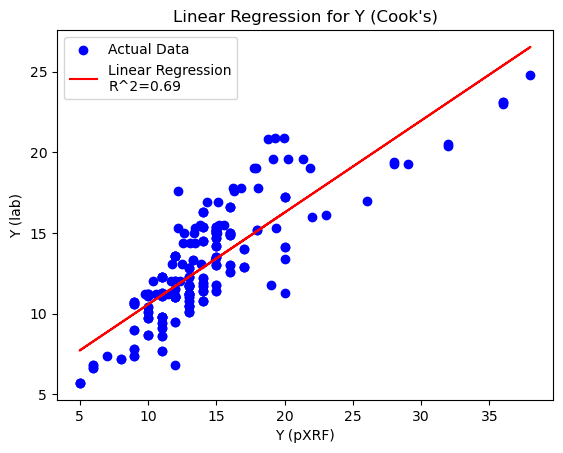

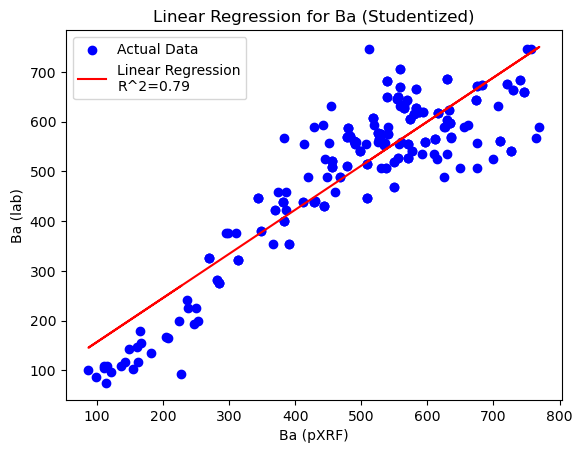

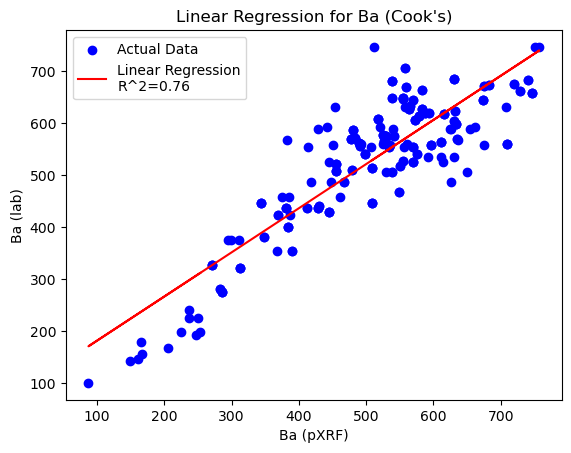

Si not present in both DataFrames.


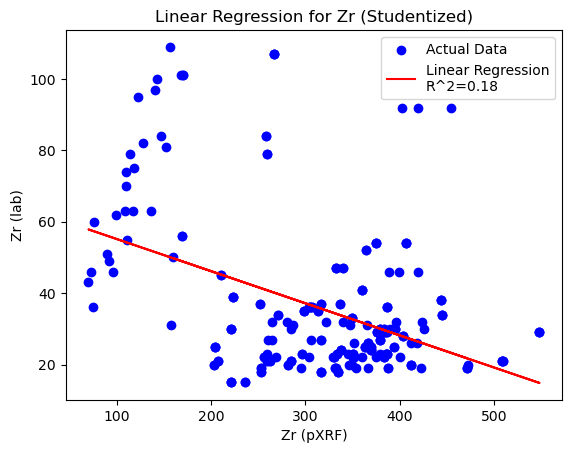

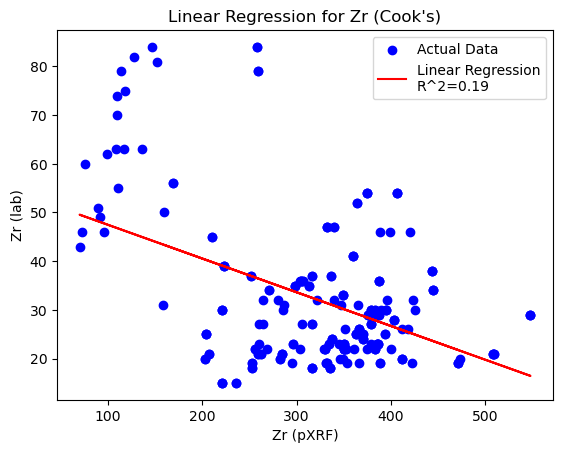

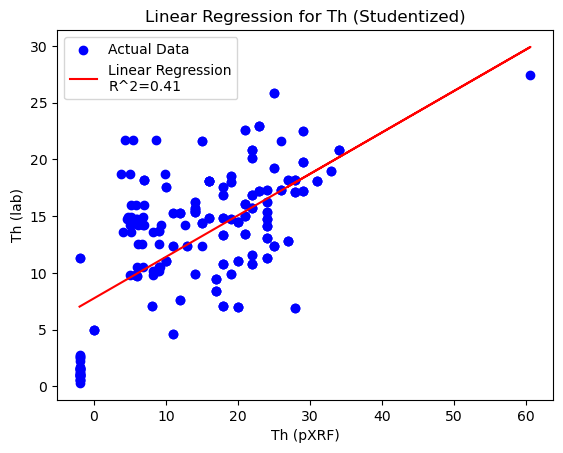

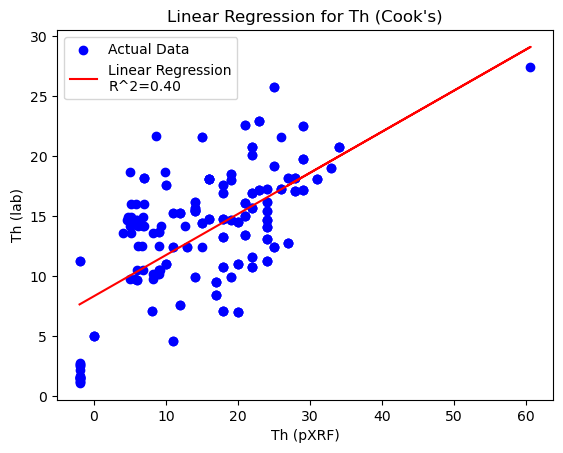

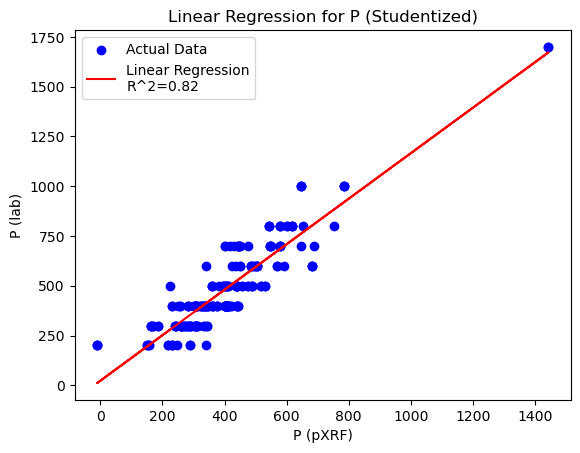

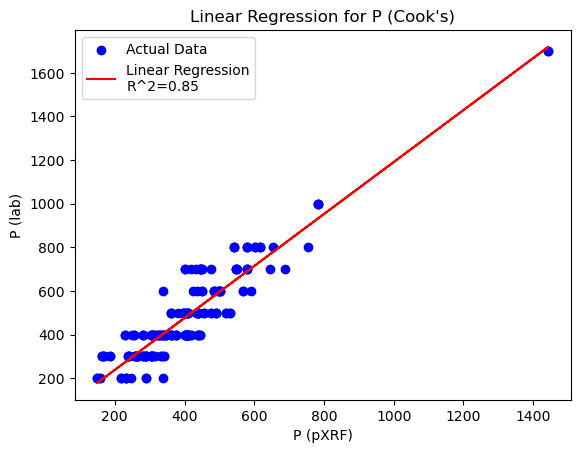

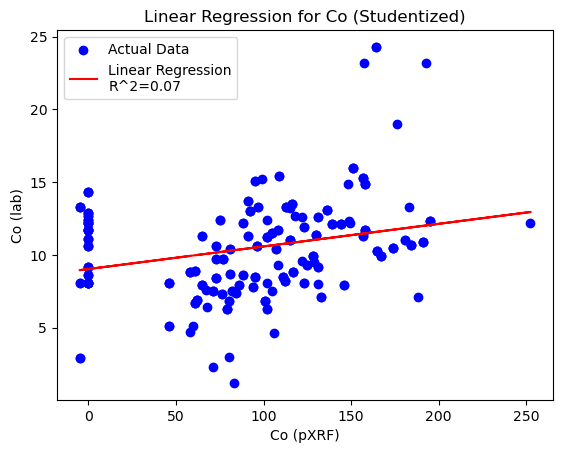

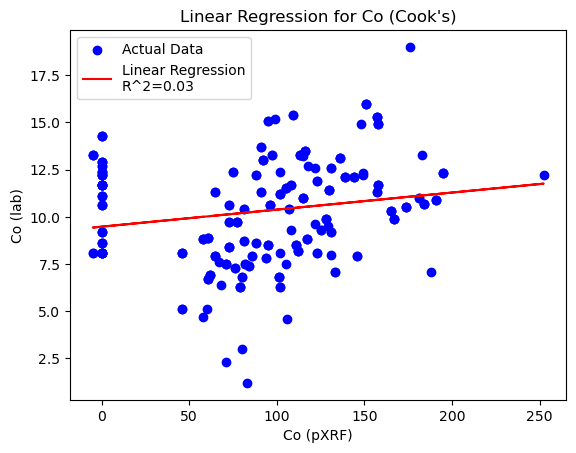

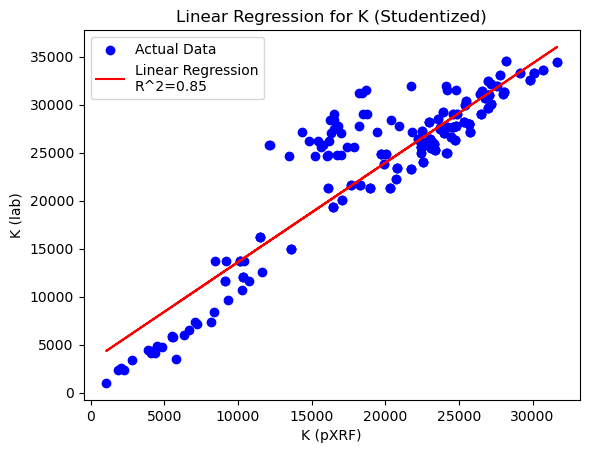

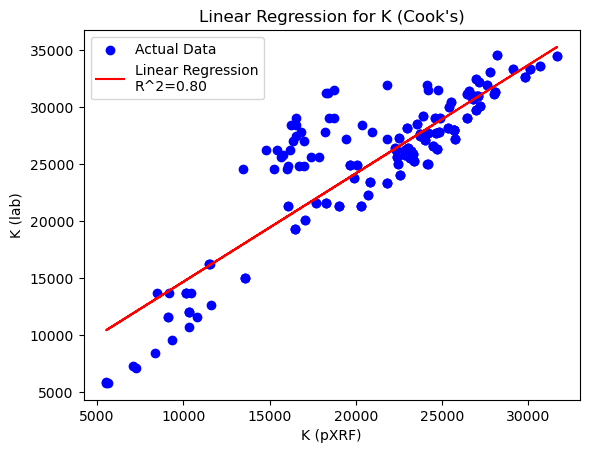

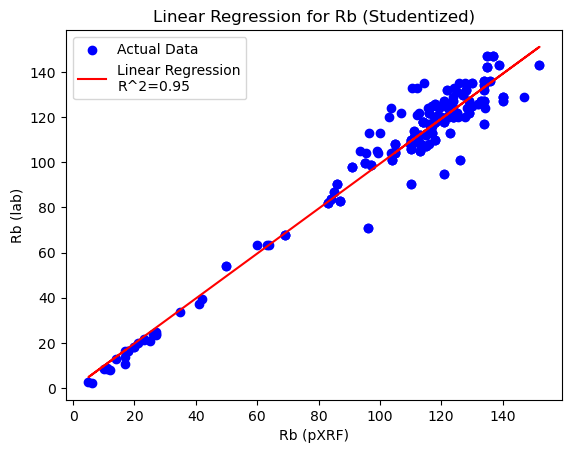

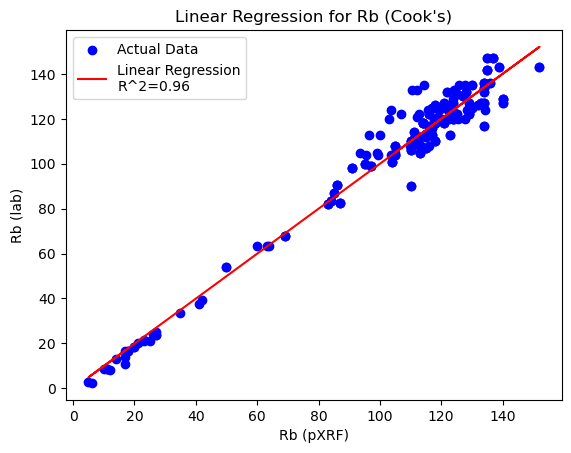

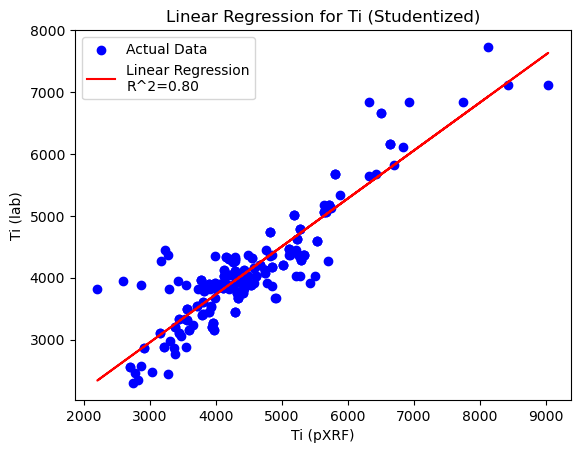

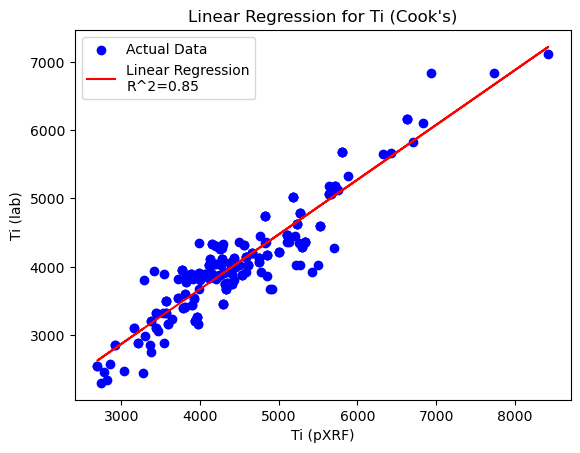

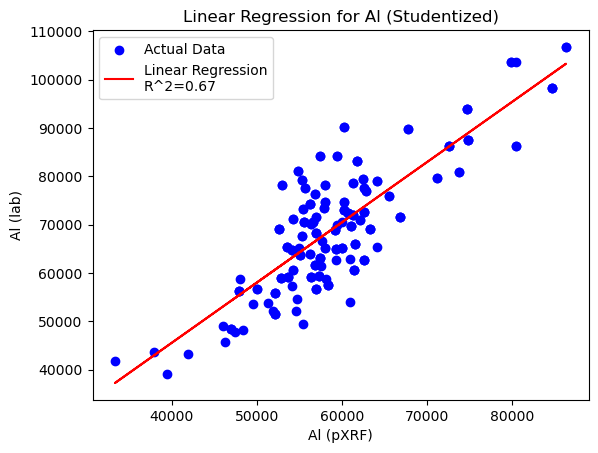

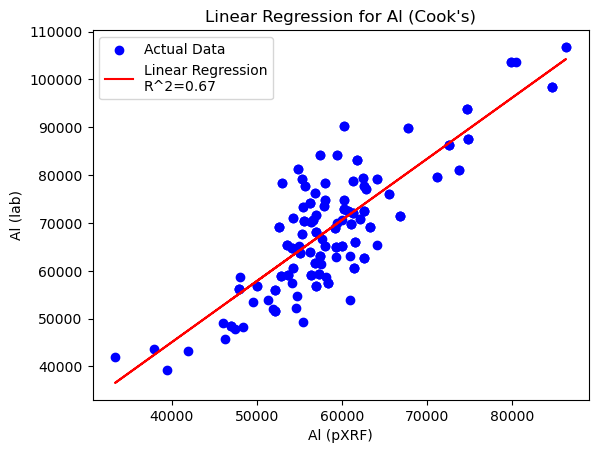

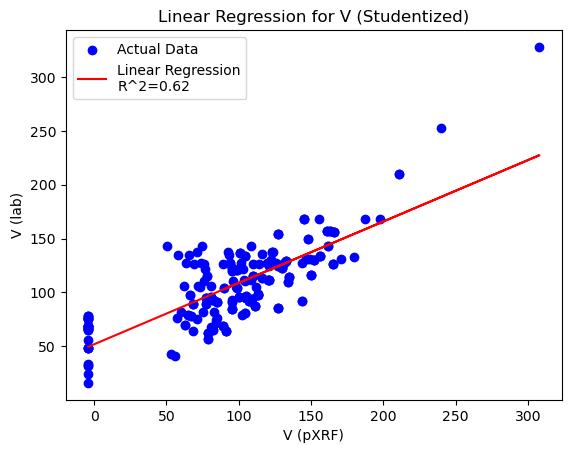

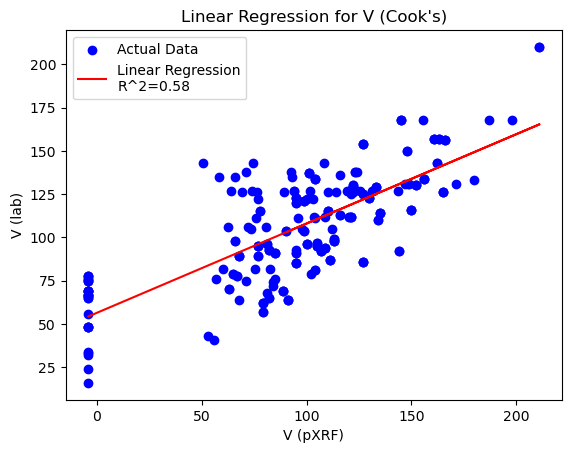

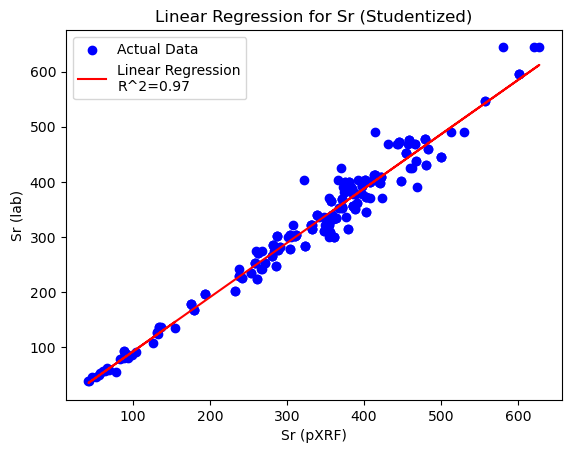

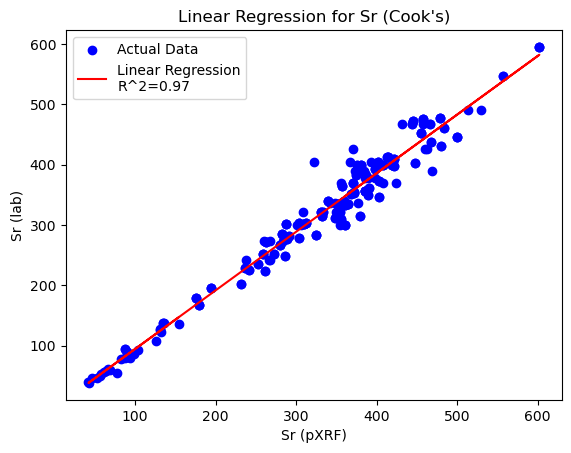

In [25]:
# Sample DataFrames (as placeholders; you should replace them with your actual DataFrames)
df_pXRF = df1
df_lab = df2

elements = ['Ca', 'Mo', 'Ni', 'Fe', 'Zn', 'Y', 'Ba', 'Si', 'Zr', 'Th', 'P', 'Co','K', 'Rb', 'Ti', 'Al', 'V', 'Sr']

model = LinearRegression()

for element in elements:
    if element in df_pXRF.columns and element in df_lab.columns:
        combined_df = pd.merge(df_pXRF[[element]], df_lab[[element]], left_index=True, right_index=True, how='inner').dropna()
        
        X = combined_df[[f'{element}_x']].values
        y = combined_df[f'{element}_y'].values
        
        # Fit regression model using statsmodels for detailed statistics
        X_const = sm.add_constant(X)  # Adding a constant to the model (i.e., bias or intercept)
        ols_model = sm.OLS(y, X_const).fit()
        
        # Studentized Residuals
        studentized_residuals = ols_model.get_influence().resid_studentized_external
        # Retain only data points that are not outliers based on Studentized residuals
        keep_points_studentized = np.abs(studentized_residuals) <= 3
        
        # Cook's Distance
        cooks_distance, _ = ols_model.get_influence().cooks_distance
        # Threshold for Cook's distance (common rule of thumb)
        threshold_cooks = 4 / len(y)
        keep_points_cooks = cooks_distance < threshold_cooks
        
        # Now we apply the filters
        X_studentized = X[keep_points_studentized]
        y_studentized = y[keep_points_studentized]
        
        X_cooks = X[keep_points_cooks]
        y_cooks = y[keep_points_cooks]
        
        # Fit the model on data after removing outliers detected by Studentized residuals
        model.fit(X_studentized, y_studentized)
        y_pred_studentized = model.predict(X_studentized)
        
        # Fit the model on data after removing outliers detected by Cook's distance
        model.fit(X_cooks, y_cooks)
        y_pred_cooks = model.predict(X_cooks)
        
        # Visualizations and statistics after removing outliers detected by each method
        # Studentized residuals method
        plt.scatter(X_studentized, y_studentized, color='blue', label='Actual Data')
        plt.plot(X_studentized, y_pred_studentized, color='red', label=f'Linear Regression\nR^2={r2_score(y_studentized, y_pred_studentized):.2f}')
        plt.xlabel(f'{element} (pXRF)')
        plt.ylabel(f'{element} (lab)')
        plt.legend()
        plt.title(f'Linear Regression for {element} (Studentized)')
        plt.show()
        
        # Cook's distance method
        plt.scatter(X_cooks, y_cooks, color='blue', label='Actual Data')
        plt.plot(X_cooks, y_pred_cooks, color='red', label=f'Linear Regression\nR^2={r2_score(y_cooks, y_pred_cooks):.2f}')
        plt.xlabel(f'{element} (pXRF)')
        plt.ylabel(f'{element} (lab)')
        plt.legend()
        plt.title(f'Linear Regression for {element} (Cook\'s)')
        plt.show()
    else:
        print(f"{element} not present in both DataFrames.")

Ca Regression Function (Studentized): y = 0.9854x + -6.4350
Ca Regression Function (Cook's): y = 0.9714x + -2.7971


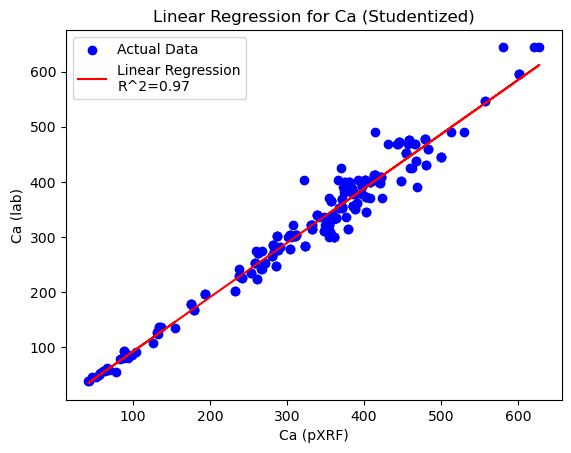

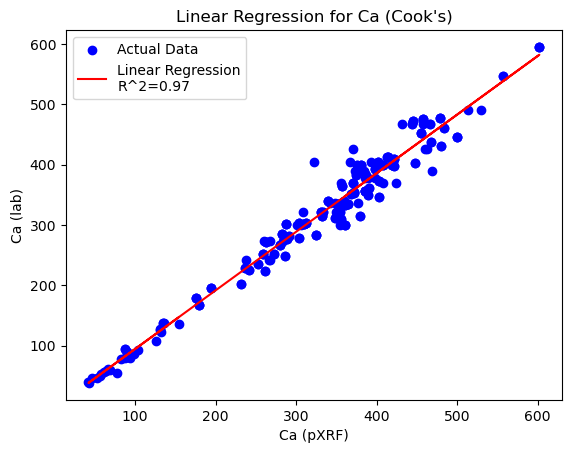

Mo Regression Function (Studentized): y = 0.9854x + -6.4350
Mo Regression Function (Cook's): y = 0.9714x + -2.7971


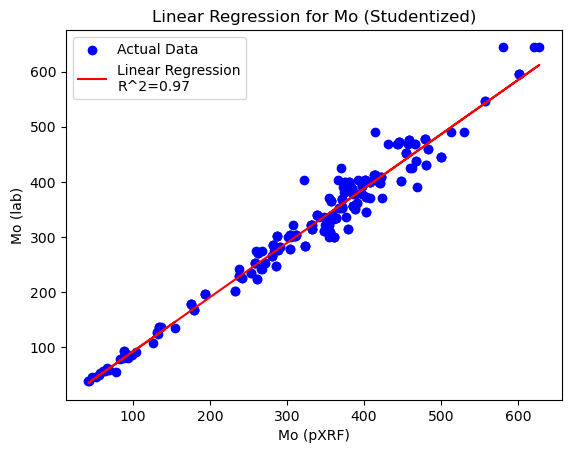

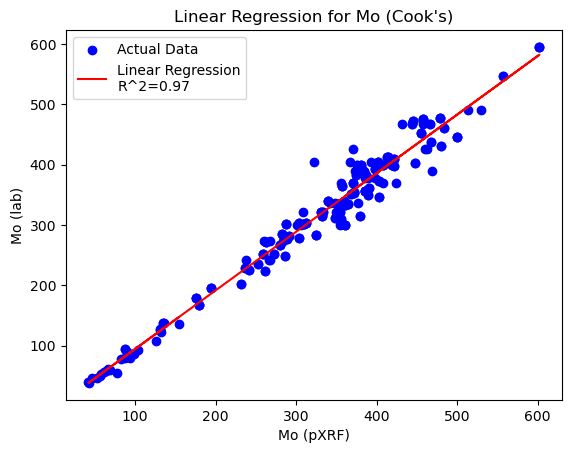

Ni Regression Function (Studentized): y = 0.9854x + -6.4350
Ni Regression Function (Cook's): y = 0.9714x + -2.7971


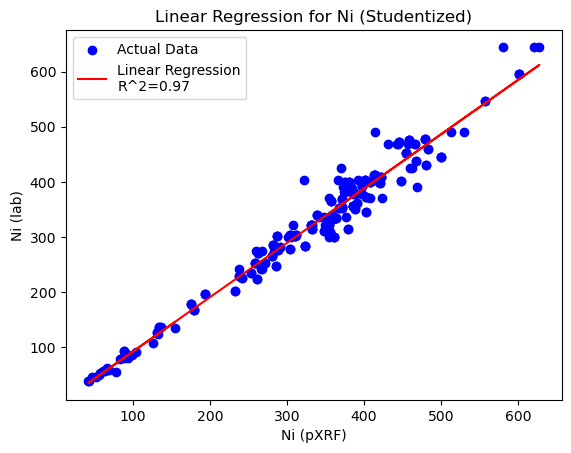

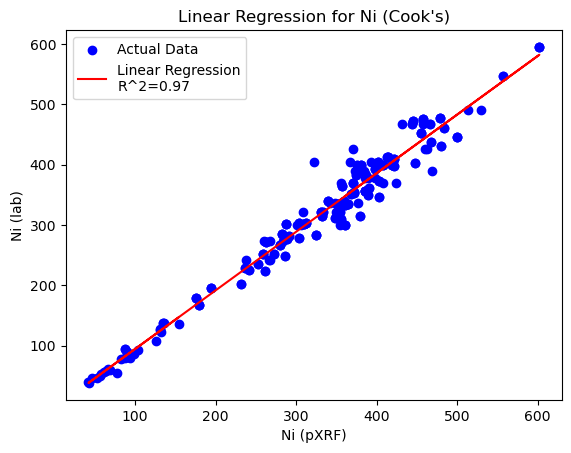

Fe Regression Function (Studentized): y = 0.9854x + -6.4350
Fe Regression Function (Cook's): y = 0.9714x + -2.7971


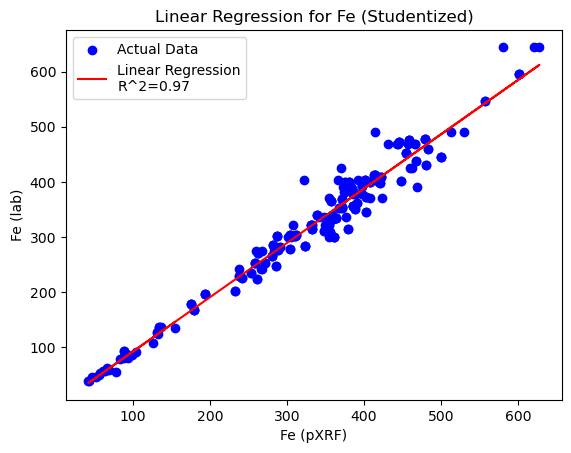

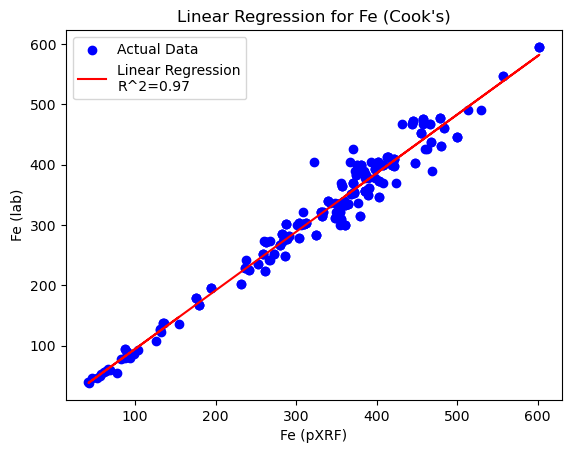

Zn Regression Function (Studentized): y = 0.9854x + -6.4350
Zn Regression Function (Cook's): y = 0.9714x + -2.7971


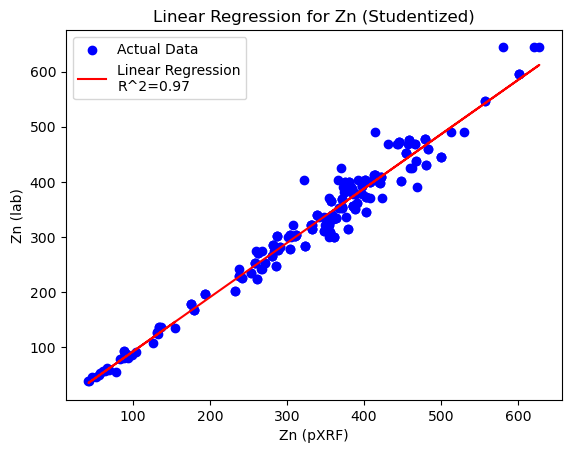

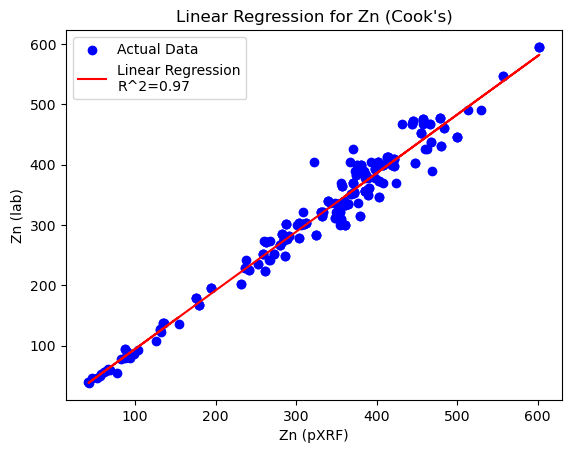

Y Regression Function (Studentized): y = 0.9854x + -6.4350
Y Regression Function (Cook's): y = 0.9714x + -2.7971


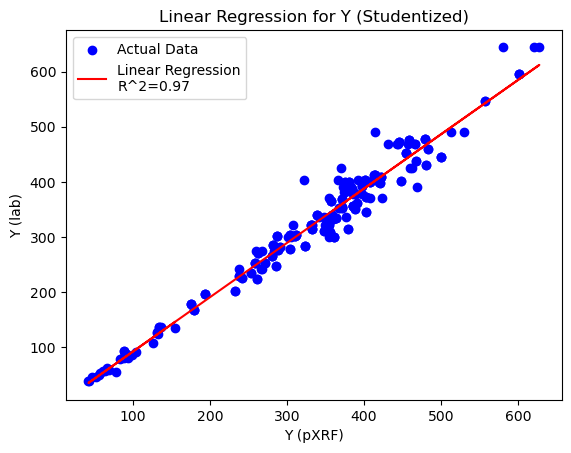

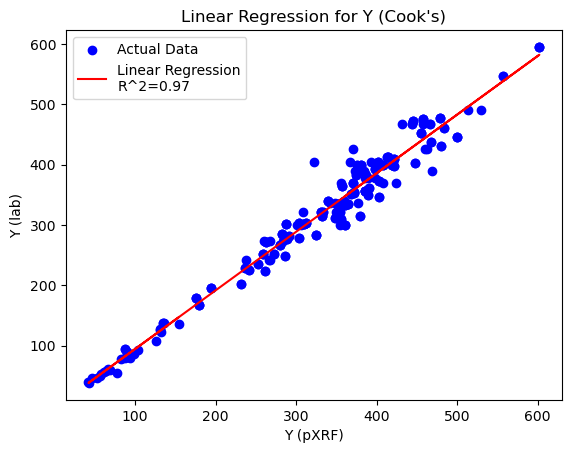

Ba Regression Function (Studentized): y = 0.9854x + -6.4350
Ba Regression Function (Cook's): y = 0.9714x + -2.7971


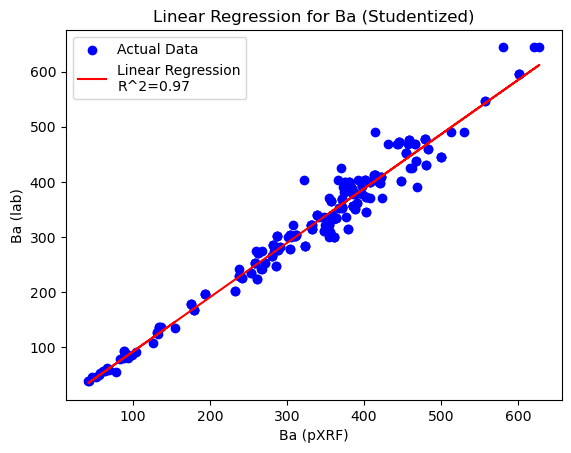

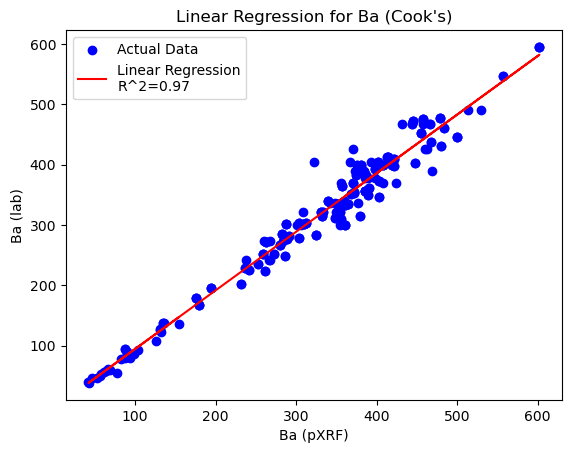

Si not present in both DataFrames.
Zr Regression Function (Studentized): y = 0.9854x + -6.4350
Zr Regression Function (Cook's): y = 0.9714x + -2.7971


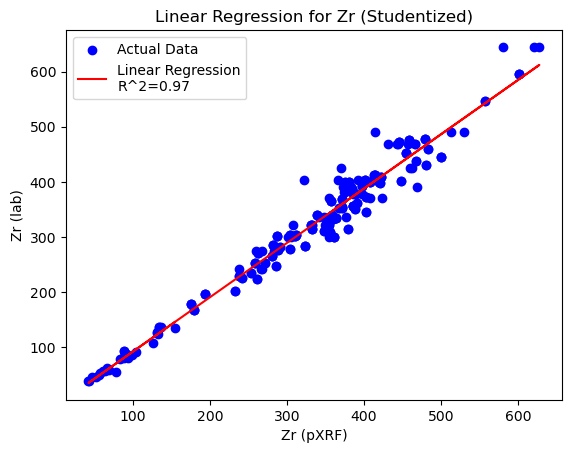

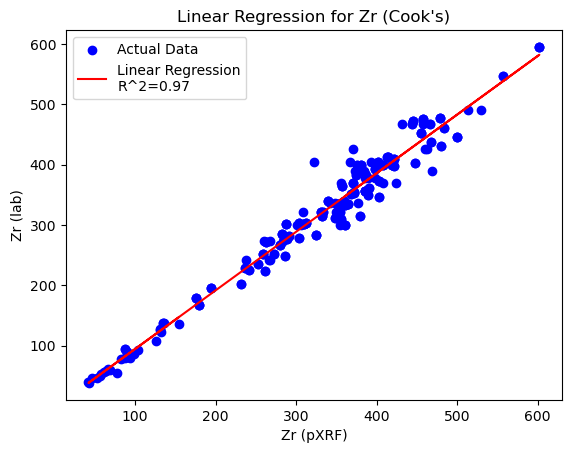

Th Regression Function (Studentized): y = 0.9854x + -6.4350
Th Regression Function (Cook's): y = 0.9714x + -2.7971


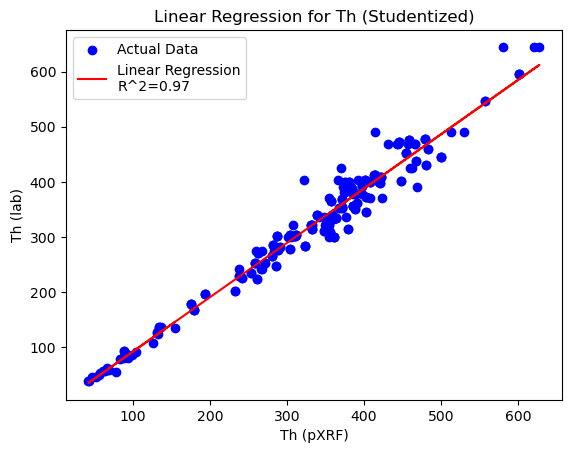

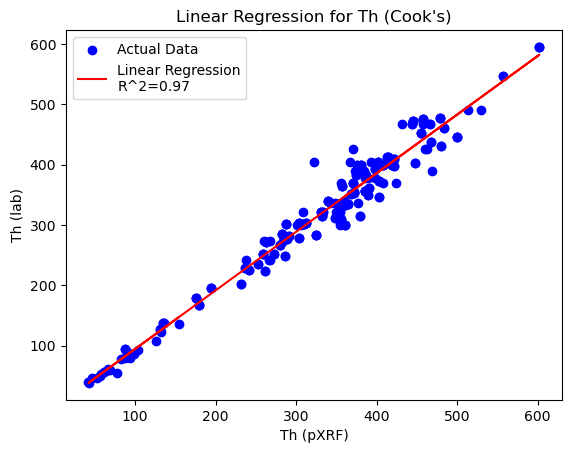

P Regression Function (Studentized): y = 0.9854x + -6.4350
P Regression Function (Cook's): y = 0.9714x + -2.7971


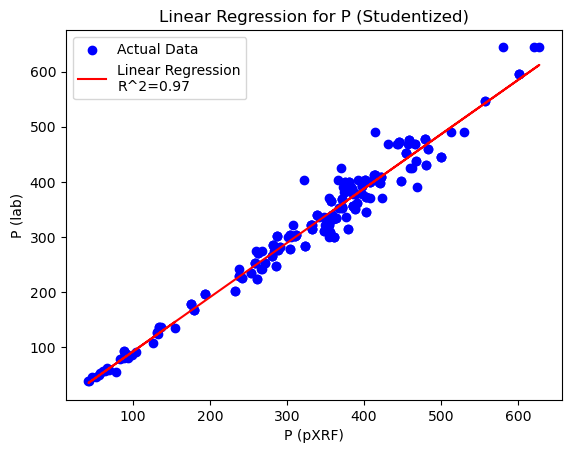

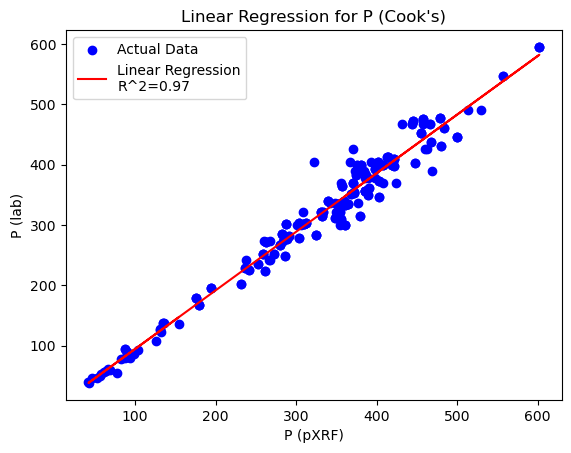

Co Regression Function (Studentized): y = 0.9854x + -6.4350
Co Regression Function (Cook's): y = 0.9714x + -2.7971


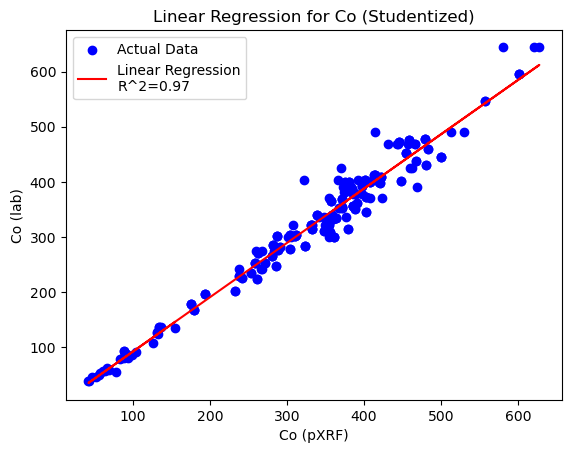

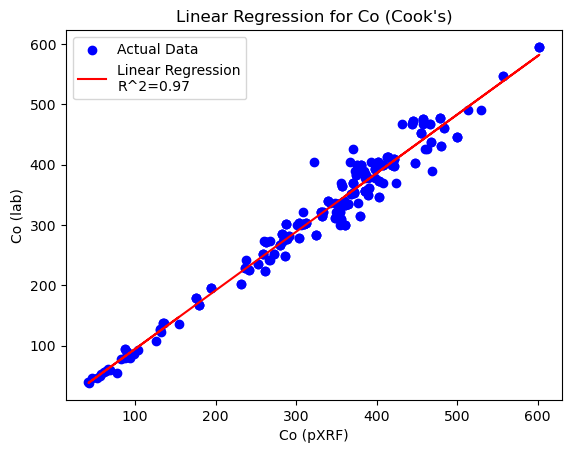

K Regression Function (Studentized): y = 0.9854x + -6.4350
K Regression Function (Cook's): y = 0.9714x + -2.7971


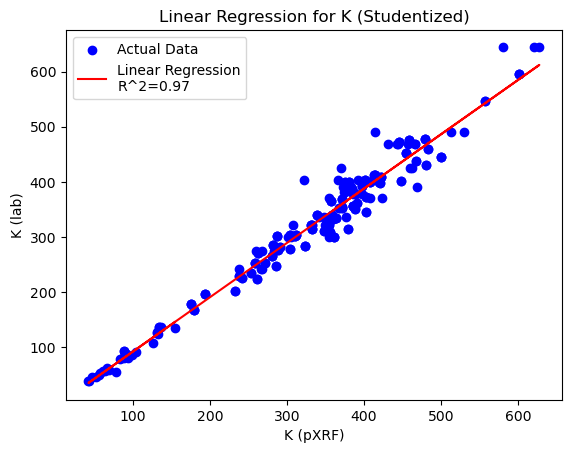

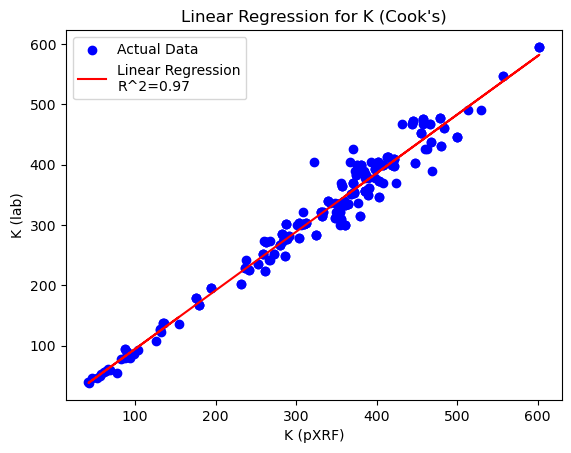

Rb Regression Function (Studentized): y = 0.9854x + -6.4350
Rb Regression Function (Cook's): y = 0.9714x + -2.7971


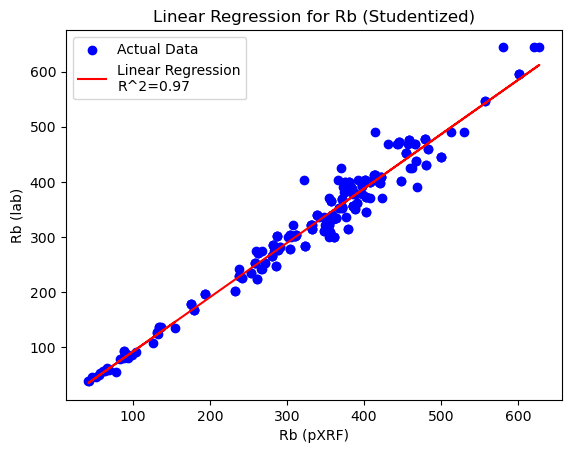

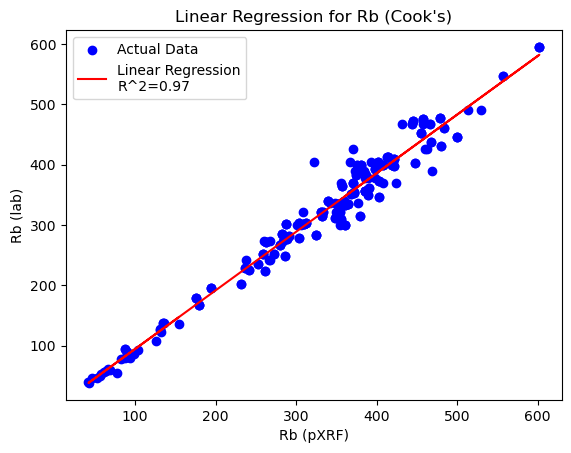

Ti Regression Function (Studentized): y = 0.9854x + -6.4350
Ti Regression Function (Cook's): y = 0.9714x + -2.7971


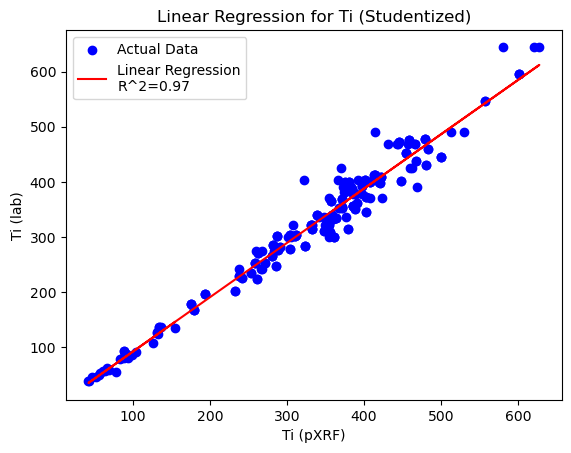

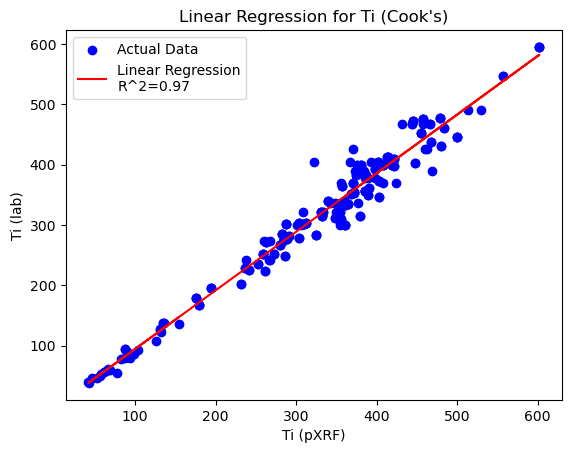

Al Regression Function (Studentized): y = 0.9854x + -6.4350
Al Regression Function (Cook's): y = 0.9714x + -2.7971


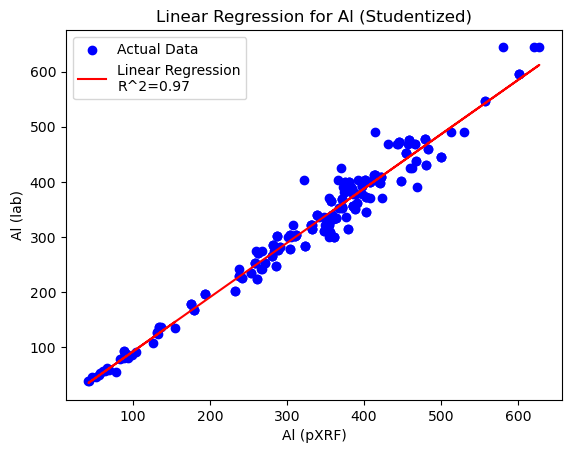

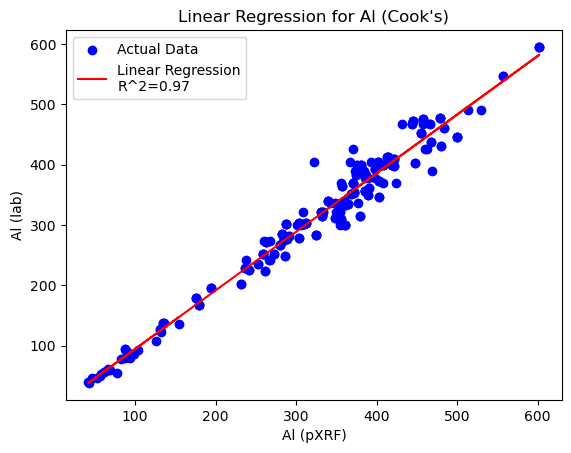

V Regression Function (Studentized): y = 0.9854x + -6.4350
V Regression Function (Cook's): y = 0.9714x + -2.7971


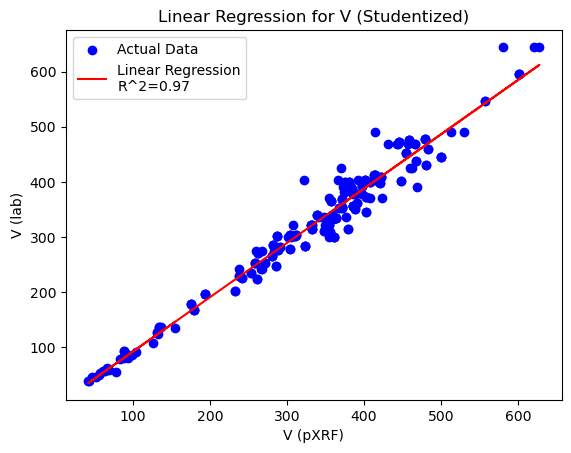

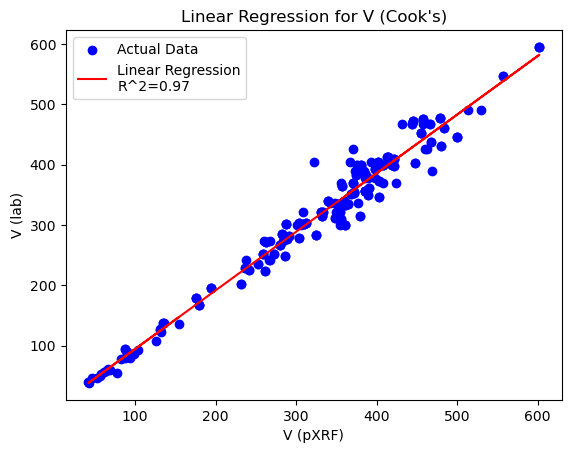

Sr Regression Function (Studentized): y = 0.9854x + -6.4350
Sr Regression Function (Cook's): y = 0.9714x + -2.7971


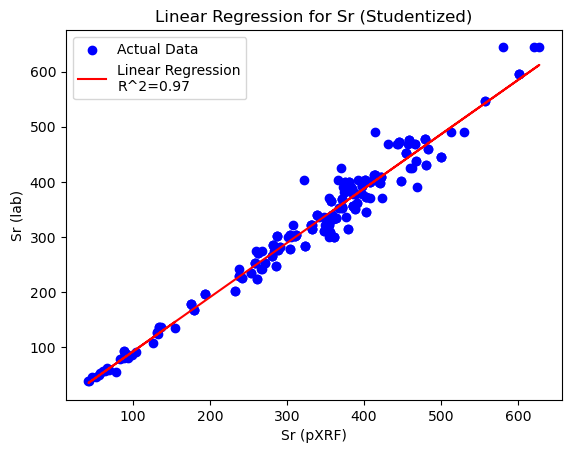

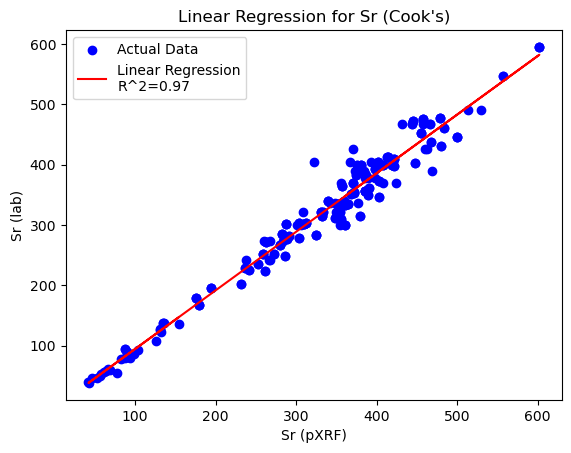

In [26]:
# Sample DataFrames (as placeholders; you should replace them with your actual DataFrames)
df_pXRF = df1
df_lab = df2

elements = ['Ca', 'Mo', 'Ni', 'Fe', 'Zn', 'Y', 'Ba', 'Si', 'Zr', 'Th', 'P', 'Co','K', 'Rb', 'Ti', 'Al', 'V', 'Sr']

model = LinearRegression()

for element in elements:
    if element in df_pXRF.columns and element in df_lab.columns:
        combined_df = pd.merge(df_pXRF[[element]], df_lab[[element]], left_index=True, right_index=True, how='inner').dropna()
        
        X = combined_df[[f'{element}_x']].values
        y = combined_df[f'{element}_y'].values
        
        # ... (rest of your code before the models) ...
        
        # Fit the model on data after removing outliers detected by Studentized residuals
        model.fit(X_studentized, y_studentized)
        y_pred_studentized = model.predict(X_studentized)
        print(f"{element} Regression Function (Studentized): y = {model.coef_[0]:.4f}x + {model.intercept_:.4f}")

        # Fit the model on data after removing outliers detected by Cook's distance
        model.fit(X_cooks, y_cooks)
        y_pred_cooks = model.predict(X_cooks)
        print(f"{element} Regression Function (Cook's): y = {model.coef_[0]:.4f}x + {model.intercept_:.4f}")

        # Visualizations and statistics after removing outliers detected by each method
        # Studentized residuals method
        plt.scatter(X_studentized, y_studentized, color='blue', label='Actual Data')
        plt.plot(X_studentized, y_pred_studentized, color='red', label=f'Linear Regression\nR^2={r2_score(y_studentized, y_pred_studentized):.2f}')
        plt.xlabel(f'{element} (pXRF)')
        plt.ylabel(f'{element} (lab)')
        plt.legend()
        plt.title(f'Linear Regression for {element} (Studentized)')
        plt.show()
        
        # Cook's distance method
        plt.scatter(X_cooks, y_cooks, color='blue', label='Actual Data')
        plt.plot(X_cooks, y_pred_cooks, color='red', label=f'Linear Regression\nR^2={r2_score(y_cooks, y_pred_cooks):.2f}')
        plt.xlabel(f'{element} (pXRF)')
        plt.ylabel(f'{element} (lab)')
        plt.legend()
        plt.title(f'Linear Regression for {element} (Cook\'s)')
        plt.show()

    else:
        print(f"{element} not present in both DataFrames.")


***Plot the linear regression for Cu***

In [27]:
df_pXRF

Prospect     Coordinates.Grid  Coordinates.East  \
Point                                                            
MP01871S  Sugarbag East  GDA94 / MGA zone 56               NaN   
MP01101S         Ridler  GDA94 / MGA zone 56               NaN   
MP01101S         Ridler  GDA94 / MGA zone 56               NaN   
MP01101S         Ridler  GDA94 / MGA zone 56               NaN   
MP01061S            NaN  GDA94 / MGA zone 56               NaN   
...                 ...                  ...               ...   
MP01051S            NaN  GDA94 / MGA zone 56          324750.0   
MP01051S            NaN  GDA94 / MGA zone 56          324750.0   
MP01050S            NaN  GDA94 / MGA zone 56          324700.0   
MP01050S            NaN  GDA94 / MGA zone 56          324700.0   
MP01050S            NaN  GDA94 / MGA zone 56          324700.0   

          Coordinates.North  Coordinates.RL  Sample       Date Units      Mg  \
Point                                                                          
MP01871S                NaN             NaN     RAW 2023-08-10   PPM  5388.0   
MP01101S                NaN             NaN     RAW 2023-01-13   PPM     NaN   
MP01101S                NaN             NaN     RAW 2023-01-13   PPM     NaN   
MP01101S                NaN             NaN     RAW 2023-01-13   PPM     NaN   
MP01061S                NaN             NaN    PULP 2023-06-06   PPM  2495.0   
...                     ...             ...     ...        ...   ...     ...   
MP01051S          7296500.0           126.0    PULP 2023-06-06   PPM  3436.0   
MP01051S          7296500.0           126.0    PULP 2023-06-06   PPM  3436.0   
MP01050S          7296500.0           155.0    PULP 2023-06-06   PPM -1100.0   
MP01050S          7296500.0           155.0    PULP 2023-06-06   PPM -1100.0   
MP01050S          7296500.0           155.0    PULP 2023-06-06   PPM -1100.0   

               Al  ...      Au      Hg       Pb    Bi     Th       U  Quality  \
Point              ...                                                          
MP01871S  51655.0  ... -1.0000 -1.0000  -2.0000  16.0  -2.00 -1.0000      NaN   
MP01101S      NaN  ... -0.0001 -0.0001  -0.0001   NaN  14.65 -0.0001      NaN   
MP01101S      NaN  ... -0.0001 -0.0001  -0.0001   NaN   4.17 -0.0001      NaN   
MP01101S      NaN  ... -0.0001 -0.0001  -0.0001   NaN  20.86 -0.0001      NaN   
MP01061S  60436.0  ... -1.0000 -1.0000   9.0000  -1.0  14.00 -1.0000      NaN   
...           ...  ...     ...     ...      ...   ...    ...     ...      ...   
MP01051S  53508.0  ... -1.0000 -1.0000  10.0000  -1.0  34.00 -1.0000      NaN   
MP01051S  53508.0  ... -1.0000 -1.0000  10.0000  -1.0  34.00 -1.0000      NaN   
MP01050S  47016.0  ... -1.0000 -1.0000  10.0000  -1.0  27.00 -1.0000      NaN   
MP01050S  47016.0  ... -1.0000 -1.0000  10.0000  -1.0  27.00 -1.0000      NaN   
MP01050S  47016.0  ... -1.0000 -1.0000  10.0000  -1.0  27.00 -1.0000      NaN   

          Notes  Device   Sample  
Point                             
MP01871S      1   Vanta  SGS0010  
MP01101S    NaN   Niton  SGS0003  
MP01101S    NaN   Niton  SGS0003  
MP01101S    NaN   Niton  SGS0003  
MP01061S      1   Vanta  SGS0003  
...         ...     ...      ...  
MP01051S      1   Vanta  SGS0003  
MP01051S      1   Vanta  SGS0003  
MP01050S      1   Vanta  SGS0003  
MP01050S      1   Vanta  SGS0003  
MP01050S      1   Vanta  SGS0003  

[274 rows x 52 columns]

In [28]:
df_lab

Prospect     Coordinates.Grid  Coordinates.East  Coordinates.North  \
Point                                                                         
MP01266S   Ridler  GDA94 / MGA zone 56          325300.0          7296050.0   
MP01264S   Ridler  GDA94 / MGA zone 56          325200.0          7296050.0   
MP01260S   Ridler  GDA94 / MGA zone 56          325150.0          7296050.0   
MP01259S   Ridler  GDA94 / MGA zone 56          325100.0          7296050.0   
MP01258S   Ridler  GDA94 / MGA zone 56          325050.0          7296050.0   
...           ...                  ...               ...                ...   
MP01012S      NaN  GDA94 / MGA zone 56          325000.0          7296600.0   
MP01011S      NaN  GDA94 / MGA zone 56          324950.0          7296600.0   
MP01010S      NaN  GDA94 / MGA zone 56          324900.0          7296600.0   
MP01009S      NaN  GDA94 / MGA zone 56          324850.0          7296600.0   
MP01008S      NaN  GDA94 / MGA zone 56          324800.0          7296600.0   

          Coordinates.RL    Sample    Sample  Control AssayMethod   Sample  \
Point                                                                        
MP01266S           155.0  MP01266S  Original      NaN      ICP-MS  SGS0007   
MP01264S           181.0  MP01264S  Original      NaN      ICP-MS  SGS0007   
MP01260S           187.0  MP01260S  Original      NaN      ICP-MS  SGS0007   
MP01259S           187.0  MP01259S  Original      NaN      ICP-MS  SGS0007   
MP01258S           189.0  MP01258S  Original      NaN      ICP-MS  SGS0007   
...                  ...       ...       ...      ...         ...      ...   
MP01012S           134.0  MP01012S  Original      NaN      ICP-MS  SGS0003   
MP01011S           139.0  MP01011S  Original      NaN      ICP-MS  SGS0003   
MP01010S           142.0  MP01010S  Original      NaN      ICP-MS  SGS0003   
MP01009S           142.0  MP01009S  Original      NaN      ICP-MS  SGS0003   
MP01008S           142.0  MP01008S  Original      NaN      ICP-MS  SGS0003   

          ...  Comments       Al      Ca       Fe        K      Mg       Na  \
Point     ...                                                                 
MP01266S  ...       NaN  64500.0  4700.0  14300.0  33500.0  2300.0  21800.0   
MP01264S  ...       NaN  74700.0  5400.0  29800.0  29600.0  4200.0  23100.0   
MP01260S  ...       NaN  73600.0  8500.0  29400.0  29400.0  5400.0  21000.0   
MP01259S  ...       NaN  67200.0  6200.0  29400.0  27000.0  3900.0  20500.0   
MP01258S  ...       NaN  80100.0  9700.0  44900.0  22400.0  7800.0  21500.0   
...       ...       ...      ...     ...      ...      ...     ...      ...   
MP01012S  ...       NaN  53600.0  9000.0  27200.0  22400.0  3500.0  16900.0   
MP01011S  ...       NaN  57600.0  5900.0  27400.0  24000.0  4500.0  23200.0   
MP01010S  ...       NaN  59300.0  6700.0  27400.0  18900.0  5900.0  20800.0   
MP01009S  ...       NaN  62300.0  4700.0  27300.0  20800.0  3400.0  24800.0   
MP01008S  ...       NaN  51200.0  6300.0  17800.0  26100.0  3300.0  23000.0   

              P      S      Ti  
Point                           
MP01266S  200.0 -100.0  2290.0  
MP01264S  200.0 -100.0  2750.0  
MP01260S  400.0  200.0  2850.0  
MP01259S  200.0  100.0  3250.0  
MP01258S  600.0  200.0  4760.0  
...         ...    ...     ...  
MP01012S  400.0  200.0  5210.0  
MP01011S  500.0  200.0  3850.0  
MP01010S  600.0  200.0  4000.0  
MP01009S  500.0  200.0  4210.0  
MP01008S  400.0  200.0  3600.0  

[267 rows x 105 columns]

In [29]:
df2 = pd.read_excel(file_path, sheet_name='lab_assay')

In [30]:
df2

Point number Prospect     Coordinates.Grid  Coordinates.East  \
0       MP01266S   Ridler  GDA94 / MGA zone 56          325300.0   
1       MP01264S   Ridler  GDA94 / MGA zone 56          325200.0   
2       MP01260S   Ridler  GDA94 / MGA zone 56          325150.0   
3       MP01259S   Ridler  GDA94 / MGA zone 56          325100.0   
4       MP01258S   Ridler  GDA94 / MGA zone 56          325050.0   
..           ...      ...                  ...               ...   
262     MP01012S      NaN  GDA94 / MGA zone 56          325000.0   
263     MP01011S      NaN  GDA94 / MGA zone 56          324950.0   
264     MP01010S      NaN  GDA94 / MGA zone 56          324900.0   
265     MP01009S      NaN  GDA94 / MGA zone 56          324850.0   
266     MP01008S      NaN  GDA94 / MGA zone 56          324800.0   

     Coordinates.North  Coordinates.RL Sample Number Sample Type  \
0            7296050.0           155.0      MP01266S    Original   
1            7296050.0           181.0      MP01264S    Original   
2            7296050.0           187.0      MP01260S    Original   
3            7296050.0           187.0      MP01259S    Original   
4            7296050.0           189.0      MP01258S    Original   
..                 ...             ...           ...         ...   
262          7296600.0           134.0      MP01012S    Original   
263          7296600.0           139.0      MP01011S    Original   
264          7296600.0           142.0      MP01010S    Original   
265          7296600.0           142.0      MP01009S    Original   
266          7296600.0           142.0      MP01008S    Original   

     Control Type AssayMethod  ... Min1Style  Min2  Min2Style  Min2_pct  \
0             NaN      ICP-MS  ...       NaN   NaN        NaN       NaN   
1             NaN      ICP-MS  ...       NaN   NaN        NaN       NaN   
2             NaN      ICP-MS  ...       NaN   NaN        NaN       NaN   
3             NaN      ICP-MS  ...       NaN   NaN        NaN       NaN   
4             NaN      ICP-MS  ...       NaN   NaN        NaN       NaN   
..            ...         ...  ...       ...   ...        ...       ...   
262           NaN      ICP-MS  ...       NaN   NaN        NaN       NaN   
263           NaN      ICP-MS  ...       NaN   NaN        NaN       NaN   
264           NaN      ICP-MS  ...       NaN   NaN        NaN       NaN   
265           NaN      ICP-MS  ...       NaN   NaN        NaN       NaN   
266           NaN      ICP-MS  ...       NaN   NaN        NaN       NaN   

     Lith1Desc  Lith2Desc  SoilDesc  Sample Moist  Sample Condition  Comments  
0          NaN        NaN       NaN           NaN               NaN       NaN  
1          NaN        NaN       NaN           NaN               NaN       NaN  
2          NaN        NaN       NaN           NaN               NaN       NaN  
3          NaN        NaN       NaN           NaN               NaN       NaN  
4          NaN        NaN       NaN           NaN               NaN       NaN  
..         ...        ...       ...           ...               ...       ...  
262        NaN        NaN       NaN           NaN               NaN       NaN  
263        NaN        NaN       NaN           NaN               NaN       NaN  
264        NaN        NaN       NaN           NaN               NaN       NaN  
265        NaN        NaN       NaN           NaN               NaN       NaN  
266        NaN        NaN       NaN           NaN               NaN       NaN  

[267 rows x 106 columns]

In [31]:
df3 = df2[['Point number','Cu Final ppm']]

In [32]:
rename_columns(df3)

C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\180492139.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=new_column_names, inplace=True)


In [33]:
df3.set_index('Point', inplace=True)

In [34]:
df3

Cu
Point       
MP01266S  31
MP01264S  37
MP01260S  52
MP01259S  32
MP01258S  39
...       ..
MP01012S  38
MP01011S  45
MP01010S  57
MP01009S  92
MP01008S  42

[267 rows x 1 columns]

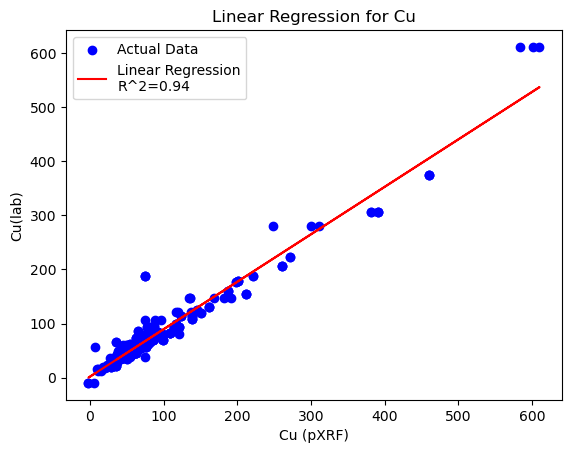

Linear Regression function for Cu: y = 0.88x + 1.57


In [35]:
# Sample DataFrames
df_pXRF = df1
df_lab = df3

# Merge dataframes on the index and only take rows where both dataframes have non-NaN values for the element
combined_df = pd.merge(df_pXRF[['Cu']], df_lab[['Cu']], left_index=True, right_index=True, how='inner').dropna()

X = combined_df[['Cu_x']].values  # Data from df_pXRF
y = combined_df['Cu_y'].values    # Data from df_lab

# Fit the linear regression model
model.fit(X, y)

# Predict using the model
y_pred = model.predict(X)

# Calculate R^2 score
r2 = r2_score(y, y_pred)

# Visualization
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label=f'Linear Regression\nR^2={r2:.2f}')
plt.xlabel(f'Cu (pXRF)')
plt.ylabel(f'Cu(lab)')
plt.legend()
plt.title(f'Linear Regression for Cu')
plt.show()

# Print the regression function
print(f"Linear Regression function for Cu: y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}")

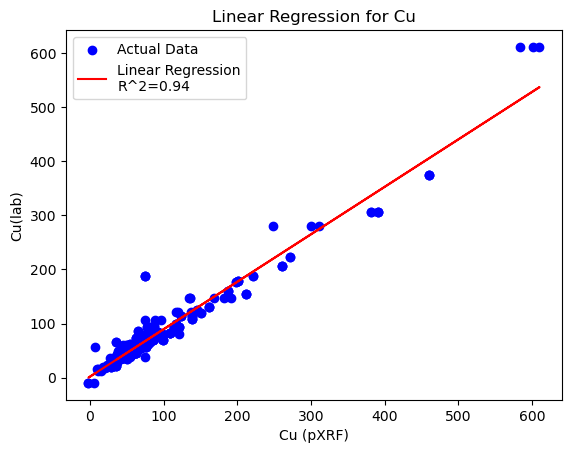

Linear Regression function for Cu: y = 0.88x + 1.57


In [36]:
# Ensure that the combined_df is not empty
if combined_df.empty:
    print("Error: The combined dataframe is empty after merging.")
else:
    X = combined_df[['Cu_x']].values  # Data from df_pXRF
    y = combined_df['Cu_y'].values    # Data from df_lab

    # Fit the linear regression model
    model.fit(X, y)

    # Predict using the model
    y_pred = model.predict(X)

    # Calculate R^2 score
    r2 = r2_score(y, y_pred)

    # Visualization
    plt.scatter(X, y, color='blue', label='Actual Data')
    plt.plot(X, y_pred, color='red', label=f'Linear Regression\nR^2={r2:.2f}')
    plt.xlabel(f'Cu (pXRF)')
    plt.ylabel(f'Cu(lab)')
    plt.legend()
    plt.title(f'Linear Regression for Cu')
    plt.show()

    # Print the regression function
    print(f"Linear Regression function for Cu: y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}")


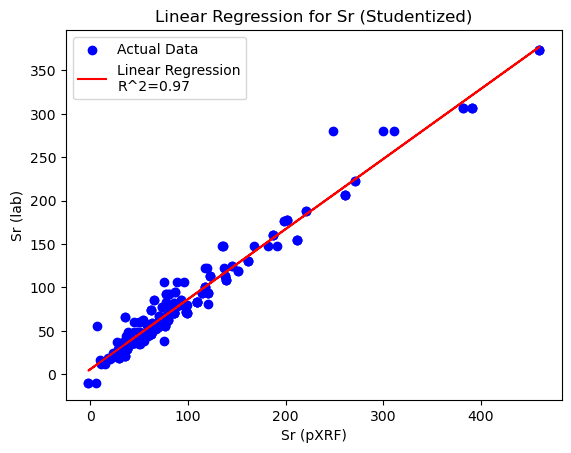

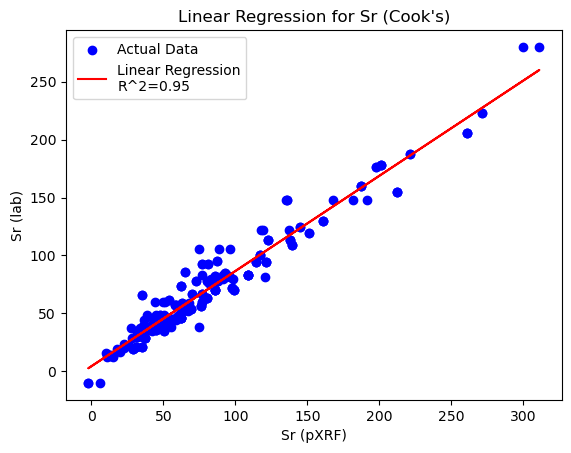

In [37]:
# X = combined_df[[f'{element}_x']].values
# y = combined_df[f'{element}_y'].values

# Fit regression model using statsmodels for detailed statistics
X_const = sm.add_constant(X)  # Adding a constant to the model (i.e., bias or intercept)
ols_model = sm.OLS(y, X_const).fit()

# Studentized Residuals
studentized_residuals = ols_model.get_influence().resid_studentized_external
# Retain only data points that are not outliers based on Studentized residuals
keep_points_studentized = np.abs(studentized_residuals) <= 3

# Cook's Distance
cooks_distance, _ = ols_model.get_influence().cooks_distance
# Threshold for Cook's distance (common rule of thumb)
threshold_cooks = 4 / len(y)
keep_points_cooks = cooks_distance < threshold_cooks

# Now we apply the filters
X_studentized = X[keep_points_studentized]
y_studentized = y[keep_points_studentized]

X_cooks = X[keep_points_cooks]
y_cooks = y[keep_points_cooks]

# Fit the model on data after removing outliers detected by Studentized residuals
model.fit(X_studentized, y_studentized)
y_pred_studentized = model.predict(X_studentized)

# Fit the model on data after removing outliers detected by Cook's distance
model.fit(X_cooks, y_cooks)
y_pred_cooks = model.predict(X_cooks)

# Visualizations and statistics after removing outliers detected by each method
# Studentized residuals method
plt.scatter(X_studentized, y_studentized, color='blue', label='Actual Data')
plt.plot(X_studentized, y_pred_studentized, color='red', label=f'Linear Regression\nR^2={r2_score(y_studentized, y_pred_studentized):.2f}')
plt.xlabel(f'{element} (pXRF)')
plt.ylabel(f'{element} (lab)')
plt.legend()
plt.title(f'Linear Regression for {element} (Studentized)')
plt.show()

# Cook's distance method
plt.scatter(X_cooks, y_cooks, color='blue', label='Actual Data')
plt.plot(X_cooks, y_pred_cooks, color='red', label=f'Linear Regression\nR^2={r2_score(y_cooks, y_pred_cooks):.2f}')
plt.xlabel(f'{element} (pXRF)')
plt.ylabel(f'{element} (lab)')
plt.legend()
plt.title(f'Linear Regression for {element} (Cook\'s)')
plt.show()

In [38]:
# # Impute NaN values with median
# combined_df['Cu_x'].fillna(combined_df['Cu_x'].median(), inplace=True)
# combined_df['Cu_y'].fillna(combined_df['Cu_y'].median(), inplace=True)

In [39]:
# Fit regression model using statsmodels for detailed statistics
X_const = sm.add_constant(X)  # Adding a constant to the model (i.e., bias or intercept)
model = sm.OLS(y, X_const)
ols_model = model.fit()

In [40]:
# Studentized Residuals
studentized_residuals = ols_model.get_influence().resid_studentized_external
# Filter based on Studentized residuals
keep_points_studentized = np.abs(studentized_residuals) <= 3
X_studentized = X[keep_points_studentized]
y_studentized = y[keep_points_studentized]

# Cook's Distance
cooks_distance, _ = ols_model.get_influence().cooks_distance
# Filter based on Cook's distance (common rule of thumb)
threshold_cooks = 4 / len(y)
keep_points_cooks = cooks_distance < threshold_cooks
X_cooks = X[keep_points_cooks]
y_cooks = y[keep_points_cooks]


In [41]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=1e-10, solver="auto")  # "auto" lets Ridge decide the best solver
model.fit(X_studentized, y_studentized)

Ridge(alpha=1e-10)

Regression Function after removing Studentized residuals outliers: y = 0.81x + 5.84
Regression Function after removing Cook's distance outliers: y = 0.82x + 4.36


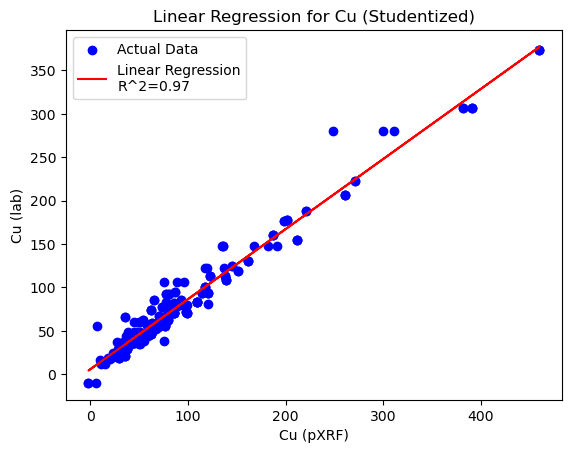

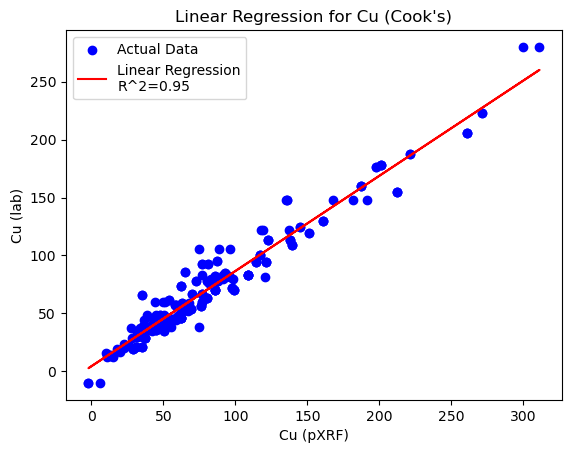

In [42]:
# Fit the model on data after removing outliers detected by Studentized residuals
y_pred_studentized = model.predict(X_studentized)
print(f"Regression Function after removing Studentized residuals outliers: y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}")

# Fit the model on data after removing outliers detected by Cook's distance
model.fit(X_cooks, y_cooks)
y_pred_cooks = model.predict(X_cooks)
print(f"Regression Function after removing Cook's distance outliers: y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}")

# Visualization for Studentized method
plt.scatter(X_studentized, y_studentized, color='blue', label='Actual Data')
plt.plot(X_studentized, y_pred_studentized, color='red', label=f'Linear Regression\nR^2={r2_score(y_studentized, y_pred_studentized):.2f}')
plt.xlabel(f'Cu (pXRF)')
plt.ylabel(f'Cu (lab)')
plt.legend()
plt.title(f'Linear Regression for Cu (Studentized)')
plt.show()

# Visualization for Cook's distance method
plt.scatter(X_cooks, y_cooks, color='blue', label='Actual Data')
plt.plot(X_cooks, y_pred_cooks, color='red', label=f'Linear Regression\nR^2={r2_score(y_cooks, y_pred_cooks):.2f}')
plt.xlabel(f'Cu (pXRF)')
plt.ylabel(f'Cu (lab)')
plt.legend()
plt.title(f'Linear Regression for Cu (Cook\'s)')
plt.show()

In [43]:
print(X_studentized.shape)

(250, 1)


In [44]:
print(y_studentized.shape)

(250,)


In [45]:
# # Read the first sheet into a DataFrame
# df1 = pd.read_excel(file_path, sheet_name='pXRF')

# # Read the second sheet into another DataFrame
# df2 = pd.read_excel(file_path, sheet_name='lab_assay')

In [46]:
# # Convert columns for both dataframes
# df1 = convert_to_ppm(df1)
# df2 = convert_to_ppm(df2)

In [47]:
# rename_columns(df1)

In [48]:
df3 = df2[['Point number','Cu Final ppm']]

In [49]:
rename_columns(df3)

C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\180492139.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=new_column_names, inplace=True)


In [50]:
df4 = df2.merge(df3, left_index=True, right_index=True)
df4

Point number Prospect     Coordinates.Grid  Coordinates.East  \
0       MP01266S   Ridler  GDA94 / MGA zone 56          325300.0   
1       MP01264S   Ridler  GDA94 / MGA zone 56          325200.0   
2       MP01260S   Ridler  GDA94 / MGA zone 56          325150.0   
3       MP01259S   Ridler  GDA94 / MGA zone 56          325100.0   
4       MP01258S   Ridler  GDA94 / MGA zone 56          325050.0   
..           ...      ...                  ...               ...   
262     MP01012S      NaN  GDA94 / MGA zone 56          325000.0   
263     MP01011S      NaN  GDA94 / MGA zone 56          324950.0   
264     MP01010S      NaN  GDA94 / MGA zone 56          324900.0   
265     MP01009S      NaN  GDA94 / MGA zone 56          324850.0   
266     MP01008S      NaN  GDA94 / MGA zone 56          324800.0   

     Coordinates.North  Coordinates.RL Sample Number Sample Type  \
0            7296050.0           155.0      MP01266S    Original   
1            7296050.0           181.0      MP01264S    Original   
2            7296050.0           187.0      MP01260S    Original   
3            7296050.0           187.0      MP01259S    Original   
4            7296050.0           189.0      MP01258S    Original   
..                 ...             ...           ...         ...   
262          7296600.0           134.0      MP01012S    Original   
263          7296600.0           139.0      MP01011S    Original   
264          7296600.0           142.0      MP01010S    Original   
265          7296600.0           142.0      MP01009S    Original   
266          7296600.0           142.0      MP01008S    Original   

     Control Type AssayMethod  ... Min2Style  Min2_pct  Lith1Desc  Lith2Desc  \
0             NaN      ICP-MS  ...       NaN       NaN        NaN        NaN   
1             NaN      ICP-MS  ...       NaN       NaN        NaN        NaN   
2             NaN      ICP-MS  ...       NaN       NaN        NaN        NaN   
3             NaN      ICP-MS  ...       NaN       NaN        NaN        NaN   
4             NaN      ICP-MS  ...       NaN       NaN        NaN        NaN   
..            ...         ...  ...       ...       ...        ...        ...   
262           NaN      ICP-MS  ...       NaN       NaN        NaN        NaN   
263           NaN      ICP-MS  ...       NaN       NaN        NaN        NaN   
264           NaN      ICP-MS  ...       NaN       NaN        NaN        NaN   
265           NaN      ICP-MS  ...       NaN       NaN        NaN        NaN   
266           NaN      ICP-MS  ...       NaN       NaN        NaN        NaN   

     SoilDesc  Sample Moist  Sample Condition  Comments     Point  Cu  
0         NaN           NaN               NaN       NaN  MP01266S  31  
1         NaN           NaN               NaN       NaN  MP01264S  37  
2         NaN           NaN               NaN       NaN  MP01260S  52  
3         NaN           NaN               NaN       NaN  MP01259S  32  
4         NaN           NaN               NaN       NaN  MP01258S  39  
..        ...           ...               ...       ...       ...  ..  
262       NaN           NaN               NaN       NaN  MP01012S  38  
263       NaN           NaN               NaN       NaN  MP01011S  45  
264       NaN           NaN               NaN       NaN  MP01010S  57  
265       NaN           NaN               NaN       NaN  MP01009S  92  
266       NaN           NaN               NaN       NaN  MP01008S  42  

[267 rows x 108 columns]

In [51]:
df4.set_index('Point', inplace=True)

In [52]:
df_pXRF

Prospect     Coordinates.Grid  Coordinates.East  \
Point                                                            
MP01871S  Sugarbag East  GDA94 / MGA zone 56               NaN   
MP01101S         Ridler  GDA94 / MGA zone 56               NaN   
MP01101S         Ridler  GDA94 / MGA zone 56               NaN   
MP01101S         Ridler  GDA94 / MGA zone 56               NaN   
MP01061S            NaN  GDA94 / MGA zone 56               NaN   
...                 ...                  ...               ...   
MP01051S            NaN  GDA94 / MGA zone 56          324750.0   
MP01051S            NaN  GDA94 / MGA zone 56          324750.0   
MP01050S            NaN  GDA94 / MGA zone 56          324700.0   
MP01050S            NaN  GDA94 / MGA zone 56          324700.0   
MP01050S            NaN  GDA94 / MGA zone 56          324700.0   

          Coordinates.North  Coordinates.RL  Sample       Date Units      Mg  \
Point                                                                          
MP01871S                NaN             NaN     RAW 2023-08-10   PPM  5388.0   
MP01101S                NaN             NaN     RAW 2023-01-13   PPM     NaN   
MP01101S                NaN             NaN     RAW 2023-01-13   PPM     NaN   
MP01101S                NaN             NaN     RAW 2023-01-13   PPM     NaN   
MP01061S                NaN             NaN    PULP 2023-06-06   PPM  2495.0   
...                     ...             ...     ...        ...   ...     ...   
MP01051S          7296500.0           126.0    PULP 2023-06-06   PPM  3436.0   
MP01051S          7296500.0           126.0    PULP 2023-06-06   PPM  3436.0   
MP01050S          7296500.0           155.0    PULP 2023-06-06   PPM -1100.0   
MP01050S          7296500.0           155.0    PULP 2023-06-06   PPM -1100.0   
MP01050S          7296500.0           155.0    PULP 2023-06-06   PPM -1100.0   

               Al  ...      Au      Hg       Pb    Bi     Th       U  Quality  \
Point              ...                                                          
MP01871S  51655.0  ... -1.0000 -1.0000  -2.0000  16.0  -2.00 -1.0000      NaN   
MP01101S      NaN  ... -0.0001 -0.0001  -0.0001   NaN  14.65 -0.0001      NaN   
MP01101S      NaN  ... -0.0001 -0.0001  -0.0001   NaN   4.17 -0.0001      NaN   
MP01101S      NaN  ... -0.0001 -0.0001  -0.0001   NaN  20.86 -0.0001      NaN   
MP01061S  60436.0  ... -1.0000 -1.0000   9.0000  -1.0  14.00 -1.0000      NaN   
...           ...  ...     ...     ...      ...   ...    ...     ...      ...   
MP01051S  53508.0  ... -1.0000 -1.0000  10.0000  -1.0  34.00 -1.0000      NaN   
MP01051S  53508.0  ... -1.0000 -1.0000  10.0000  -1.0  34.00 -1.0000      NaN   
MP01050S  47016.0  ... -1.0000 -1.0000  10.0000  -1.0  27.00 -1.0000      NaN   
MP01050S  47016.0  ... -1.0000 -1.0000  10.0000  -1.0  27.00 -1.0000      NaN   
MP01050S  47016.0  ... -1.0000 -1.0000  10.0000  -1.0  27.00 -1.0000      NaN   

          Notes  Device   Sample  
Point                             
MP01871S      1   Vanta  SGS0010  
MP01101S    NaN   Niton  SGS0003  
MP01101S    NaN   Niton  SGS0003  
MP01101S    NaN   Niton  SGS0003  
MP01061S      1   Vanta  SGS0003  
...         ...     ...      ...  
MP01051S      1   Vanta  SGS0003  
MP01051S      1   Vanta  SGS0003  
MP01050S      1   Vanta  SGS0003  
MP01050S      1   Vanta  SGS0003  
MP01050S      1   Vanta  SGS0003  

[274 rows x 52 columns]

In [53]:
df_lab

Cu
Point       
MP01266S  31
MP01264S  37
MP01260S  52
MP01259S  32
MP01258S  39
...       ..
MP01012S  38
MP01011S  45
MP01010S  57
MP01009S  92
MP01008S  42

[267 rows x 1 columns]

In [54]:
# Sample DataFrames
df_pXRF = df1
df_lab = df4

In [55]:
df_pXRF.iloc[:, 8:49]

Mg       Al        Si      P        S         K        Ca  \
Point                                                                     
MP01871S  5388.0  51655.0  201272.0  652.0 -13.0000   8282.00   5447.00   
MP01101S     NaN      NaN       NaN    NaN  -0.0001  21227.39  10557.50   
MP01101S     NaN      NaN       NaN    NaN  -0.0001  16823.53   9522.32   
MP01101S     NaN      NaN       NaN    NaN  -0.0001  21246.46  10343.35   
MP01061S  2495.0  60436.0  250659.0  387.0 -13.0000  27517.00   7081.00   
...          ...      ...       ...    ...      ...       ...       ...   
MP01051S  3436.0  53508.0  212475.0  443.0 -13.0000  24004.00  10506.00   
MP01051S  3436.0  53508.0  212475.0  443.0 -13.0000  24004.00  10506.00   
MP01050S -1100.0  47016.0  232222.0  306.0 -13.0000  24453.00   7456.00   
MP01050S -1100.0  47016.0  232222.0  306.0 -13.0000  24453.00   7456.00   
MP01050S -1100.0  47016.0  232222.0  306.0 -13.0000  24453.00   7456.00   

               Ti       V       Cr  ...    Pr    Nd        W      Au      Hg  \
Point                               ...                                        
MP01871S  5712.00  127.00  -8.0000  ... -30.0 -60.0  18.0000 -1.0000 -1.0000   
MP01101S  4127.36  116.47  -0.0001  ...   NaN   NaN  -0.0001 -0.0001 -0.0001   
MP01101S  3466.78   83.05  -0.0001  ...   NaN   NaN  -0.0001 -0.0001 -0.0001   
MP01101S  4690.04   92.70  -0.0001  ...   NaN   NaN  -0.0001 -0.0001 -0.0001   
MP01061S  4577.00  110.00  41.0000  ... -30.0 -60.0  19.0000 -1.0000 -1.0000   
...           ...     ...      ...  ...   ...   ...      ...     ...     ...   
MP01051S  4583.00  156.00  67.0000  ... -30.0 -60.0  11.0000 -1.0000 -1.0000   
MP01051S  4583.00  156.00  67.0000  ... -30.0 -60.0  11.0000 -1.0000 -1.0000   
MP01050S  4289.00   91.00  -8.0000  ... -30.0 -60.0  11.0000 -1.0000 -1.0000   
MP01050S  4289.00   91.00  -8.0000  ... -30.0 -60.0  11.0000 -1.0000 -1.0000   
MP01050S  4289.00   91.00  -8.0000  ... -30.0 -60.0  11.0000 -1.0000 -1.0000   

               Pb    Bi     Th       U  Quality  
Point                                            
MP01871S  -2.0000  16.0  -2.00 -1.0000      NaN  
MP01101S  -0.0001   NaN  14.65 -0.0001      NaN  
MP01101S  -0.0001   NaN   4.17 -0.0001      NaN  
MP01101S  -0.0001   NaN  20.86 -0.0001      NaN  
MP01061S   9.0000  -1.0  14.00 -1.0000      NaN  
...           ...   ...    ...     ...      ...  
MP01051S  10.0000  -1.0  34.00 -1.0000      NaN  
MP01051S  10.0000  -1.0  34.00 -1.0000      NaN  
MP01050S  10.0000  -1.0  27.00 -1.0000      NaN  
MP01050S  10.0000  -1.0  27.00 -1.0000      NaN  
MP01050S  10.0000  -1.0  27.00 -1.0000      NaN  

[274 rows x 41 columns]

In [56]:
rename_columns(df_lab)

In [57]:
df_lab.iloc[:, 11:81]

Au   Ag  As  Cu   Mn  Pb   Ag    Al  As    Au  ...   Tm    U    V  \
Point                                                      ...                  
MP01266S -0.01 -0.5  -5  31  224   9 -0.5  6.45  -5 -0.01  ... -0.3  3.2   57   
MP01264S -0.01 -0.5  -5  37  148  17 -0.5  7.47  -5 -0.01  ... -0.3  4.0   82   
MP01260S  0.01 -0.5  -5  52  247  17 -0.5  7.36  -5  0.01  ... -0.3  4.9   81   
MP01259S  0.01 -0.5  -5  32  316  18 -0.5  6.72  -5  0.01  ... -0.3  3.3   86   
MP01258S -0.01 -0.5  -5  39  536  11 -0.5  8.01  -5 -0.01  ...  0.3  3.5  147   
...        ...  ...  ..  ..  ...  ..  ...   ...  ..   ...  ...  ...  ...  ...   
MP01012S -0.01 -0.5  10  38  425   8 -0.5  5.36  10 -0.01  ...  0.3  1.4  104   
MP01011S -0.01 -0.5   9  45  491   7 -0.5  5.76   9 -0.01  ... -0.3  1.2   89   
MP01010S -0.01 -0.5   7  57  339   8 -0.5  5.93   7 -0.01  ... -0.3  1.2   79   
MP01009S -0.01 -0.5   9  92  309   8 -0.5  6.23   9 -0.01  ... -0.3  1.3   88   
MP01008S -0.01 -0.5   5  42  420   8 -0.5  5.12   5 -0.01  ... -0.3  1.2   63   

           W    W  WTKG     Y   Yb  Zn  Zr  
Point                                       
MP01266S NaN  2.6  0.27   8.5  0.7  72  57  
MP01264S NaN  2.1  0.26  13.8  1.2  42  62  
MP01260S NaN  1.4  0.30  17.3  1.4  49  64  
MP01259S NaN  1.5  0.30  11.6  0.7  54  56  
MP01258S NaN  2.1  0.26  21.7  1.3  74  88  
...       ..  ...   ...   ...  ...  ..  ..  
MP01012S NaN  1.2  0.19  11.4  1.1  28  43  
MP01011S NaN -0.5  0.26  10.3  0.8  33  31  
MP01010S NaN  1.1  0.18   9.9  1.1  46  16  
MP01009S NaN  1.1  0.24  10.9  0.8  30  25  
MP01008S NaN  1.5  0.25   9.8  0.6  36  38  

[267 rows x 70 columns]

In [58]:
# Ensure that the DataFrames are joined on an appropriate key (index in this case)
merged_df = pd.merge(df_pXRF.iloc[:, 8:49], df_lab.iloc[:, 11:81], left_index=True, right_index=True, suffixes=('_pXRF', '_lab'))

merged_df

Mg_pXRF  Al_pXRF        Si  P_pXRF  S_pXRF   K_pXRF  Ca_pXRF  \
Point                                                                    
MP01050S  -1100.0  47016.0  232222.0   306.0   -13.0  24453.0   7456.0   
MP01050S  -1100.0  47016.0  232222.0   306.0   -13.0  24453.0   7456.0   
MP01050S  -1100.0  47016.0  232222.0   306.0   -13.0  24453.0   7456.0   
MP01051S   3436.0  53508.0  212475.0   443.0   -13.0  24004.0  10506.0   
MP01051S   3436.0  53508.0  212475.0   443.0   -13.0  24004.0  10506.0   
...           ...      ...       ...     ...     ...      ...      ...   
MP01878S   4614.0  55401.0  197910.0   551.0    79.0   1852.0   4140.0   
MP01879S   6872.0  54203.0  207104.0   440.0   -13.0   1048.0   4296.0   
MP01880S   4740.0  60992.0  236675.0   247.0   -13.0   5613.0   7286.0   
MP01881S   9081.0  64149.0  168392.0   401.0   -13.0   2826.0   8999.0   
MP01882S   4465.0  60024.0  234614.0   223.0   -13.0   5817.0   7277.0   

          Ti_pXRF  V_pXRF  Cr_pXRF  ...   Tm  U_lab  V_lab  W_lab  W_lab  \
Point                               ...                                    
MP01050S   4289.0    91.0     -8.0  ... -0.3    1.3     64    NaN   -0.5   
MP01050S   4289.0    91.0     -8.0  ... -0.3    1.3     64    NaN   -0.5   
MP01050S   4289.0    91.0     -8.0  ... -0.3    1.3     64    NaN   -0.5   
MP01051S   4583.0   156.0     67.0  ... -0.3    2.1    134    NaN    0.9   
MP01051S   4583.0   156.0     67.0  ... -0.3    2.1    134    NaN    0.9   
...           ...     ...      ...  ...  ...    ...    ...    ...    ...   
MP01878S   6428.0   114.0     -8.0  ...  0.3   -0.3    126    NaN   -0.5   
MP01879S   6706.0   180.0     61.0  ... -0.3   -0.3    133    NaN   -0.5   
MP01880S   3274.0    -4.0     44.0  ... -0.3   -0.3     56    NaN   -0.5   
MP01881S   8123.0   327.0     -8.0  ...  0.7    0.3    400    NaN   -0.5   
MP01882S   3458.0    73.0     -8.0  ...  0.5   -0.3    443    NaN    3.6   

          WTKG  Y_lab   Yb  Zn_lab  Zr_lab  
Point                                       
MP01050S  0.22    9.8  0.9     -25      19  
MP01050S  0.22    9.8  0.9     -25      19  
MP01050S  0.22    9.8  0.9     -25      19  
MP01051S  0.22   14.9  1.3      28      23  
MP01051S  0.22   14.9  1.3      28      23  
...        ...    ...  ...     ...     ...  
MP01878S  0.16   13.7  1.7      59      46  
MP01879S  0.18   13.4  1.6      60      36  
MP01880S  0.27    4.7  0.8      29      31  
MP01881S  0.15   29.3  4.2     121      95  
MP01882S  0.16   18.8  2.9     106      50  

[256 rows x 111 columns]

In [59]:
correlations = {}

for element in elements:
    if f"{element}_pXRF" in merged_df.columns and f"{element}_lab" in merged_df.columns:
        corr_value = merged_df[f"{element}_pXRF"].corr(merged_df[f"{element}_lab"])
        correlations[element] = corr_value

# Convert correlations dictionary to a DataFrame for heatmap
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Element', 'Correlation'])
correlation_df

Element  Correlation
0       Ca     0.930697
1       Mo     0.244932
2       Ni     0.192682
3       Fe     0.823530
4       Zn     0.687429
5        Y     0.847435
6       Ba     0.853263
7       Zr    -0.394012
8       Th     0.605261
9        P     0.906171
10      Co     0.280940
11       K     0.895072
12      Rb     0.967020
13      Ti     0.884658
14      Al     0.778918
15       V     0.696984
16      Sr     0.959086

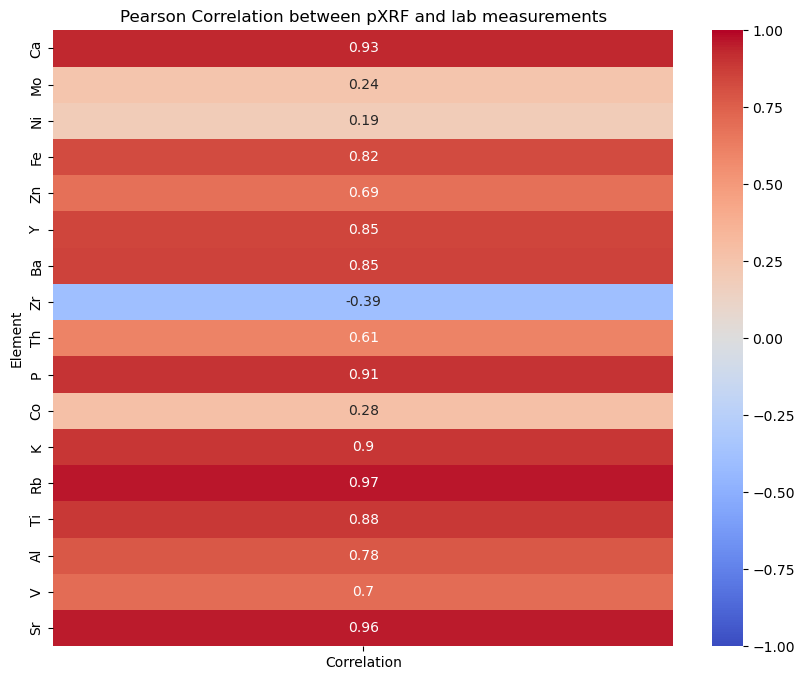

In [60]:
# Set Element as index
correlation_df.set_index('Element', inplace=True)

# Draw the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Pearson Correlation between pXRF and lab measurements")
plt.show()

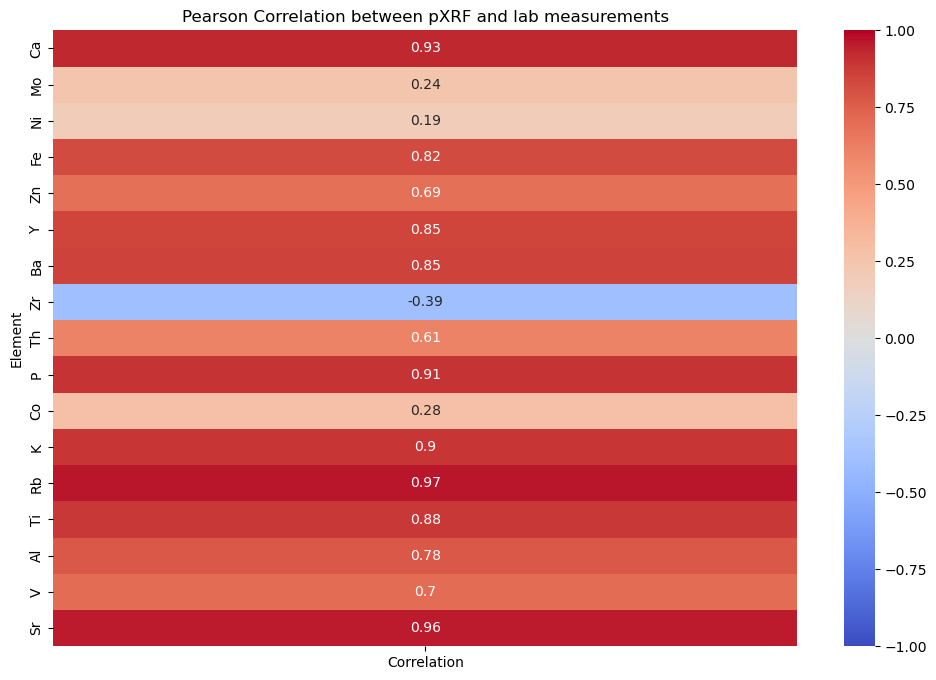

In [61]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1, yticklabels=correlations.keys())
plt.title("Pearson Correlation between pXRF and lab measurements")
plt.show()

In [62]:
# Read the first sheet into a DataFrame
df1 = pd.read_excel(file_path, sheet_name='pXRF')

# Read the second sheet into another DataFrame
df2 = pd.read_excel(file_path, sheet_name='lab_assay')

In [63]:
# Convert columns for both dataframes
df1 = convert_to_ppm(df1)
df2 = convert_to_ppm(df2)

In [64]:
df5 = df2[['Point number','Cu Final ppm']]

In [65]:
rename_columns(df1)

In [66]:
rename_columns(df2)

In [67]:
rename_columns(df5)

C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\180492139.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=new_column_names, inplace=True)


In [68]:
df2 = df2.drop(columns=['Cu'])

In [69]:
df6 = df2.merge(df5, on='Point', how='inner')

In [70]:
df6

Point Prospect     Coordinates.Grid  Coordinates.East  \
0    MP01266S   Ridler  GDA94 / MGA zone 56          325300.0   
1    MP01264S   Ridler  GDA94 / MGA zone 56          325200.0   
2    MP01260S   Ridler  GDA94 / MGA zone 56          325150.0   
3    MP01259S   Ridler  GDA94 / MGA zone 56          325100.0   
4    MP01258S   Ridler  GDA94 / MGA zone 56          325050.0   
..        ...      ...                  ...               ...   
262  MP01012S      NaN  GDA94 / MGA zone 56          325000.0   
263  MP01011S      NaN  GDA94 / MGA zone 56          324950.0   
264  MP01010S      NaN  GDA94 / MGA zone 56          324900.0   
265  MP01009S      NaN  GDA94 / MGA zone 56          324850.0   
266  MP01008S      NaN  GDA94 / MGA zone 56          324800.0   

     Coordinates.North  Coordinates.RL    Sample    Sample  Control  \
0            7296050.0           155.0  MP01266S  Original      NaN   
1            7296050.0           181.0  MP01264S  Original      NaN   
2            7296050.0           187.0  MP01260S  Original      NaN   
3            7296050.0           187.0  MP01259S  Original      NaN   
4            7296050.0           189.0  MP01258S  Original      NaN   
..                 ...             ...       ...       ...      ...   
262          7296600.0           134.0  MP01012S  Original      NaN   
263          7296600.0           139.0  MP01011S  Original      NaN   
264          7296600.0           142.0  MP01010S  Original      NaN   
265          7296600.0           142.0  MP01009S  Original      NaN   
266          7296600.0           142.0  MP01008S  Original      NaN   

    AssayMethod  ...       Al      Ca       Fe        K      Mg       Na  \
0        ICP-MS  ...  64500.0  4700.0  14300.0  33500.0  2300.0  21800.0   
1        ICP-MS  ...  74700.0  5400.0  29800.0  29600.0  4200.0  23100.0   
2        ICP-MS  ...  73600.0  8500.0  29400.0  29400.0  5400.0  21000.0   
3        ICP-MS  ...  67200.0  6200.0  29400.0  27000.0  3900.0  20500.0   
4        ICP-MS  ...  80100.0  9700.0  44900.0  22400.0  7800.0  21500.0   
..          ...  ...      ...     ...      ...      ...     ...      ...   
262      ICP-MS  ...  53600.0  9000.0  27200.0  22400.0  3500.0  16900.0   
263      ICP-MS  ...  57600.0  5900.0  27400.0  24000.0  4500.0  23200.0   
264      ICP-MS  ...  59300.0  6700.0  27400.0  18900.0  5900.0  20800.0   
265      ICP-MS  ...  62300.0  4700.0  27300.0  20800.0  3400.0  24800.0   
266      ICP-MS  ...  51200.0  6300.0  17800.0  26100.0  3300.0  23000.0   

         P      S      Ti  Cu  
0    200.0 -100.0  2290.0  31  
1    200.0 -100.0  2750.0  37  
2    400.0  200.0  2850.0  52  
3    200.0  100.0  3250.0  32  
4    600.0  200.0  4760.0  39  
..     ...    ...     ...  ..  
262  400.0  200.0  5210.0  38  
263  500.0  200.0  3850.0  45  
264  600.0  200.0  4000.0  57  
265  500.0  200.0  4210.0  92  
266  400.0  200.0  3600.0  42  

[267 rows x 104 columns]

In [71]:
# Sample DataFrames
df_pXRF = df1
df_lab = df6

In [72]:
df_pXRF

Point       Prospect     Coordinates.Grid  Coordinates.East  \
0    MP01871S  Sugarbag East  GDA94 / MGA zone 56               NaN   
1    MP01101S         Ridler  GDA94 / MGA zone 56               NaN   
2    MP01101S         Ridler  GDA94 / MGA zone 56               NaN   
3    MP01101S         Ridler  GDA94 / MGA zone 56               NaN   
4    MP01061S            NaN  GDA94 / MGA zone 56               NaN   
..        ...            ...                  ...               ...   
269  MP01051S            NaN  GDA94 / MGA zone 56          324750.0   
270  MP01051S            NaN  GDA94 / MGA zone 56          324750.0   
271  MP01050S            NaN  GDA94 / MGA zone 56          324700.0   
272  MP01050S            NaN  GDA94 / MGA zone 56          324700.0   
273  MP01050S            NaN  GDA94 / MGA zone 56          324700.0   

     Coordinates.North  Coordinates.RL  Sample       Date Units      Mg  ...  \
0                  NaN             NaN     RAW 2023-08-10   PPM  5388.0  ...   
1                  NaN             NaN     RAW 2023-01-13   PPM     NaN  ...   
2                  NaN             NaN     RAW 2023-01-13   PPM     NaN  ...   
3                  NaN             NaN     RAW 2023-01-13   PPM     NaN  ...   
4                  NaN             NaN    PULP 2023-06-06   PPM  2495.0  ...   
..                 ...             ...     ...        ...   ...     ...  ...   
269          7296500.0           126.0    PULP 2023-06-06   PPM  3436.0  ...   
270          7296500.0           126.0    PULP 2023-06-06   PPM  3436.0  ...   
271          7296500.0           155.0    PULP 2023-06-06   PPM -1100.0  ...   
272          7296500.0           155.0    PULP 2023-06-06   PPM -1100.0  ...   
273          7296500.0           155.0    PULP 2023-06-06   PPM -1100.0  ...   

         Au      Hg       Pb    Bi     Th       U  Quality  Notes  Device  \
0   -1.0000 -1.0000  -2.0000  16.0  -2.00 -1.0000      NaN      1   Vanta   
1   -0.0001 -0.0001  -0.0001   NaN  14.65 -0.0001      NaN    NaN   Niton   
2   -0.0001 -0.0001  -0.0001   NaN   4.17 -0.0001      NaN    NaN   Niton   
3   -0.0001 -0.0001  -0.0001   NaN  20.86 -0.0001      NaN    NaN   Niton   
4   -1.0000 -1.0000   9.0000  -1.0  14.00 -1.0000      NaN      1   Vanta   
..      ...     ...      ...   ...    ...     ...      ...    ...     ...   
269 -1.0000 -1.0000  10.0000  -1.0  34.00 -1.0000      NaN      1   Vanta   
270 -1.0000 -1.0000  10.0000  -1.0  34.00 -1.0000      NaN      1   Vanta   
271 -1.0000 -1.0000  10.0000  -1.0  27.00 -1.0000      NaN      1   Vanta   
272 -1.0000 -1.0000  10.0000  -1.0  27.00 -1.0000      NaN      1   Vanta   
273 -1.0000 -1.0000  10.0000  -1.0  27.00 -1.0000      NaN      1   Vanta   

      Sample  
0    SGS0010  
1    SGS0003  
2    SGS0003  
3    SGS0003  
4    SGS0003  
..       ...  
269  SGS0003  
270  SGS0003  
271  SGS0003  
272  SGS0003  
273  SGS0003  

[274 rows x 53 columns]

In [73]:
df_pXRF[['Cu']]

Cu
0     33.00
1    174.25
2    184.44
3    203.85
4    107.00
..      ...
269   98.00
270   98.00
271   37.00
272   37.00
273   37.00

[274 rows x 1 columns]

In [74]:
df_lab

Point Prospect     Coordinates.Grid  Coordinates.East  \
0    MP01266S   Ridler  GDA94 / MGA zone 56          325300.0   
1    MP01264S   Ridler  GDA94 / MGA zone 56          325200.0   
2    MP01260S   Ridler  GDA94 / MGA zone 56          325150.0   
3    MP01259S   Ridler  GDA94 / MGA zone 56          325100.0   
4    MP01258S   Ridler  GDA94 / MGA zone 56          325050.0   
..        ...      ...                  ...               ...   
262  MP01012S      NaN  GDA94 / MGA zone 56          325000.0   
263  MP01011S      NaN  GDA94 / MGA zone 56          324950.0   
264  MP01010S      NaN  GDA94 / MGA zone 56          324900.0   
265  MP01009S      NaN  GDA94 / MGA zone 56          324850.0   
266  MP01008S      NaN  GDA94 / MGA zone 56          324800.0   

     Coordinates.North  Coordinates.RL    Sample    Sample  Control  \
0            7296050.0           155.0  MP01266S  Original      NaN   
1            7296050.0           181.0  MP01264S  Original      NaN   
2            7296050.0           187.0  MP01260S  Original      NaN   
3            7296050.0           187.0  MP01259S  Original      NaN   
4            7296050.0           189.0  MP01258S  Original      NaN   
..                 ...             ...       ...       ...      ...   
262          7296600.0           134.0  MP01012S  Original      NaN   
263          7296600.0           139.0  MP01011S  Original      NaN   
264          7296600.0           142.0  MP01010S  Original      NaN   
265          7296600.0           142.0  MP01009S  Original      NaN   
266          7296600.0           142.0  MP01008S  Original      NaN   

    AssayMethod  ...       Al      Ca       Fe        K      Mg       Na  \
0        ICP-MS  ...  64500.0  4700.0  14300.0  33500.0  2300.0  21800.0   
1        ICP-MS  ...  74700.0  5400.0  29800.0  29600.0  4200.0  23100.0   
2        ICP-MS  ...  73600.0  8500.0  29400.0  29400.0  5400.0  21000.0   
3        ICP-MS  ...  67200.0  6200.0  29400.0  27000.0  3900.0  20500.0   
4        ICP-MS  ...  80100.0  9700.0  44900.0  22400.0  7800.0  21500.0   
..          ...  ...      ...     ...      ...      ...     ...      ...   
262      ICP-MS  ...  53600.0  9000.0  27200.0  22400.0  3500.0  16900.0   
263      ICP-MS  ...  57600.0  5900.0  27400.0  24000.0  4500.0  23200.0   
264      ICP-MS  ...  59300.0  6700.0  27400.0  18900.0  5900.0  20800.0   
265      ICP-MS  ...  62300.0  4700.0  27300.0  20800.0  3400.0  24800.0   
266      ICP-MS  ...  51200.0  6300.0  17800.0  26100.0  3300.0  23000.0   

         P      S      Ti  Cu  
0    200.0 -100.0  2290.0  31  
1    200.0 -100.0  2750.0  37  
2    400.0  200.0  2850.0  52  
3    200.0  100.0  3250.0  32  
4    600.0  200.0  4760.0  39  
..     ...    ...     ...  ..  
262  400.0  200.0  5210.0  38  
263  500.0  200.0  3850.0  45  
264  600.0  200.0  4000.0  57  
265  500.0  200.0  4210.0  92  
266  400.0  200.0  3600.0  42  

[267 rows x 104 columns]

In [75]:
df_lab[['Cu']]

Cu
0    31
1    37
2    52
3    32
4    39
..   ..
262  38
263  45
264  57
265  92
266  42

[267 rows x 1 columns]

In [76]:
df_pXRF.set_index('Point', inplace=True)
df_lab.set_index('Point', inplace=True)

In [77]:
df_pXRF

Prospect     Coordinates.Grid  Coordinates.East  \
Point                                                            
MP01871S  Sugarbag East  GDA94 / MGA zone 56               NaN   
MP01101S         Ridler  GDA94 / MGA zone 56               NaN   
MP01101S         Ridler  GDA94 / MGA zone 56               NaN   
MP01101S         Ridler  GDA94 / MGA zone 56               NaN   
MP01061S            NaN  GDA94 / MGA zone 56               NaN   
...                 ...                  ...               ...   
MP01051S            NaN  GDA94 / MGA zone 56          324750.0   
MP01051S            NaN  GDA94 / MGA zone 56          324750.0   
MP01050S            NaN  GDA94 / MGA zone 56          324700.0   
MP01050S            NaN  GDA94 / MGA zone 56          324700.0   
MP01050S            NaN  GDA94 / MGA zone 56          324700.0   

          Coordinates.North  Coordinates.RL  Sample       Date Units      Mg  \
Point                                                                          
MP01871S                NaN             NaN     RAW 2023-08-10   PPM  5388.0   
MP01101S                NaN             NaN     RAW 2023-01-13   PPM     NaN   
MP01101S                NaN             NaN     RAW 2023-01-13   PPM     NaN   
MP01101S                NaN             NaN     RAW 2023-01-13   PPM     NaN   
MP01061S                NaN             NaN    PULP 2023-06-06   PPM  2495.0   
...                     ...             ...     ...        ...   ...     ...   
MP01051S          7296500.0           126.0    PULP 2023-06-06   PPM  3436.0   
MP01051S          7296500.0           126.0    PULP 2023-06-06   PPM  3436.0   
MP01050S          7296500.0           155.0    PULP 2023-06-06   PPM -1100.0   
MP01050S          7296500.0           155.0    PULP 2023-06-06   PPM -1100.0   
MP01050S          7296500.0           155.0    PULP 2023-06-06   PPM -1100.0   

               Al  ...      Au      Hg       Pb    Bi     Th       U  Quality  \
Point              ...                                                          
MP01871S  51655.0  ... -1.0000 -1.0000  -2.0000  16.0  -2.00 -1.0000      NaN   
MP01101S      NaN  ... -0.0001 -0.0001  -0.0001   NaN  14.65 -0.0001      NaN   
MP01101S      NaN  ... -0.0001 -0.0001  -0.0001   NaN   4.17 -0.0001      NaN   
MP01101S      NaN  ... -0.0001 -0.0001  -0.0001   NaN  20.86 -0.0001      NaN   
MP01061S  60436.0  ... -1.0000 -1.0000   9.0000  -1.0  14.00 -1.0000      NaN   
...           ...  ...     ...     ...      ...   ...    ...     ...      ...   
MP01051S  53508.0  ... -1.0000 -1.0000  10.0000  -1.0  34.00 -1.0000      NaN   
MP01051S  53508.0  ... -1.0000 -1.0000  10.0000  -1.0  34.00 -1.0000      NaN   
MP01050S  47016.0  ... -1.0000 -1.0000  10.0000  -1.0  27.00 -1.0000      NaN   
MP01050S  47016.0  ... -1.0000 -1.0000  10.0000  -1.0  27.00 -1.0000      NaN   
MP01050S  47016.0  ... -1.0000 -1.0000  10.0000  -1.0  27.00 -1.0000      NaN   

          Notes  Device   Sample  
Point                             
MP01871S      1   Vanta  SGS0010  
MP01101S    NaN   Niton  SGS0003  
MP01101S    NaN   Niton  SGS0003  
MP01101S    NaN   Niton  SGS0003  
MP01061S      1   Vanta  SGS0003  
...         ...     ...      ...  
MP01051S      1   Vanta  SGS0003  
MP01051S      1   Vanta  SGS0003  
MP01050S      1   Vanta  SGS0003  
MP01050S      1   Vanta  SGS0003  
MP01050S      1   Vanta  SGS0003  

[274 rows x 52 columns]

In [78]:
df_lab

Prospect     Coordinates.Grid  Coordinates.East  Coordinates.North  \
Point                                                                         
MP01266S   Ridler  GDA94 / MGA zone 56          325300.0          7296050.0   
MP01264S   Ridler  GDA94 / MGA zone 56          325200.0          7296050.0   
MP01260S   Ridler  GDA94 / MGA zone 56          325150.0          7296050.0   
MP01259S   Ridler  GDA94 / MGA zone 56          325100.0          7296050.0   
MP01258S   Ridler  GDA94 / MGA zone 56          325050.0          7296050.0   
...           ...                  ...               ...                ...   
MP01012S      NaN  GDA94 / MGA zone 56          325000.0          7296600.0   
MP01011S      NaN  GDA94 / MGA zone 56          324950.0          7296600.0   
MP01010S      NaN  GDA94 / MGA zone 56          324900.0          7296600.0   
MP01009S      NaN  GDA94 / MGA zone 56          324850.0          7296600.0   
MP01008S      NaN  GDA94 / MGA zone 56          324800.0          7296600.0   

          Coordinates.RL    Sample    Sample  Control AssayMethod   Sample  \
Point                                                                        
MP01266S           155.0  MP01266S  Original      NaN      ICP-MS  SGS0007   
MP01264S           181.0  MP01264S  Original      NaN      ICP-MS  SGS0007   
MP01260S           187.0  MP01260S  Original      NaN      ICP-MS  SGS0007   
MP01259S           187.0  MP01259S  Original      NaN      ICP-MS  SGS0007   
MP01258S           189.0  MP01258S  Original      NaN      ICP-MS  SGS0007   
...                  ...       ...       ...      ...         ...      ...   
MP01012S           134.0  MP01012S  Original      NaN      ICP-MS  SGS0003   
MP01011S           139.0  MP01011S  Original      NaN      ICP-MS  SGS0003   
MP01010S           142.0  MP01010S  Original      NaN      ICP-MS  SGS0003   
MP01009S           142.0  MP01009S  Original      NaN      ICP-MS  SGS0003   
MP01008S           142.0  MP01008S  Original      NaN      ICP-MS  SGS0003   

          ...       Al      Ca       Fe        K      Mg       Na      P  \
Point     ...                                                              
MP01266S  ...  64500.0  4700.0  14300.0  33500.0  2300.0  21800.0  200.0   
MP01264S  ...  74700.0  5400.0  29800.0  29600.0  4200.0  23100.0  200.0   
MP01260S  ...  73600.0  8500.0  29400.0  29400.0  5400.0  21000.0  400.0   
MP01259S  ...  67200.0  6200.0  29400.0  27000.0  3900.0  20500.0  200.0   
MP01258S  ...  80100.0  9700.0  44900.0  22400.0  7800.0  21500.0  600.0   
...       ...      ...     ...      ...      ...     ...      ...    ...   
MP01012S  ...  53600.0  9000.0  27200.0  22400.0  3500.0  16900.0  400.0   
MP01011S  ...  57600.0  5900.0  27400.0  24000.0  4500.0  23200.0  500.0   
MP01010S  ...  59300.0  6700.0  27400.0  18900.0  5900.0  20800.0  600.0   
MP01009S  ...  62300.0  4700.0  27300.0  20800.0  3400.0  24800.0  500.0   
MP01008S  ...  51200.0  6300.0  17800.0  26100.0  3300.0  23000.0  400.0   

              S      Ti  Cu  
Point                        
MP01266S -100.0  2290.0  31  
MP01264S -100.0  2750.0  37  
MP01260S  200.0  2850.0  52  
MP01259S  100.0  3250.0  32  
MP01258S  200.0  4760.0  39  
...         ...     ...  ..  
MP01012S  200.0  5210.0  38  
MP01011S  200.0  3850.0  45  
MP01010S  200.0  4000.0  57  
MP01009S  200.0  4210.0  92  
MP01008S  200.0  3600.0  42  

[267 rows x 103 columns]

In [79]:
# Ensure that the DataFrames are joined on an appropriate key (index in this case)
merged_df = pd.merge(df_pXRF, df_lab, on='Point', suffixes=('_pXRF', '_lab'))

merged_df

Prospect_pXRF Coordinates.Grid_pXRF  Coordinates.East_pXRF  \
Point                                                                  
MP01882S  Sugarbag East   GDA94 / MGA zone 56               332806.0   
MP01881S  Sugarbag East   GDA94 / MGA zone 56               332808.0   
MP01880S  Sugarbag East   GDA94 / MGA zone 56               332785.0   
MP01879S  Sugarbag East   GDA94 / MGA zone 56               332753.0   
MP01878S  Sugarbag East   GDA94 / MGA zone 56               332722.0   
...                 ...                   ...                    ...   
MP01051S            NaN   GDA94 / MGA zone 56               324750.0   
MP01051S            NaN   GDA94 / MGA zone 56               324750.0   
MP01050S            NaN   GDA94 / MGA zone 56               324700.0   
MP01050S            NaN   GDA94 / MGA zone 56               324700.0   
MP01050S            NaN   GDA94 / MGA zone 56               324700.0   

          Coordinates.North_pXRF  Coordinates.RL_pXRF Sample_pXRF       Date  \
Point                                                                          
MP01882S               7290626.0                249.0        PULP 2023-08-10   
MP01881S               7290659.0                252.0        PULP 2023-08-10   
MP01880S               7290707.0                258.0        PULP 2023-08-10   
MP01879S               7290741.0                266.0        PULP 2023-08-10   
MP01878S               7290786.0                275.0        PULP 2023-08-10   
...                          ...                  ...         ...        ...   
MP01051S               7296500.0                126.0        PULP 2023-06-06   
MP01051S               7296500.0                126.0        PULP 2023-06-06   
MP01050S               7296500.0                155.0        PULP 2023-06-06   
MP01050S               7296500.0                155.0        PULP 2023-06-06   
MP01050S               7296500.0                155.0        PULP 2023-06-06   

         Units  Mg_pXRF  Al_pXRF  ...   Al_lab   Ca_lab   Fe_lab    K_lab  \
Point                             ...                                       
MP01882S   PPM   4465.0  60024.0  ...  70600.0  14000.0  97500.0   3500.0   
MP01881S   PPM   9081.0  64149.0  ...  65300.0   7900.0  90500.0   3400.0   
MP01880S   PPM   4740.0  60992.0  ...  54000.0   7600.0  17700.0   5800.0   
MP01879S   PPM   6872.0  54203.0  ...  57400.0   3700.0  52400.0   1000.0   
MP01878S   PPM   4614.0  55401.0  ...  49400.0   3500.0  50300.0   2300.0   
...        ...      ...      ...  ...      ...      ...      ...      ...   
MP01051S   PPM   3436.0  53508.0  ...  65400.0  10300.0  42200.0  27100.0   
MP01051S   PPM   3436.0  53508.0  ...  65400.0  10300.0  42200.0  27100.0   
MP01050S   PPM  -1100.0  47016.0  ...  48500.0   6300.0  19300.0  26600.0   
MP01050S   PPM  -1100.0  47016.0  ...  48500.0   6300.0  19300.0  26600.0   
MP01050S   PPM  -1100.0  47016.0  ...  48500.0   6300.0  19300.0  26600.0   

           Mg_lab       Na  P_lab  S_lab  Ti_lab  Cu_lab  
Point                                                     
MP01882S  11300.0  16200.0  500.0  500.0  8470.0      56  
MP01881S   9100.0  20500.0  500.0  600.0  7730.0      78  
MP01880S   3400.0  30900.0  200.0  300.0  2450.0     -10  
MP01879S   7600.0  30000.0  500.0  400.0  5820.0      12  
MP01878S   4000.0  36700.0  700.0  100.0  5670.0     -10  
...           ...      ...    ...    ...     ...     ...  
MP01051S   8100.0  20400.0  700.0  200.0  4150.0      72  
MP01051S   8100.0  20400.0  700.0  200.0  4150.0      72  
MP01050S   4200.0  22200.0  400.0  200.0  3450.0      29  
MP01050S   4200.0  22200.0  400.0  200.0  3450.0      29  
MP01050S   4200.0  22200.0  400.0  200.0  3450.0      29  

[256 rows x 155 columns]

In [80]:
# # For pXRF
# df_pXRF_elements = merged_df[[f"{element}_pXRF" for element in elements]]

# # For lab
# df_lab_elements = merged_df[[f"{element}_lab" for element in elements]]

In [81]:
# Updated list of elements based on the columns present
elements = ['Cu', 'Ca', 'Mo', 'Ni', 'Fe', 'Zn', 'Y', 'Ba', 'Zr', 'Th', 'P', 'Co', 'K', 'Rb', 'Ti', 'Al', 'V', 'Sr']  # update this list accordingly

# For pXRF
df_pXRF_elements = merged_df[[f"{element}_pXRF" for element in elements if f"{element}_pXRF" in merged_df.columns]]

# For lab
df_lab_elements = merged_df[[f"{element}_lab" for element in elements if f"{element}_lab" in merged_df.columns]]

In [82]:
df_pXRF_elements

Cu_pXRF  Ca_pXRF  Mo_pXRF  Ni_pXRF  Fe_pXRF  Zn_pXRF  Y_pXRF  \
Point                                                                    
MP01882S      7.0   7277.0     -1.0      7.0  17872.0     35.0     7.0   
MP01881S     88.0   8999.0     -1.0     22.0  92531.0    125.0    49.0   
MP01880S     -2.0   7286.0      4.0     11.0  17896.0     28.0     6.0   
MP01879S     11.0   4296.0     -1.0     17.0  55225.0     64.0    20.0   
MP01878S     -2.0   4140.0     -1.0     12.0  52710.0     55.0    28.0   
...           ...      ...      ...      ...      ...      ...     ...   
MP01051S     98.0  10506.0      9.0     38.0  40900.0     33.0    16.0   
MP01051S     98.0  10506.0      9.0     38.0  40900.0     33.0    16.0   
MP01050S     37.0   7456.0      9.0     17.0  21117.0     21.0    11.0   
MP01050S     37.0   7456.0      9.0     17.0  21117.0     21.0    11.0   
MP01050S     37.0   7456.0      9.0     17.0  21117.0     21.0    11.0   

          Ba_pXRF  Zr_pXRF  Th_pXRF  P_pXRF  Co_pXRF   K_pXRF  Rb_pXRF  \
Point                                                                    
MP01882S    227.0    160.0     -2.0   223.0     70.0   5817.0     17.0   
MP01881S    154.0    122.0     -2.0   401.0    254.0   2826.0     11.0   
MP01880S    253.0    158.0     -2.0   247.0     58.0   5613.0     17.0   
MP01879S    121.0     75.0     -2.0   440.0    183.0   1048.0      5.0   
MP01878S    114.0     73.0     -2.0   551.0    149.0   1852.0      6.0   
...           ...      ...      ...     ...      ...      ...      ...   
MP01051S    525.0    385.0     34.0   443.0    195.0  24004.0    122.0   
MP01051S    525.0    385.0     34.0   443.0    195.0  24004.0    122.0   
MP01050S    508.0    471.0     27.0   306.0     62.0  24453.0    105.0   
MP01050S    508.0    471.0     27.0   306.0     62.0  24453.0    105.0   
MP01050S    508.0    471.0     27.0   306.0     62.0  24453.0    105.0   

          Ti_pXRF  Al_pXRF  V_pXRF  Sr_pXRF  
Point                                        
MP01882S   3458.0  60024.0    73.0    547.0  
MP01881S   8123.0  64149.0   327.0    154.0  
MP01880S   3274.0  60992.0    -4.0    554.0  
MP01879S   6706.0  54203.0   180.0    104.0  
MP01878S   6428.0  55401.0   114.0     78.0  
...           ...      ...     ...      ...  
MP01051S   4583.0  53508.0   156.0    371.0  
MP01051S   4583.0  53508.0   156.0    371.0  
MP01050S   4289.0  47016.0    91.0    360.0  
MP01050S   4289.0  47016.0    91.0    360.0  
MP01050S   4289.0  47016.0    91.0    360.0  

[256 rows x 18 columns]

In [83]:
df_lab_elements

Cu_lab   Ca_lab  Mo_lab  Ni_lab   Fe_lab  Zn_lab  Y_lab  Ba_lab  \
Point                                                                       
MP01882S      56  14000.0     1.2      27  97500.0     106   18.8      92   
MP01881S      78   7900.0     2.1      31  90500.0     121   29.3     102   
MP01880S     -10   7600.0     1.9      16  17700.0      29    4.7     199   
MP01879S      12   3700.0     2.8      30  52400.0      60   13.4      96   
MP01878S     -10   3500.0     3.9      32  50300.0      59   13.7      75   
...          ...      ...     ...     ...      ...     ...    ...     ...   
MP01051S      72  10300.0     5.8      43  42200.0      28   14.9     578   
MP01051S      72  10300.0     5.8      43  42200.0      28   14.9     578   
MP01050S      29   6300.0     2.3      19  19300.0     -25    9.8     514   
MP01050S      29   6300.0     2.3      19  19300.0     -25    9.8     514   
MP01050S      29   6300.0     2.3      19  19300.0     -25    9.8     514   

          Zr_lab  Th_lab  P_lab  Co_lab    K_lab  Rb_lab  Ti_lab   Al_lab  \
Point                                                                       
MP01882S      50     1.0  500.0    34.4   3500.0    10.8  8470.0  70600.0   
MP01881S      95     0.6  500.0    40.3   3400.0     8.5  7730.0  65300.0   
MP01880S      31     1.5  200.0     4.7   5800.0    13.9  2450.0  54000.0   
MP01879S      36     0.6  500.0    13.3   1000.0     2.6  5820.0  57400.0   
MP01878S      46     0.3  700.0    12.3   2300.0     2.3  5670.0  49400.0   
...          ...     ...    ...     ...      ...     ...     ...      ...   
MP01051S      23    20.8  700.0    12.3  27100.0   120.0  4150.0  65400.0   
MP01051S      23    20.8  700.0    12.3  27100.0   120.0  4150.0  65400.0   
MP01050S      19    12.8  400.0     6.9  26600.0   104.0  3450.0  48500.0   
MP01050S      19    12.8  400.0     6.9  26600.0   104.0  3450.0  48500.0   
MP01050S      19    12.8  400.0     6.9  26600.0   104.0  3450.0  48500.0   

          V_lab  Sr_lab  
Point                    
MP01882S    443   122.0  
MP01881S    400   135.0  
MP01880S     56   427.0  
MP01879S    133    91.9  
MP01878S    126    54.3  
...         ...     ...  
MP01051S    134   369.0  
MP01051S    134   369.0  
MP01050S     64   333.0  
MP01050S     64   333.0  
MP01050S     64   333.0  

[256 rows x 18 columns]

In [84]:
# Export df_pXRF_elements to CSV
df_pXRF_elements.to_csv('df_pXRF_elements.csv')

# Export df_lab_elements to CSV
df_lab_elements.to_csv('df_lab_elements.csv')

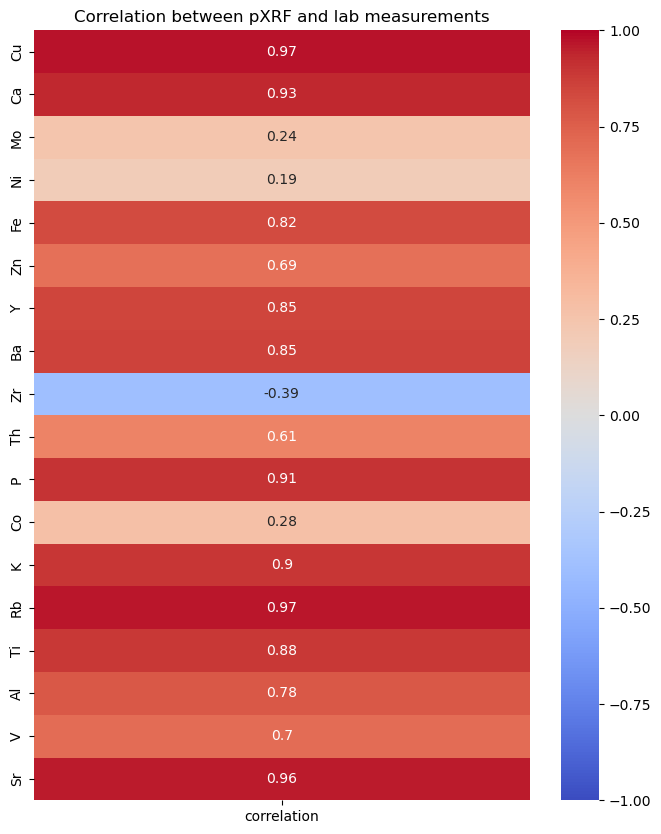

In [85]:
# List of elements
elements = ['Cu', 'Ca', 'Mo', 'Ni', 'Fe', 'Zn', 'Y', 'Ba', 'Zr', 'Th', 'P', 'Co','K', 'Rb', 'Ti', 'Al', 'V', 'Sr']

# Creating an empty dataframe for correlations
correlation_matrix = pd.DataFrame(np.nan, index=elements, columns=['correlation'])

# Calculating correlations
for element in elements:
    pXRF_col_name = f"{element}_pXRF"
    lab_col_name = f"{element}_lab"
    
    # Check if columns are in the merged_df
    if pXRF_col_name in merged_df.columns and lab_col_name in merged_df.columns:
        correlation_matrix.at[element, 'correlation'] = merged_df[pXRF_col_name].corr(merged_df[lab_col_name])

# Plotting the heatmap
plt.figure(figsize=(8, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation between pXRF and lab measurements")
plt.show()

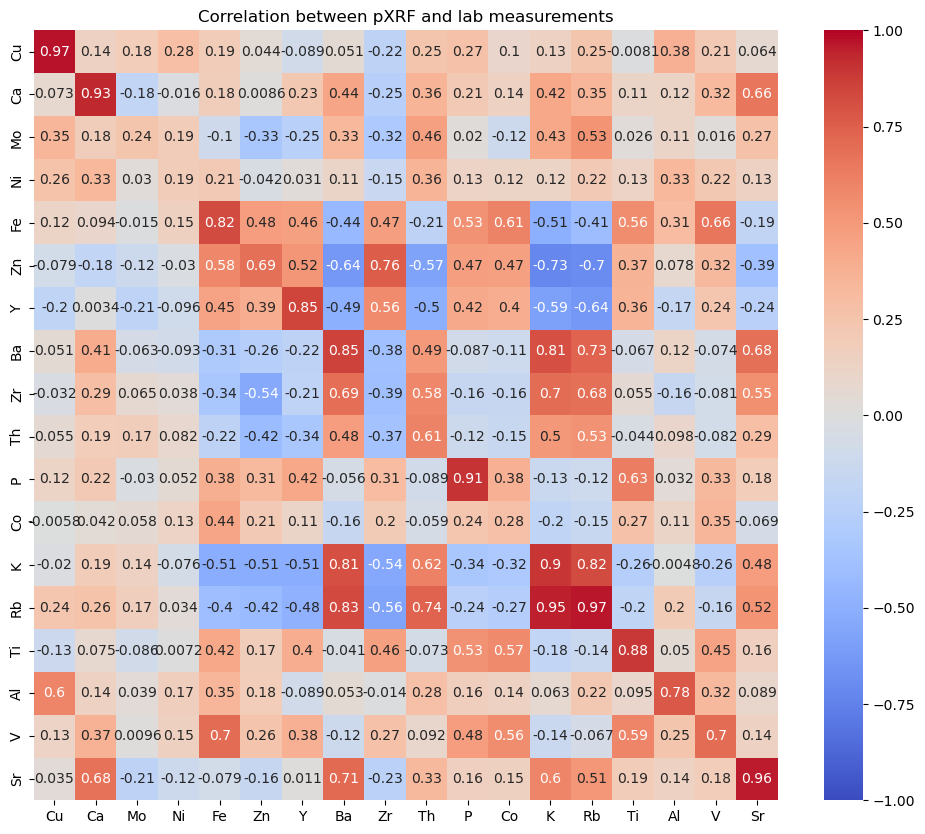

In [86]:
# List of elements
elements = ['Cu', 'Ca', 'Mo', 'Ni', 'Fe', 'Zn', 'Y', 'Ba', 'Zr', 'Th', 'P', 'Co','K', 'Rb', 'Ti', 'Al', 'V', 'Sr']

# Creating an empty dataframe for correlations
correlation_matrix = pd.DataFrame(np.nan, index=elements, columns=elements)

# Calculating correlations
for element1 in elements:
    for element2 in elements:
        pXRF_col_name_1 = f"{element1}_pXRF"
        lab_col_name_2 = f"{element2}_lab"
        
        # Check if columns are in the merged_df
        if pXRF_col_name_1 in merged_df.columns and lab_col_name_2 in merged_df.columns:
            correlation_matrix.at[element1, element2] = merged_df[pXRF_col_name_1].corr(merged_df[lab_col_name_2])

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation between pXRF and lab measurements")
plt.show()

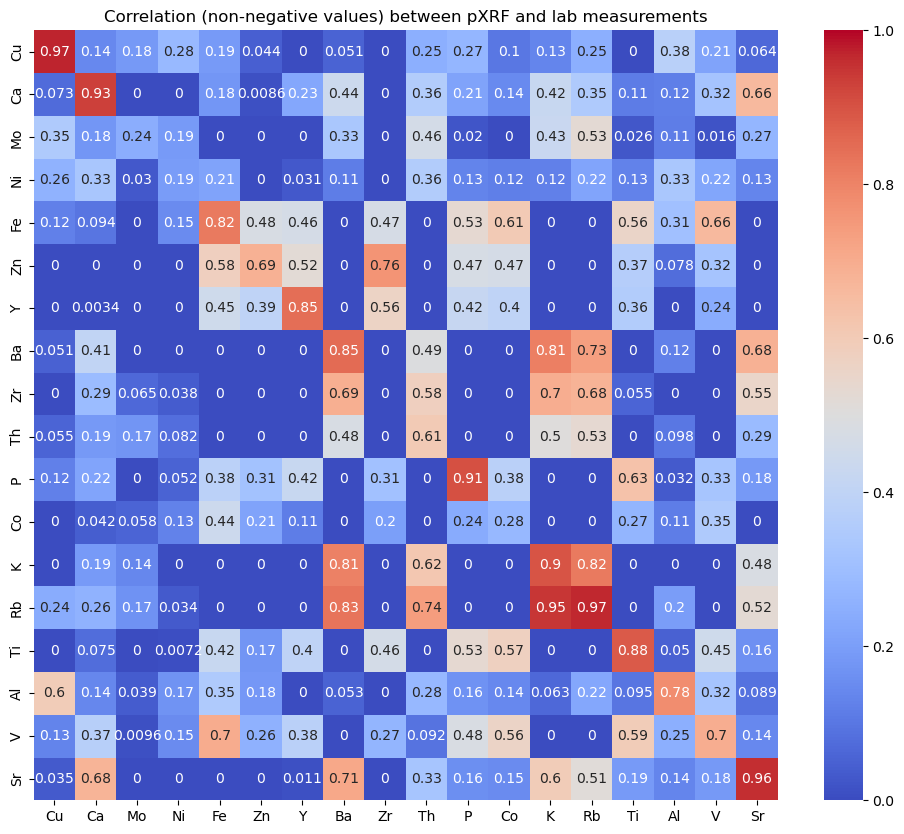

In [87]:
# Set negative values to 0
correlation_matrix[correlation_matrix < 0] = 0

# Plotting the heatmap with the updated matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Correlation (non-negative values) between pXRF and lab measurements")
plt.show()

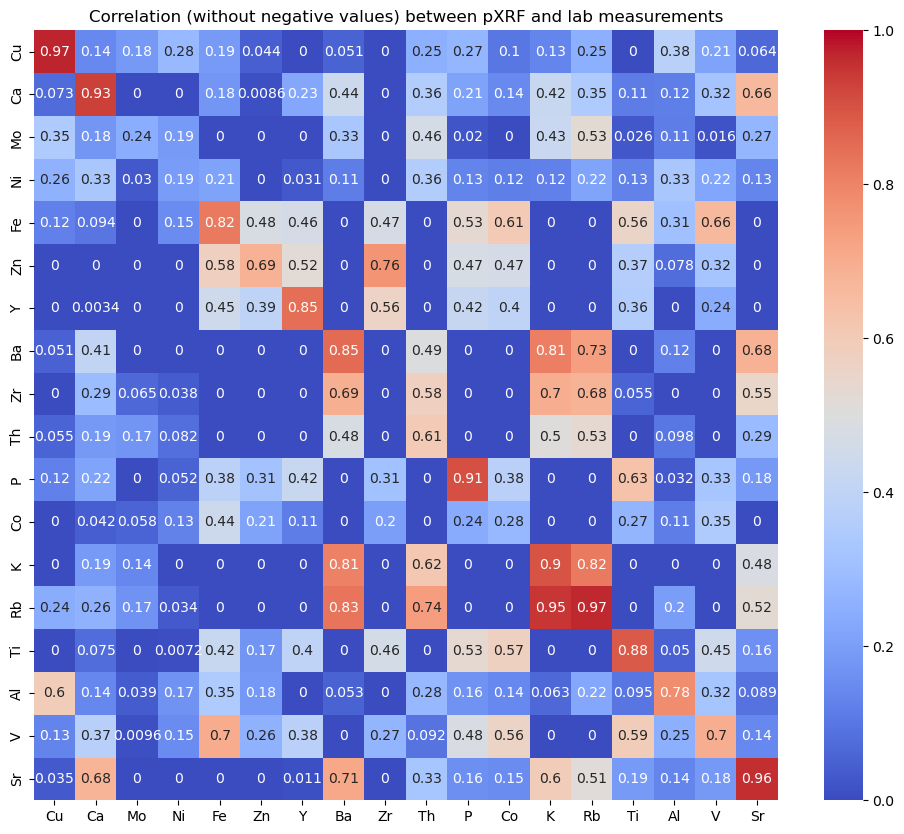

In [88]:
# Set negative values to NaN
correlation_matrix[correlation_matrix < 0] = np.nan

# Plotting the heatmap with the updated matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Correlation (without negative values) between pXRF and lab measurements")
plt.show()

In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrames (replace with your actual DataFrames)
# df_pXRF_v1 = df_pXRF.iloc[:, 8:49]
# df_lab_v1 = df_lab.iloc[:, 11:81]

# List of elements
elements = ['Cu', 'Ca', 'Mo', 'Ni', 'Fe', 'Zn', 'Y', 'Ba', 'Zr', 'Th', 'P', 'Co','K', 'Rb', 'Ti', 'Al', 'V', 'Sr']

# Creating an empty dataframe for correlations
correlation_matrix = pd.DataFrame(np.nan, index=elements, columns=elements)

In [90]:
# Calculating correlations
for element1 in elements:
    for element2 in elements:
        correlation_matrix.at[element1, element2] = df_pXRF[element1].corr(df_lab[element2])

In [91]:
# print(df_lab_v1[element2])

In [92]:
correlation_matrix

Cu        Ca        Mo        Ni        Fe        Zn         Y  \
Cu  0.971018  0.141003  0.184606  0.283217  0.189622  0.043750 -0.089346   
Ca  0.073053  0.930697 -0.183053 -0.016079  0.178627  0.008554  0.226261   
Mo  0.349515  0.177244  0.244932  0.187781 -0.103799 -0.334150 -0.248377   
Ni  0.258986  0.328911  0.030414  0.192682  0.211826 -0.042073  0.031171   
Fe  0.124599  0.093997 -0.014871  0.149964  0.823530  0.476759  0.464926   
Zn -0.079310 -0.182177 -0.119024 -0.029597  0.579785  0.687429  0.520116   
Y  -0.198202  0.003384 -0.209292 -0.095864  0.447671  0.394594  0.847435   
Ba  0.050757  0.405015 -0.062947 -0.093171 -0.312299 -0.262477 -0.218110   
Zr -0.031936  0.292764  0.064513  0.038096 -0.337064 -0.536810 -0.208172   
Th  0.055310  0.185664  0.172540  0.082030 -0.218517 -0.421404 -0.336756   
P   0.123280  0.218619 -0.030148  0.051974  0.384625  0.314990  0.423869   
Co -0.005818  0.041576  0.057929  0.127239  0.438068  0.212329  0.113545   
K  -0.020163  0.187635  0.138728 -0.076423 -0.512121 -0.507837 -0.511698   
Rb  0.238282  0.261560  0.167385  0.033621 -0.404593 -0.423870 -0.483834   
Ti -0.128866  0.075055 -0.086132  0.007236  0.424017  0.174586  0.395400   
Al  0.595532  0.138405  0.038695  0.169635  0.349056  0.179777 -0.088579   
V   0.132523  0.373134  0.009607  0.150975  0.701590  0.255444  0.381062   
Sr  0.034679  0.679663 -0.214639 -0.123220 -0.078547 -0.158570  0.010517   

          Ba        Zr        Th         P        Co         K        Rb  \
Cu  0.051462 -0.215036  0.246752  0.269829  0.100735  0.134945  0.248887   
Ca  0.438535 -0.252242  0.359347  0.213686  0.144788  0.424608  0.348892   
Mo  0.334648 -0.319500  0.463725  0.020099 -0.121280  0.428287  0.525739   
Ni  0.114717 -0.148159  0.356138  0.132400  0.119130  0.121709  0.215903   
Fe -0.435889  0.471619 -0.211900  0.533798  0.605079 -0.507409 -0.411593   
Zn -0.637364  0.763187 -0.573794  0.472875  0.468179 -0.725652 -0.696274   
Y  -0.494501  0.563737 -0.499325  0.421643  0.395873 -0.589115 -0.635590   
Ba  0.853263 -0.384252  0.492923 -0.086899 -0.114834  0.812385  0.734471   
Zr  0.692505 -0.394012  0.581327 -0.158751 -0.159734  0.698676  0.680800   
Th  0.476966 -0.374048  0.605261 -0.124762 -0.151053  0.504084  0.533177   
P  -0.055597  0.312270 -0.088860  0.906171  0.380066 -0.134589 -0.116384   
Co -0.157399  0.199377 -0.059056  0.235933  0.280940 -0.202638 -0.154903   
K   0.805028 -0.541646  0.615112 -0.340938 -0.317199  0.895072  0.821951   
Rb  0.834810 -0.563718  0.739474 -0.238742 -0.271155  0.948475  0.967020   
Ti -0.040619  0.464197 -0.073000  0.534217  0.574236 -0.182100 -0.139290   
Al  0.052502 -0.014300  0.277732  0.164457  0.140835  0.062515  0.222848   
V  -0.117799  0.268827  0.091675  0.482858  0.558934 -0.135430 -0.067263   
Sr  0.714424 -0.229453  0.326884  0.157367  0.151610  0.595169  0.514787   

          Ti        Al         V        Sr  
Cu -0.008115  0.377305  0.213533  0.064408  
Ca  0.110888  0.117363  0.317988  0.661366  
Mo  0.026001  0.114785  0.015672  0.272920  
Ni  0.126451  0.332895  0.220440  0.133101  
Fe  0.555468  0.307286  0.663654 -0.187509  
Zn  0.366520  0.077795  0.323411 -0.386985  
Y   0.357406 -0.170207  0.239020 -0.241144  
Ba -0.067224  0.124716 -0.074406  0.683901  
Zr  0.055354 -0.157716 -0.080670  0.551399  
Th -0.043885  0.098131 -0.081602  0.288126  
P   0.631169  0.031795  0.326697  0.184697  
Co  0.266548  0.113791  0.351119 -0.069117  
K  -0.258698 -0.004815 -0.257017  0.483331  
Rb -0.196889  0.195329 -0.157409  0.524257  
Ti  0.884658  0.049984  0.447779  0.160247  
Al  0.095032  0.778918  0.322493  0.089482  
V   0.594994  0.249260  0.696984  0.143911  
Sr  0.189429  0.135431  0.184685  0.959086

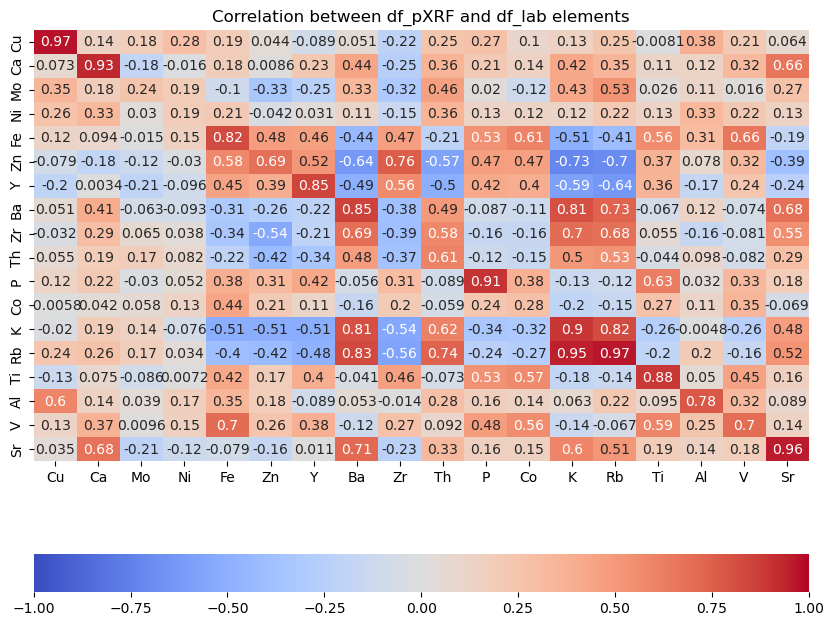

In [93]:
# Plotting the heatmap with color bar at the bottom
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
            cbar_kws={'location': 'bottom'})
plt.title("Correlation between df_pXRF and df_lab elements")
plt.show()

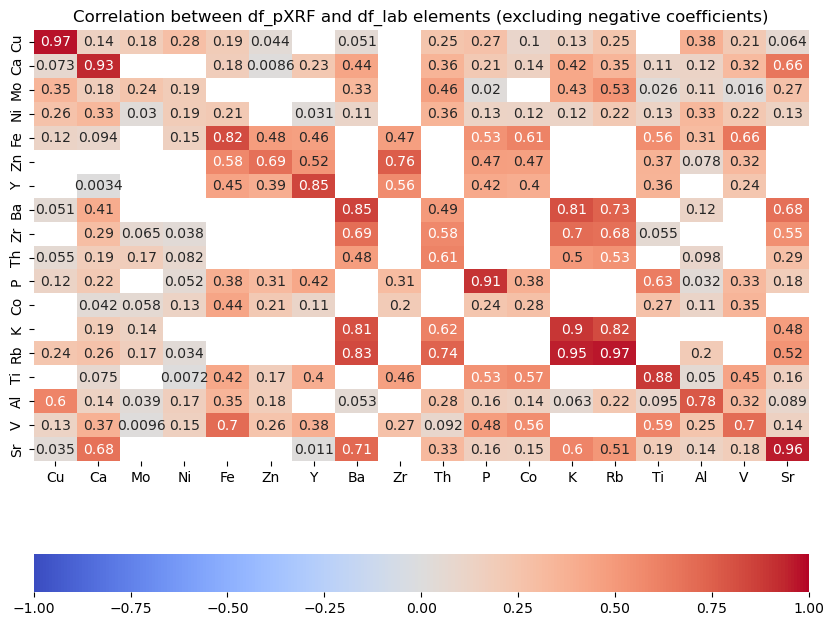

In [94]:
# List of elements
elements = ['Cu', 'Ca', 'Mo', 'Ni', 'Fe', 'Zn', 'Y', 'Ba', 'Zr', 'Th', 'P', 'Co','K', 'Rb', 'Ti', 'Al', 'V', 'Sr']

# Creating an empty dataframe for correlations
correlation_matrix = pd.DataFrame(np.nan, index=elements, columns=elements)

# Calculating correlations
for element1 in elements:
    for element2 in elements:
        corr_value = df_pXRF[element1].corr(df_lab[element2])
        # Only store the correlation value if it's positive
        if corr_value >= 0:
            correlation_matrix.at[element1, element2] = corr_value

# Plotting the heatmap with color bar at the bottom
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
            cbar_kws={'location': 'bottom'})
plt.title("Correlation between df_pXRF and df_lab elements (excluding negative coefficients)")
plt.show()

In [95]:
# # Assuming df is your dataframe with all the necessary columns
# X = df_pXRF[['Cu', 'Fe', 'K', 'Ni', 'P', 'Zn']]
# X = sm.add_constant(X)  # adding a constant for the intercept
# y = df_lab['Cu']

# # X = X.replace([np.inf, -np.inf], np.nan)  # Replace infinite values with NaN
# # X.dropna(inplace=True)  # Drop rows with NaN values
# y = y.loc[X.index]

# model = sm.OLS(y, X).fit()
# print(model.summary())

In [96]:
# # X = X.replace([np.inf, -np.inf], np.nan)  # Replace infinite values with NaN
# # X.dropna(inplace=True)  # Drop rows with NaN values
# y = y.loc[X.index]

In [97]:
# def stepwise_selection(X, y, 
#                        initial_list=[], 
#                        threshold_in=0.01, 
#                        threshold_out = 0.05, 
#                        verbose=True):
#     """ Perform a forward-backward feature selection 
#     based on p-value from statsmodels.api.OLS
#     Arguments:
#         X - pandas.DataFrame with candidate features
#         y - list-like with the target
#         initial_list - list of features to start with (column names of X)
#         threshold_in - include a feature if its p-value < threshold_in
#         threshold_out - exclude a feature if its p-value > threshold_out
#         verbose - whether to print the sequence of inclusions and exclusions
#     Returns: list of selected features 
#     Always set threshold_in < threshold_out to avoid infinite looping.
#     """
#     included = list(initial_list)
#     while True:
#         changed=False
#         # forward step
#         excluded = list(set(X.columns)-set(included))
#         new_pval = pd.Series(index=excluded)
#         for new_column in excluded:
#             model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
#             new_pval[new_column] = model.pvalues[new_column]
#         best_pval = new_pval.min()
#         if best_pval < threshold_in:
#             best_feature = new_pval.idxmin()
#             included.append(best_feature)
#             changed=True
#             if verbose:
#                 print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

#         # backward step
#         model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
#         # use all coefs except intercept
#         pvalues = model.pvalues.iloc[1:]
#         worst_pval = pvalues.max() # null if pvalues is empty
#         if worst_pval > threshold_out:
#             changed=True
#             worst_feature = pvalues.idxmax()
#             included.remove(worst_feature)
#             if verbose:
#                 print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
#         if not changed:
#             break
#     return included

In [98]:
# X = df_pXRF[['Cu', 'Fe', 'K', 'Ni', 'P', 'Zn']]

In [99]:
# # Ensure that both X and y have the same index
# combined = X.join(y, how='inner')

In [100]:
# # Split the combined dataframe back into X and y
# X = combined[X.columns]
# y = combined['Cu']

# # Now proceed with the stepwise regression
# result = stepwise_selection(X, y)
# print('resulting features:')
# print(result)

In [101]:
# # Ensure that both X and y have the same index
# combined = X.join(y, rsuffix='_lab')

# # Now, split the combined dataframe back into X and y
# X = combined.drop(columns='Cu_lab')  # Drop the redundant 'Cu' column from the lab dataset
# y = combined['Cu_lab']

# # Now proceed with the stepwise regression
# result = stepwise_selection(X, y)
# print('resulting features:')
# print(result)

In [102]:
# # Merge dataframes on the "Point" column
# combined = pd.merge(df_pXRF, df_lab, on='Point', suffixes=('_pXRF', '_lab'))

# # Impute NaN values with the median of each numeric column
# for col in combined.select_dtypes(include=['float64', 'int64']).columns:
#     combined[col].fillna(combined[col].median(), inplace=True)

# # Replace inf values with NaN and then drop or impute
# combined.replace([np.inf, -np.inf], np.nan, inplace=True)
# combined.dropna(inplace=True)  # or you can impute again if needed

# # Extract X and y from the cleaned combined dataframe
# X = combined.drop(columns='Cu_lab')
# y = combined['Cu_lab']

# # Continue with the stepwise regression
# result = stepwise_selection(X, y)
# print('resulting features:')
# print(result)

1. Initially, no predictors are in the model.
2. In each forward step, we add the predictor that results in the lowest residual sum of squares (or another metric of your choice) to the model.
3. After adding each new variable, we'll also check if any predictors can be removed without significantly hurting the model's performance.
4. We continue this process until no predictors can be added or removed from the model.

In [103]:
elements = ['Cu', 'Ca', 'Mo', 'Ni', 'Fe', 'Zn', 'Y', 'Ba', 'Zr', 'Th', 'P', 'Co','K', 'Rb', 'Ti', 'Al', 'V', 'Sr']


X = merged_df[[f"{element}_pXRF" for element in elements]]
y = merged_df['Cu_lab']  # 'Cu' from the lab dataset is what I want to predict.


def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

# 1. Remove Infinite Values
X = X.replace([np.inf, -np.inf], np.nan)

# 2. Fill NaNs with Median (or you can drop them), perform imputation with median (which is insensitive to outliers)
for col in X.columns:
    X[col].fillna(X[col].median(), inplace=True)

# Now proceed with your regression
result = stepwise_selection(X, y)

print('Resulting features:')
print(result)

Add  Cu_pXRF                        with p-value 6.72041e-160
Add  Th_pXRF                        with p-value 0.00566308
Add  Mo_pXRF                        with p-value 0.000106343
Resulting features:
['Cu_pXRF', 'Th_pXRF', 'Mo_pXRF']


C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype exp

In [104]:
# Use the selected predictors to fit the model
X_selected = X[['Cu_pXRF', 'Th_pXRF', 'Mo_pXRF']]
X_selected = sm.add_constant(X_selected)
model = sm.OLS(y, X_selected).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Cu_lab   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     1525.
Date:                Fri, 17 Nov 2023   Prob (F-statistic):          3.34e-161
Time:                        10:40:11   Log-Likelihood:                -1132.9
No. Observations:                 256   AIC:                             2274.
Df Residuals:                     252   BIC:                             2288.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8796      2.892      0.650      0.5

In [105]:
# Use the selected predictors to fit the model
X_selected = X[['Cu_pXRF', 'Th_pXRF', 'Mo_pXRF']]
X_selected = sm.add_constant(X_selected)
model = sm.OLS(y, X_selected).fit()

# Extracting the coefficients
intercept = model.params['const']
coefficients = model.params.drop('const')

# Constructing the formula
formula = f"Cu_lab = {intercept:.3f}"
for variable, coefficient in coefficients.items():
    formula += f" + {coefficient:.3f}({variable})"
    
print(formula)

Cu_lab = 1.880 + 0.865(Cu_pXRF) + -0.602(Th_pXRF) + 1.916(Mo_pXRF)


In [106]:
# # List of elements
# elements = ['Cu', 'Ca', 'Mo', 'Ni', 'Fe', 'Zn', 'Y', 'Ba', 'Zr', 'Th', 'P', 'Co', 'K', 'Rb', 'Ti', 'Al', 'V', 'Sr']

# # Placeholder to store results
# results = {}

# for target_element in elements:
    
#     print(f"\nPerforming Stepwise Regression for {target_element}_lab...\n")
    
#     #predictors = [f"{element}_lab" for element in elements if element != target_element]
#     predictors = [f"{element}_lab" for element in elements]
    
#     X = merged_df[predictors].copy()
#     y = merged_df[f"{target_element}_lab"].copy()
    
#     # Remove any rows where y is NaN
#     mask = ~np.isnan(y)
#     X = X[mask]
#     y = y[mask]
    
#     # Get resulting features using stepwise regression
#     resulting_features = stepwise_selection(X, y)
#     results[target_element] = resulting_features

#     # Print the resulting features for the current element
#     print(f'Resulting features for predicting {target_element}_lab:')
#     print(resulting_features)

#     # Fit the final model and print the formula
#     final_model = sm.OLS(y, sm.add_constant(X[resulting_features])).fit()
#     print("\nModel Summary for predicting", target_element)
#     print(final_model.summary())
    
#     # Construct and print the regression formula
#     coefficients = final_model.params
#     formula_terms = [f"{coefficients[i]:.4f}*{resulting_features[i-1]}" for i in range(1, len(coefficients))]
#     regression_formula = f"{target_element}_lab = {coefficients[0]:.4f} + " + " + ".join(formula_terms)
#     print("\nRegression formula for", target_element)
#     print(regression_formula)

# print("\n\nFinal Results:")
# print(results)

In [107]:
# # List of elements
# elements = ['Cu', 'Ca', 'Mo', 'Ni', 'Fe', 'Zn', 'Y', 'Ba', 'Zr', 'Th', 'P', 'Co', 'K', 'Rb', 'Ti', 'Al', 'V', 'Sr']

# # Placeholder to store results
# results = {}

# for target_element in elements:
    
#     print(f"\nPerforming Stepwise Regression for {target_element}_lab...\n")
    
#     predictors = [f"{element}_lab" for element in elements if element != target_element]
#     #predictors = [f"{element}_lab" for element in elements]
    
#     X = merged_df[predictors].copy()
#     y = merged_df[f"{target_element}_lab"].copy()
    
#     # Remove any rows where y is NaN
#     mask = ~np.isnan(y)
#     X = X[mask]
#     y = y[mask]
    
#     # Get resulting features using stepwise regression
#     resulting_features = stepwise_selection(X, y)
#     results[target_element] = resulting_features

#     # Print the resulting features for the current element
#     print(f'Resulting features for predicting {target_element}_lab:')
#     print(resulting_features)

#     # Fit the final model and print the formula
#     final_model = sm.OLS(y, sm.add_constant(X[resulting_features])).fit()
#     print("\nModel Summary for predicting", target_element)
#     print(final_model.summary())
    
#     # Construct and print the regression formula
#     coefficients = final_model.params
#     formula_terms = [f"{coefficients[i]:.4f}*{resulting_features[i-1]}" for i in range(1, len(coefficients))]
#     regression_formula = f"{target_element}_lab = {coefficients[0]:.4f} + " + " + ".join(formula_terms)
#     print("\nRegression formula for", target_element)
#     print(regression_formula)

# print("\n\nFinal Results:")
# print(results)

In [108]:
# def preprocess_data(X, y):
#     """
#     Preprocess data:
#     - Fill NaN values with median of the column
#     - Drop rows containing inf or -inf in X
#     """
#     # Fill NaN with median
#     X.fillna(X.median(), inplace=True)
#     y.fillna(y.median(), inplace=True)
    
#     # Drop inf values
#     mask = ~X.isin([np.inf, -np.inf]).any(1)
#     X = X[mask]
#     y = y[mask]
    
#     return X, y

# # Now apply this preprocessing before calling the stepwise_selection function
# X, y = preprocess_data(X, y)
# resulting_features = stepwise_selection(X, y)


In [109]:
# # 1. Data Preprocessing Function
# def preprocess_data(X, y):
#     """
#     Preprocess data:
#     - Fill NaN values with median of the column
#     - Drop rows containing inf or -inf in X
#     """
#     # Fill NaN with median
#     X.fillna(X.median(), inplace=True)
#     y.fillna(y.median(), inplace=True)
    
#     # Drop inf values
#     mask = ~X.isin([np.inf, -np.inf]).any(1)
#     X = X[mask]
#     y = y[mask]
    
#     return X, y

# # 2. Stepwise Regression Function
#     #... (as provided previously) ...

# # 3. Main Loop
# elements = ['Cu', 'Ca', 'Mo', 'Ni', 'Fe', 'Zn', 'Y', 'Ba', 'Zr', 'Th', 'P', 'Co','K', 'Rb', 'Ti', 'Al', 'V', 'Sr']

# for target_element in elements:
#     # Predictors (all elements in pXRF format except for the current target_element in lab format)
#     predictors = [f"{element}_pXRF" for element in elements]
    
#     X = merged_df[predictors]
#     y = merged_df[f"{target_element}_lab"]

#     # Preprocess the data
#     X, y = preprocess_data(X, y)

#     # Conduct stepwise regression
#     resulting_features = stepwise_selection(X, y)

#     # Fitting the model with resulting features
#     X_optimal = sm.add_constant(merged_df[resulting_features])
#     model = sm.OLS(y, X_optimal).fit()

#     # Print the formula
#     formula = f"{target_element}_lab = {model.params[0]:.4f}"
#     for i, feature in enumerate(resulting_features):
#         formula += f" + {model.params[i+1]:.4f}*{feature}"
#     print(formula)

In [110]:
# # 1. Data Preprocessing Function
# def preprocess_data(X, y):
#     """
#     Preprocess data:
#     - Fill NaN values with median of the column
#     - Drop rows containing inf or -inf in X
#     """
#     # Fill NaN with median
#     X.fillna(X.median(), inplace=True)
#     y.fillna(y.median(), inplace=True)
    
#     # Drop inf values
#     mask = ~X.isin([np.inf, -np.inf]).any(1)
#     X = X[mask]
#     y = y[mask]
    
#     return X, y

# # 2. Stepwise Regression Function
# #def stepwise_selection(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05, verbose=False):
#     #... (as provided previously) ...

# # 3. Main Loop
# elements = ['Cu', 'Ca', 'Mo', 'Ni', 'Fe', 'Zn', 'Y', 'Ba', 'Zr', 'Th', 'P', 'Co','K', 'Rb', 'Ti', 'Al', 'V', 'Sr']

# for target_element in elements:
#     # Predictors (all elements in pXRF format)
#     predictors = [f"{element}_pXRF" for element in elements]
    
#     X = merged_df[predictors]
#     y = merged_df[f"{target_element}_lab"]

#     # Preprocess the data
#     X, y = preprocess_data(X, y)

#     # Conduct stepwise regression
#     resulting_features = stepwise_selection(X, y)

#     # Fitting the model with resulting features
#     X_optimal = sm.add_constant(merged_df[resulting_features])
#     model = sm.OLS(y, X_optimal).fit()

#     # Print the formula
#     formula = f"{target_element}_lab = {model.params[0]:.4f}"
#     for i, feature in enumerate(resulting_features):
#         formula += f" + {model.params[i+1]:.4f}*{feature}"
#     print(formula)

In [111]:
# 1. Enhanced Data Preprocessing Function
def preprocess_data(X, y):
    """
    Preprocess data:
    - Fill NaN values with median of the column
    - Drop rows containing inf or -inf in X
    """
    # Fill NaN with median
    X.fillna(X.median(), inplace=True)
    y.fillna(y.median(), inplace=True)
    
    # Drop non-finite values
    mask = np.isfinite(X).all(1) & np.isfinite(y)
    X = X[mask]
    y = y[mask]
    
    return X, y

# 2. Stepwise Regression Function
#def stepwise_selection(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05, verbose=False):
    #... (as provided previously) ...

# 3. Main Loop
elements = ['Cu', 'Ca', 'Mo', 'Ni', 'Fe', 'Zn', 'Y', 'Ba', 'Zr', 'Th', 'P', 'Co','K', 'Rb', 'Ti', 'Al', 'V', 'Sr']

for target_element in elements:
    # Predictors (all elements in pXRF format)
    predictors = [f"{element}_pXRF" for element in elements]
    
    X = merged_df[predictors]
    y = merged_df[f"{target_element}_lab"]

    # Preprocess the data
    X, y = preprocess_data(X, y)

    # Diagnostic Print Statement
    if not (np.isfinite(X).all().all() and np.isfinite(y).all()):
        print(f"Non-finite values found when predicting {target_element}_lab!")
        continue

    # Conduct stepwise regression
    resulting_features = stepwise_selection(X, y)

    # Fitting the model with resulting features
    X_optimal = sm.add_constant(X[resulting_features])
    model = sm.OLS(y, X_optimal).fit()

    # Print the formula
    formula = f"{target_element}_lab = {model.params[0]:.4f}"
    for i, feature in enumerate(resulting_features):
        formula += f" + {model.params[i+1]:.4f}*{feature}"
    print(formula)

Add  Cu_pXRF                        with p-value 6.72041e-160
Add  Th_pXRF                        with p-value 0.00566308
Add  Mo_pXRF                        with p-value 0.000106343
Cu_lab = 1.8796 + 0.8649*Cu_pXRF + -0.6019*Th_pXRF + 1.9162*Mo_pXRF


C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\384154963.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\384154963.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\384154963.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

Add  Ca_pXRF                        with p-value 6.18221e-113
Add  K_pXRF                         with p-value 1.04723e-08


C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype exp

Add  Y_pXRF                         with p-value 2.06217e-10
Add  Sr_pXRF                        with p-value 8.51575e-08
Add  Ti_pXRF                        with p-value 0.00289518
Add  Rb_pXRF                        with p-value 0.000828836
Ca_lab = 2124.4513 + 0.9236*Ca_pXRF + -0.1690*K_pXRF + -31.0214*Y_pXRF + 4.6740*Sr_pXRF + -0.1847*Ti_pXRF + 13.8495*Rb_pXRF
Add  Mo_pXRF                        with p-value 7.48819e-05
Add  Sr_pXRF                        with p-value 3.9881e-06
Add  K_pXRF                         with p-value 0.000316505
Mo_lab = 3.3098 + 0.3095*Mo_pXRF + -0.0121*Sr_pXRF + 0.0001*K_pXRF
Add  Cu_pXRF                        with p-value 4.14639e-06


C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\384154963.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\384154963.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\384154963.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

Ni_lab = 24.6017 + 0.0575*Cu_pXRF
Add  Fe_pXRF                        with p-value 1.76083e-64
Add  K_pXRF                         with p-value 5.88816e-06
Add  Sr_pXRF                        with p-value 2.05955e-09
Add  Rb_pXRF                        with p-value 0.000235825
Add  V_pXRF                         with p-value 0.00245373


C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\384154963.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\384154963.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\384154963.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

Fe_lab = 11791.5298 + 0.6479*Fe_pXRF + -0.7408*K_pXRF + 14.7015*Sr_pXRF + 67.6497*Rb_pXRF + 35.4201*V_pXRF
Add  Zn_pXRF                        with p-value 3.76784e-37
Add  Ba_pXRF                        with p-value 0.000855224
Add  Zr_pXRF                        with p-value 6.88253e-07
Add  K_pXRF                         with p-value 0.000134404
Add  Rb_pXRF                        with p-value 4.89871e-06


C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\384154963.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\384154963.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\384154963.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

Add  Ca_pXRF                        with p-value 0.00397447
Add  Y_pXRF                         with p-value 0.00650367
Zn_lab = 22.3408 + 1.1708*Zn_pXRF + 0.0639*Ba_pXRF + -0.0950*Zr_pXRF + -0.0025*K_pXRF + 0.3348*Rb_pXRF + 0.0018*Ca_pXRF + -0.8481*Y_pXRF
Add  Y_pXRF                         with p-value 8.38474e-72
Add  Sr_pXRF                        with p-value 3.08404e-15
Add  K_pXRF                         with p-value 8.03415e-08


C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\384154963.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\384154963.py:9: Setting

Add  Rb_pXRF                        with p-value 1.05877e-10
Add  Zr_pXRF                        with p-value 0.000506941
Y_lab = 1.5510 + 0.5759*Y_pXRF + 0.0091*Sr_pXRF + -0.0003*K_pXRF + 0.0450*Rb_pXRF + 0.0055*Zr_pXRF
Add  Ba_pXRF                        with p-value 8.8285e-74
Add  Rb_pXRF                        with p-value 2.42786e-23
Add  Sr_pXRF                        with p-value 1.78671e-13


C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\384154963.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\384154963.py:9: Setting

Add  Al_pXRF                        with p-value 3.74519e-05
Add  Th_pXRF                        with p-value 0.00565548
Add  Ca_pXRF                        with p-value 0.000944404
Ba_lab = 137.9901 + 0.3779*Ba_pXRF + 1.7780*Rb_pXRF + 0.3741*Sr_pXRF + -0.0019*Al_pXRF + 1.4985*Th_pXRF + -0.0052*Ca_pXRF
Add  Zn_pXRF                        with p-value 4.4126e-50
Add  Ti_pXRF                        with p-value 1.91505e-09


C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\384154963.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

Add  Fe_pXRF                        with p-value 9.57609e-07
Add  Ca_pXRF                        with p-value 0.00180773
Add  Al_pXRF                        with p-value 0.00563536
Add  Cu_pXRF                        with p-value 0.00126435
Zr_lab = -31.2968 + 1.0176*Zn_pXRF + 0.0075*Ti_pXRF + -0.0008*Fe_pXRF + -0.0009*Ca_pXRF + 0.0005*Al_pXRF + -0.0332*Cu_pXRF
Add  Rb_pXRF                        with p-value 1.49598e-45


C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype exp

Add  Th_pXRF                        with p-value 1.89395e-08
Add  K_pXRF                         with p-value 0.000142331
Add  Ni_pXRF                        with p-value 0.00458224
Th_lab = -0.2994 + 0.1353*Rb_pXRF + 0.1719*Th_pXRF + -0.0002*K_pXRF + 0.0489*Ni_pXRF
Add  P_pXRF                         with p-value 7.94684e-64
Add  K_pXRF                         with p-value 2.60009e-10


C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\384154963.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

Add  Sr_pXRF                        with p-value 5.23311e-08
Add  Cu_pXRF                        with p-value 1.55104e-08
Add  Zn_pXRF                        with p-value 3.35833e-09
Add  Rb_pXRF                        with p-value 0.00119604
P_lab = -65.8425 + 0.9071*P_pXRF + -0.0117*K_pXRF + 0.4201*Sr_pXRF + 0.3322*Cu_pXRF + 2.9747*Zn_pXRF + 1.5157*Rb_pXRF
Add  Fe_pXRF                        with p-value 5.87831e-27


C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype exp

Add  Ti_pXRF                        with p-value 5.2272e-11
Add  Sr_pXRF                        with p-value 6.41558e-06
Add  K_pXRF                         with p-value 1.72397e-05
Co_lab = -0.2128 + 0.0002*Fe_pXRF + 0.0009*Ti_pXRF + 0.0113*Sr_pXRF + -0.0001*K_pXRF
Add  Rb_pXRF                        with p-value 8.69591e-129
Add  Ba_pXRF                        with p-value 4.50413e-17


C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\384154963.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

Add  Al_pXRF                        with p-value 2.53332e-14
Add  Ti_pXRF                        with p-value 4.97062e-06
Add  Sr_pXRF                        with p-value 1.60068e-07
Add  K_pXRF                         with p-value 6.47832e-05
Add  Co_pXRF                        with p-value 1.21657e-05
Add  Y_pXRF                         with p-value 1.55901e-06


C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype exp

Add  V_pXRF                         with p-value 0.000310746
Add  Ni_pXRF                        with p-value 0.00118995
Add  Zn_pXRF                        with p-value 0.00124907
Add  Ca_pXRF                        with p-value 0.00827353
K_lab = 3941.5321 + 145.7686*Rb_pXRF + 5.6701*Ba_pXRF + -0.0386*Al_pXRF + -0.5089*Ti_pXRF + 3.5300*Sr_pXRF + 0.2594*K_pXRF + -13.4298*Co_pXRF + 100.6780*Y_pXRF + 9.5380*V_pXRF + -41.3381*Ni_pXRF + -25.6688*Zn_pXRF + 0.1452*Ca_pXRF
Add  Rb_pXRF                        with p-value 7.01014e-153


C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype exp

Add  Mo_pXRF                        with p-value 2.63197e-05
Rb_lab = 0.7369 + 0.9394*Rb_pXRF + 0.8294*Mo_pXRF
Add  Ti_pXRF                        with p-value 3.79028e-86
Add  Fe_pXRF                        with p-value 3.22433e-06
Add  P_pXRF                         with p-value 0.000166834
Add  Sr_pXRF                        with p-value 0.00113439


C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\384154963.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\384154963.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

Add  K_pXRF                         with p-value 3.74156e-06
Add  Ca_pXRF                        with p-value 8.14417e-05
Add  Rb_pXRF                        with p-value 0.00979118
Ti_lab = 142.0744 + 0.6517*Ti_pXRF + 0.0209*Fe_pXRF + 0.8698*P_pXRF + 2.4387*Sr_pXRF + -0.0402*K_pXRF + -0.0573*Ca_pXRF + 4.7330*Rb_pXRF
Add  Al_pXRF                        with p-value 8.9379e-48
Al_lab = -4786.3145 + 1.2569*Al_pXRF


C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\384154963.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

Add  V_pXRF                         with p-value 1.47694e-38
Add  Fe_pXRF                        with p-value 3.25091e-06
Add  Sr_pXRF                        with p-value 4.45527e-08
Add  K_pXRF                         with p-value 0.000302865
Add  Y_pXRF                         with p-value 0.000444116
V_lab = 24.2630 + 0.2562*V_pXRF + 0.0022*Fe_pXRF + 0.1249*Sr_pXRF + -0.0017*K_pXRF + -1.2562*Y_pXRF


C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype exp

Add  Sr_pXRF                        with p-value 3.28004e-141
Add  Mo_pXRF                        with p-value 0.000379625
Sr_lab = -7.7323 + 0.9419*Sr_pXRF + 2.5624*Mo_pXRF


C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


In [112]:
# 1. Enhanced Data Preprocessing Function
def preprocess_data(X, y):
    """
    Preprocess data:
    - Fill NaN values with median of the column
    - Drop rows containing inf or -inf in X
    """
    # Fill NaN with median
    X.fillna(X.median(), inplace=True)
    y.fillna(y.median(), inplace=True)
    
    # Drop non-finite values
    mask = np.isfinite(X).all(1) & np.isfinite(y)
    X = X[mask]
    y = y[mask]
    
    return X, y

# ... Assuming the rest of your code is complete ...

# 3. Main Loop
elements = ['Cu', 'Ca', 'Mo', 'Ni', 'Fe', 'Zn', 'Y', 'Ba', 'Zr', 'Th', 'P', 'Co','K', 'Rb', 'Ti', 'Al', 'V', 'Sr']

for target_element in elements:
    # Predictors (all elements in pXRF format)
    predictors = [f"{element}_pXRF" for element in elements]
    
    X = merged_df[predictors]
    y = merged_df[f"{target_element}_lab"]

    # Preprocess the data
    X, y = preprocess_data(X, y)

    # Diagnostic Print Statement
    if not (np.isfinite(X).all().all() and np.isfinite(y).all()):
        print(f"Non-finite values found when predicting {target_element}_lab!")
        continue

    # Conduct stepwise regression
    resulting_features = stepwise_selection(X, y)

    # Fitting the model with resulting features
    X_optimal = sm.add_constant(X[resulting_features])
    model = sm.OLS(y, X_optimal).fit()

    # Print the formula
    formula = f"{target_element}_lab = {model.params[0]:.4f}"
    for i, feature in enumerate(resulting_features):
        formula += f" + {model.params[i+1]:.4f}*{feature}"
    print(formula)

    # Print the R-squared value
    print(f"R-squared for predicting {target_element}_lab: {model.rsquared:.4f}")


Add  Cu_pXRF                        with p-value 6.72041e-160
Add  Th_pXRF                        with p-value 0.00566308
Add  Mo_pXRF                        with p-value 0.000106343


C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\2834808778.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\2834808778.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\2834808778.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



Cu_lab = 1.8796 + 0.8649*Cu_pXRF + -0.6019*Th_pXRF + 1.9162*Mo_pXRF
R-squared for predicting Cu_lab: 0.9478
Add  Ca_pXRF                        with p-value 6.18221e-113
Add  K_pXRF                         with p-value 1.04723e-08
Add  Y_pXRF                         with p-value 2.06217e-10
Add  Sr_pXRF                        with p-value 8.51575e-08
Add  Ti_pXRF                        with p-value 0.00289518


C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype exp

Add  Rb_pXRF                        with p-value 0.000828836
Ca_lab = 2124.4513 + 0.9236*Ca_pXRF + -0.1690*K_pXRF + -31.0214*Y_pXRF + 4.6740*Sr_pXRF + -0.1847*Ti_pXRF + 13.8495*Rb_pXRF
R-squared for predicting Ca_lab: 0.9177
Add  Mo_pXRF                        with p-value 7.48819e-05
Add  Sr_pXRF                        with p-value 3.9881e-06
Add  K_pXRF                         with p-value 0.000316505
Mo_lab = 3.3098 + 0.3095*Mo_pXRF + -0.0121*Sr_pXRF + 0.0001*K_pXRF
R-squared for predicting Mo_lab: 0.1794


C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\2834808778.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\2834808778.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\2834808778.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  Cu_pXRF                        with p-value 4.14639e-06
Ni_lab = 24.6017 + 0.0575*Cu_pXRF
R-squared for predicting Ni_lab: 0.0802
Add  Fe_pXRF                        with p-value 1.76083e-64
Add  K_pXRF                         with p-value 5.88816e-06
Add  Sr_pXRF                        with p-value 2.05955e-09
Add  Rb_pXRF                        with p-value 0.000235825


C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\2834808778.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\2834808778.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\2834808778.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



Add  V_pXRF                         with p-value 0.00245373
Fe_lab = 11791.5298 + 0.6479*Fe_pXRF + -0.7408*K_pXRF + 14.7015*Sr_pXRF + 67.6497*Rb_pXRF + 35.4201*V_pXRF
R-squared for predicting Fe_lab: 0.7651
Add  Zn_pXRF                        with p-value 3.76784e-37
Add  Ba_pXRF                        with p-value 0.000855224
Add  Zr_pXRF                        with p-value 6.88253e-07
Add  K_pXRF                         with p-value 0.000134404


C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\2834808778.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\2834808778.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Add  Rb_pXRF                        with p-value 4.89871e-06
Add  Ca_pXRF                        with p-value 0.00397447
Add  Y_pXRF                         with p-value 0.00650367
Zn_lab = 22.3408 + 1.1708*Zn_pXRF + 0.0639*Ba_pXRF + -0.0950*Zr_pXRF + -0.0025*K_pXRF + 0.3348*Rb_pXRF + 0.0018*Ca_pXRF + -0.8481*Y_pXRF
R-squared for predicting Zn_lab: 0.6273
Add  Y_pXRF                         with p-value 8.38474e-72
Add  Sr_pXRF                        with p-value 3.08404e-15


C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\2834808778.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

Add  K_pXRF                         with p-value 8.03415e-08
Add  Rb_pXRF                        with p-value 1.05877e-10
Add  Zr_pXRF                        with p-value 0.000506941
Y_lab = 1.5510 + 0.5759*Y_pXRF + 0.0091*Sr_pXRF + -0.0003*K_pXRF + 0.0450*Rb_pXRF + 0.0055*Zr_pXRF
R-squared for predicting Y_lab: 0.8415
Add  Ba_pXRF                        with p-value 8.8285e-74
Add  Rb_pXRF                        with p-value 2.42786e-23


C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\2834808778.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

Add  Sr_pXRF                        with p-value 1.78671e-13
Add  Al_pXRF                        with p-value 3.74519e-05
Add  Th_pXRF                        with p-value 0.00565548
Add  Ca_pXRF                        with p-value 0.000944404
Ba_lab = 137.9901 + 0.3779*Ba_pXRF + 1.7780*Rb_pXRF + 0.3741*Sr_pXRF + -0.0019*Al_pXRF + 1.4985*Th_pXRF + -0.0052*Ca_pXRF
R-squared for predicting Ba_lab: 0.8716
Add  Zn_pXRF                        with p-value 4.4126e-50


C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype exp

Add  Ti_pXRF                        with p-value 1.91505e-09
Add  Fe_pXRF                        with p-value 9.57609e-07
Add  Ca_pXRF                        with p-value 0.00180773
Add  Al_pXRF                        with p-value 0.00563536
Add  Cu_pXRF                        with p-value 0.00126435
Zr_lab = -31.2968 + 1.0176*Zn_pXRF + 0.0075*Ti_pXRF + -0.0008*Fe_pXRF + -0.0009*Ca_pXRF + 0.0005*Al_pXRF + -0.0332*Cu_pXRF
R-squared for predicting Zr_lab: 0.7057


C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype exp

Add  Rb_pXRF                        with p-value 1.49598e-45
Add  Th_pXRF                        with p-value 1.89395e-08
Add  K_pXRF                         with p-value 0.000142331
Add  Ni_pXRF                        with p-value 0.00458224
Th_lab = -0.2994 + 0.1353*Rb_pXRF + 0.1719*Th_pXRF + -0.0002*K_pXRF + 0.0489*Ni_pXRF
R-squared for predicting Th_lab: 0.6344
Add  P_pXRF                         with p-value 7.94684e-64


C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype exp

Add  K_pXRF                         with p-value 2.60009e-10
Add  Sr_pXRF                        with p-value 5.23311e-08
Add  Cu_pXRF                        with p-value 1.55104e-08
Add  Zn_pXRF                        with p-value 3.35833e-09
Add  Rb_pXRF                        with p-value 0.00119604
P_lab = -65.8425 + 0.9071*P_pXRF + -0.0117*K_pXRF + 0.4201*Sr_pXRF + 0.3322*Cu_pXRF + 2.9747*Zn_pXRF + 1.5157*Rb_pXRF
R-squared for predicting P_lab: 0.8188


C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype exp

Add  Fe_pXRF                        with p-value 5.87831e-27
Add  Ti_pXRF                        with p-value 5.2272e-11
Add  Sr_pXRF                        with p-value 6.41558e-06
Add  K_pXRF                         with p-value 1.72397e-05
Co_lab = -0.2128 + 0.0002*Fe_pXRF + 0.0009*Ti_pXRF + 0.0113*Sr_pXRF + -0.0001*K_pXRF
R-squared for predicting Co_lab: 0.5422
Add  Rb_pXRF                        with p-value 8.69591e-129


C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype exp

Add  Ba_pXRF                        with p-value 4.50413e-17
Add  Al_pXRF                        with p-value 2.53332e-14
Add  Ti_pXRF                        with p-value 4.97062e-06
Add  Sr_pXRF                        with p-value 1.60068e-07
Add  K_pXRF                         with p-value 6.47832e-05


C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype exp

Add  Co_pXRF                        with p-value 1.21657e-05
Add  Y_pXRF                         with p-value 1.55901e-06
Add  V_pXRF                         with p-value 0.000310746
Add  Ni_pXRF                        with p-value 0.00118995
Add  Zn_pXRF                        with p-value 0.00124907
Add  Ca_pXRF                        with p-value 0.00827353
K_lab = 3941.5321 + 145.7686*Rb_pXRF + 5.6701*Ba_pXRF + -0.0386*Al_pXRF + -0.5089*Ti_pXRF + 3.5300*Sr_pXRF + 0.2594*K_pXRF + -13.4298*Co_pXRF + 100.6780*Y_pXRF + 9.5380*V_pXRF + -41.3381*Ni_pXRF + -25.6688*Zn_pXRF + 0.1452*Ca_pXRF
R-squared for predicting K_lab: 0.9668


C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype exp

Add  Rb_pXRF                        with p-value 7.01014e-153


C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\2834808778.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\2834808778.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\2834808778.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



Add  Mo_pXRF                        with p-value 2.63197e-05
Rb_lab = 0.7369 + 0.9394*Rb_pXRF + 0.8294*Mo_pXRF
R-squared for predicting Rb_lab: 0.9395
Add  Ti_pXRF                        with p-value 3.79028e-86
Add  Fe_pXRF                        with p-value 3.22433e-06
Add  P_pXRF                         with p-value 0.000166834
Add  Sr_pXRF                        with p-value 0.00113439
Add  K_pXRF                         with p-value 3.74156e-06
Add  Ca_pXRF                        with p-value 8.14417e-05
Add  Rb_pXRF                        with p-value 0.00979118
Ti_lab = 142.0744 + 0.6517*Ti_pXRF + 0.0209*Fe_pXRF + 0.8698*P_pXRF + 2.4387*Sr_pXRF + -0.0402*K_pXRF + -0.0573*Ca_pXRF + 4.7330*Rb_pXRF
R-squared for predicting Ti_lab: 0.8483


C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype exp

Add  Al_pXRF                        with p-value 8.9379e-48
Al_lab = -4786.3145 + 1.2569*Al_pXRF
R-squared for predicting Al_lab: 0.5647
Add  V_pXRF                         with p-value 1.47694e-38
Add  Fe_pXRF                        with p-value 3.25091e-06
Add  Sr_pXRF                        with p-value 4.45527e-08
Add  K_pXRF                         with p-value 0.000302865


C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\2834808778.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\2834808778.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Add  Y_pXRF                         with p-value 0.000444116
V_lab = 24.2630 + 0.2562*V_pXRF + 0.0022*Fe_pXRF + 0.1249*Sr_pXRF + -0.0017*K_pXRF + -1.2562*Y_pXRF
R-squared for predicting V_lab: 0.6215
Add  Sr_pXRF                        with p-value 3.28004e-141
Add  Mo_pXRF                        with p-value 0.000379625
Sr_lab = -7.7323 + 0.9419*Sr_pXRF + 2.5624*Mo_pXRF
R-squared for predicting Sr_lab: 0.9238


C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\1849267166.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\2834808778.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)
C:\Users\houhu\AppData\Local\Temp\ipykernel_12972\2834808778.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

In [116]:
# import pandas as pd
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score
# import numpy as np

# Sample DataFrames (replace these with your actual DataFrames)
# df_pXRF = ... # your pXRF data
# df_lab = ... # your lab analysis data

# Assuming 'Cu' is a column in df_lab
target_element = 'Cu'

# Ensure df_lab[target_element] doesn't have NaN values
df_lab = df_lab[df_lab[target_element].notna()]

# Align df_pXRF and df_lab based on the index after dropping NaNs
X = df_pXRF.dropna()
y = df_lab[target_element]

# Align X and y based on index
X, y = X.align(y, join='inner', axis=0)

# Check if X or y are empty
if X.empty or y.empty:
    raise ValueError("Either X or y is empty after alignment. Check the data preprocessing steps.")

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False))

ValueError: Either X or y is empty after alignment. Check the data preprocessing steps.

In [117]:
# import pandas as pd
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score
# import numpy as np

# Sample DataFrames (replace these with your actual DataFrames)
# df_pXRF = ... # your pXRF data
# df_lab = ... # your lab analysis data

# Assuming 'Cu' is a column in df_lab
target_element = 'Cu'

# Dropping NaN values from the target column in lab data
df_lab = df_lab[df_lab[target_element].notna()]

# Check if 'Point' or a similar common identifier exists in both DataFrames
# If yes, use it as a key for merging
if 'Point' in df_pXRF.columns and 'Point' in df_lab.columns:
    combined_df = pd.merge(df_pXRF, df_lab[['Point', target_element]], on='Point')
else:
    # If there is no common identifier, you might need to recheck the data preparation process
    raise ValueError("No common identifier found for merging.")

# Check if combined_df is empty
if combined_df.empty:
    raise ValueError("The merged DataFrame is empty. Check the data preparation steps.")

# Separating features (X) and target (y)
X = combined_df.drop(columns=[target_element, 'Point'])  # Assuming 'Point' is not a feature
y = combined_df[target_element]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False))


ValueError: No common identifier found for merging.

In [119]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Sample DataFrames (replace these with your actual DataFrames)
# df_pXRF = ... # your pXRF data
# df_lab = ... # your lab analysis data

# Assuming 'Cu' is a column in df_lab
target_element = 'Cu'

# Drop NaN values from both DataFrames in the target column
df_pXRF = df_pXRF.dropna(subset=[target_element])
df_lab = df_lab.dropna(subset=[target_element])

# Check if the two DataFrames have the same number of rows after dropping NaNs
if len(df_pXRF) != len(df_lab):
    raise ValueError("The two DataFrames have a different number of rows after dropping NaNs.")

# Resetting the index to ensure alignment
df_pXRF = df_pXRF.reset_index(drop=True)
df_lab = df_lab.reset_index(drop=True)

# Combining the two DataFrames
combined_df = pd.concat([df_pXRF, df_lab[target_element]], axis=1)

# Separating features (X) and target (y)
X = combined_df.drop(columns=[target_element])  # Drop target column from features
y = combined_df[target_element]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False))


ValueError: The two DataFrames have a different number of rows after dropping NaNs.

In [120]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Sample DataFrames (replace these with your actual DataFrames)
# df_pXRF = ... # your pXRF data
# df_lab = ... # your lab analysis data

# Assuming 'Cu' is a column in both df_lab and df_pXRF
target_element = 'Cu'

# Aligning based on a common identifier (assuming 'Point' is a column in both dataframes)
df_pXRF_aligned = df_pXRF.set_index('Point').dropna(subset=[target_element])
df_lab_aligned = df_lab.set_index('Point').dropna(subset=[target_element])

# Joining the two DataFrames on their indices
combined_df = df_pXRF_aligned.join(df_lab_aligned[target_element], how='inner')

# Check if combined DataFrame is not empty
if combined_df.empty:
    raise ValueError("The combined DataFrame is empty after joining. Check the alignment criteria.")

# Separating features (X) and target (y)
X = combined_df.drop(columns=[target_element])  # Drop target column from features
y = combined_df[target_element]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False))


KeyError: "None of ['Point'] are in the columns"

In [121]:
df_pXRF

Prospect     Coordinates.Grid  Coordinates.East  \
Point                                                            
MP01871S  Sugarbag East  GDA94 / MGA zone 56               NaN   
MP01101S         Ridler  GDA94 / MGA zone 56               NaN   
MP01101S         Ridler  GDA94 / MGA zone 56               NaN   
MP01101S         Ridler  GDA94 / MGA zone 56               NaN   
MP01061S            NaN  GDA94 / MGA zone 56               NaN   
...                 ...                  ...               ...   
MP01051S            NaN  GDA94 / MGA zone 56          324750.0   
MP01051S            NaN  GDA94 / MGA zone 56          324750.0   
MP01050S            NaN  GDA94 / MGA zone 56          324700.0   
MP01050S            NaN  GDA94 / MGA zone 56          324700.0   
MP01050S            NaN  GDA94 / MGA zone 56          324700.0   

          Coordinates.North  Coordinates.RL  Sample       Date Units      Mg  \
Point                                                                          
MP01871S                NaN             NaN     RAW 2023-08-10   PPM  5388.0   
MP01101S                NaN             NaN     RAW 2023-01-13   PPM     NaN   
MP01101S                NaN             NaN     RAW 2023-01-13   PPM     NaN   
MP01101S                NaN             NaN     RAW 2023-01-13   PPM     NaN   
MP01061S                NaN             NaN    PULP 2023-06-06   PPM  2495.0   
...                     ...             ...     ...        ...   ...     ...   
MP01051S          7296500.0           126.0    PULP 2023-06-06   PPM  3436.0   
MP01051S          7296500.0           126.0    PULP 2023-06-06   PPM  3436.0   
MP01050S          7296500.0           155.0    PULP 2023-06-06   PPM -1100.0   
MP01050S          7296500.0           155.0    PULP 2023-06-06   PPM -1100.0   
MP01050S          7296500.0           155.0    PULP 2023-06-06   PPM -1100.0   

               Al  ...      Au      Hg       Pb    Bi     Th       U  Quality  \
Point              ...                                                          
MP01871S  51655.0  ... -1.0000 -1.0000  -2.0000  16.0  -2.00 -1.0000      NaN   
MP01101S      NaN  ... -0.0001 -0.0001  -0.0001   NaN  14.65 -0.0001      NaN   
MP01101S      NaN  ... -0.0001 -0.0001  -0.0001   NaN   4.17 -0.0001      NaN   
MP01101S      NaN  ... -0.0001 -0.0001  -0.0001   NaN  20.86 -0.0001      NaN   
MP01061S  60436.0  ... -1.0000 -1.0000   9.0000  -1.0  14.00 -1.0000      NaN   
...           ...  ...     ...     ...      ...   ...    ...     ...      ...   
MP01051S  53508.0  ... -1.0000 -1.0000  10.0000  -1.0  34.00 -1.0000      NaN   
MP01051S  53508.0  ... -1.0000 -1.0000  10.0000  -1.0  34.00 -1.0000      NaN   
MP01050S  47016.0  ... -1.0000 -1.0000  10.0000  -1.0  27.00 -1.0000      NaN   
MP01050S  47016.0  ... -1.0000 -1.0000  10.0000  -1.0  27.00 -1.0000      NaN   
MP01050S  47016.0  ... -1.0000 -1.0000  10.0000  -1.0  27.00 -1.0000      NaN   

          Notes  Device   Sample  
Point                             
MP01871S      1   Vanta  SGS0010  
MP01101S    NaN   Niton  SGS0003  
MP01101S    NaN   Niton  SGS0003  
MP01101S    NaN   Niton  SGS0003  
MP01061S      1   Vanta  SGS0003  
...         ...     ...      ...  
MP01051S      1   Vanta  SGS0003  
MP01051S      1   Vanta  SGS0003  
MP01050S      1   Vanta  SGS0003  
MP01050S      1   Vanta  SGS0003  
MP01050S      1   Vanta  SGS0003  

[274 rows x 52 columns]

In [122]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Sample DataFrames (replace these with your actual DataFrames)
# df_pXRF = ... # your pXRF data
# df_lab = ... # your lab analysis data

# Check if both dataframes have the same number of rows
if df_pXRF.shape[0] != df_lab.shape[0]:
    raise ValueError("The number of samples in df_pXRF and df_lab does not match.")

# Assuming 'Cu' is a target element in df_lab
target_element = 'Cu'

# Aligning data by simply using the same order
# Ensure that both dataframes are sorted the same way if they have a sorting column
# df_pXRF = df_pXRF.sort_values(by='YourSortingColumn')
# df_lab = df_lab.sort_values(by='YourSortingColumn')

# Ensure that there are no NaN values in the target column
df_lab = df_lab.dropna(subset=[target_element])

# Extracting the features from df_pXRF and target from df_lab
X = df_pXRF.iloc[:df_lab.shape[0], :]  # Match the number of rows to df_lab
y = df_lab[target_element]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the RandomForest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Displaying feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False))


ValueError: The number of samples in df_pXRF and df_lab does not match.

In [123]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Sample DataFrames (replace these with your actual DataFrames)
# df_pXRF = ... # your pXRF data
# df_lab = ... # your lab analysis data

# Truncating the larger dataset to match the size of the smaller one
min_size = min(df_pXRF.shape[0], df_lab.shape[0])
df_pXRF = df_pXRF.iloc[:min_size, :]
df_lab = df_lab.iloc[:min_size, :]

# Assuming 'Cu' is a target element in df_lab
target_element = 'Cu'

# Dropping NaN values in the target column
df_lab = df_lab.dropna(subset=[target_element])

# Aligning the feature set and target set
X = df_pXRF.iloc[:df_lab.shape[0], :]  # Matching the number of rows to df_lab
y = df_lab[target_element]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the RandomForest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Displaying feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False))


ValueError: could not convert string to float: 'Sugarbag East'

In [134]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score

# Sample DataFrames (replace with your actual DataFrames)
# df_pXRF = ...
# df_lab = ...

# Convert categorical data to numeric using one-hot encoding
df_pXRF_encoded = pd.get_dummies(df_pXRF_elements)
df_lab_encoded = pd.get_dummies(df_lab_elements)

In [135]:
df_pXRF_encoded

Cu_pXRF  Ca_pXRF  Mo_pXRF  Ni_pXRF  Fe_pXRF  Zn_pXRF  Y_pXRF  \
Point                                                                    
MP01882S      7.0   7277.0     -1.0      7.0  17872.0     35.0     7.0   
MP01881S     88.0   8999.0     -1.0     22.0  92531.0    125.0    49.0   
MP01880S     -2.0   7286.0      4.0     11.0  17896.0     28.0     6.0   
MP01879S     11.0   4296.0     -1.0     17.0  55225.0     64.0    20.0   
MP01878S     -2.0   4140.0     -1.0     12.0  52710.0     55.0    28.0   
...           ...      ...      ...      ...      ...      ...     ...   
MP01051S     98.0  10506.0      9.0     38.0  40900.0     33.0    16.0   
MP01051S     98.0  10506.0      9.0     38.0  40900.0     33.0    16.0   
MP01050S     37.0   7456.0      9.0     17.0  21117.0     21.0    11.0   
MP01050S     37.0   7456.0      9.0     17.0  21117.0     21.0    11.0   
MP01050S     37.0   7456.0      9.0     17.0  21117.0     21.0    11.0   

          Ba_pXRF  Zr_pXRF  Th_pXRF  P_pXRF  Co_pXRF   K_pXRF  Rb_pXRF  \
Point                                                                    
MP01882S    227.0    160.0     -2.0   223.0     70.0   5817.0     17.0   
MP01881S    154.0    122.0     -2.0   401.0    254.0   2826.0     11.0   
MP01880S    253.0    158.0     -2.0   247.0     58.0   5613.0     17.0   
MP01879S    121.0     75.0     -2.0   440.0    183.0   1048.0      5.0   
MP01878S    114.0     73.0     -2.0   551.0    149.0   1852.0      6.0   
...           ...      ...      ...     ...      ...      ...      ...   
MP01051S    525.0    385.0     34.0   443.0    195.0  24004.0    122.0   
MP01051S    525.0    385.0     34.0   443.0    195.0  24004.0    122.0   
MP01050S    508.0    471.0     27.0   306.0     62.0  24453.0    105.0   
MP01050S    508.0    471.0     27.0   306.0     62.0  24453.0    105.0   
MP01050S    508.0    471.0     27.0   306.0     62.0  24453.0    105.0   

          Ti_pXRF  Al_pXRF  V_pXRF  Sr_pXRF  
Point                                        
MP01882S   3458.0  60024.0    73.0    547.0  
MP01881S   8123.0  64149.0   327.0    154.0  
MP01880S   3274.0  60992.0    -4.0    554.0  
MP01879S   6706.0  54203.0   180.0    104.0  
MP01878S   6428.0  55401.0   114.0     78.0  
...           ...      ...     ...      ...  
MP01051S   4583.0  53508.0   156.0    371.0  
MP01051S   4583.0  53508.0   156.0    371.0  
MP01050S   4289.0  47016.0    91.0    360.0  
MP01050S   4289.0  47016.0    91.0    360.0  
MP01050S   4289.0  47016.0    91.0    360.0  

[256 rows x 18 columns]

In [136]:
df_lab_encoded

Cu_lab   Ca_lab  Mo_lab  Ni_lab   Fe_lab  Zn_lab  Y_lab  Ba_lab  \
Point                                                                       
MP01882S      56  14000.0     1.2      27  97500.0     106   18.8      92   
MP01881S      78   7900.0     2.1      31  90500.0     121   29.3     102   
MP01880S     -10   7600.0     1.9      16  17700.0      29    4.7     199   
MP01879S      12   3700.0     2.8      30  52400.0      60   13.4      96   
MP01878S     -10   3500.0     3.9      32  50300.0      59   13.7      75   
...          ...      ...     ...     ...      ...     ...    ...     ...   
MP01051S      72  10300.0     5.8      43  42200.0      28   14.9     578   
MP01051S      72  10300.0     5.8      43  42200.0      28   14.9     578   
MP01050S      29   6300.0     2.3      19  19300.0     -25    9.8     514   
MP01050S      29   6300.0     2.3      19  19300.0     -25    9.8     514   
MP01050S      29   6300.0     2.3      19  19300.0     -25    9.8     514   

          Zr_lab  Th_lab  P_lab  Co_lab    K_lab  Rb_lab  Ti_lab   Al_lab  \
Point                                                                       
MP01882S      50     1.0  500.0    34.4   3500.0    10.8  8470.0  70600.0   
MP01881S      95     0.6  500.0    40.3   3400.0     8.5  7730.0  65300.0   
MP01880S      31     1.5  200.0     4.7   5800.0    13.9  2450.0  54000.0   
MP01879S      36     0.6  500.0    13.3   1000.0     2.6  5820.0  57400.0   
MP01878S      46     0.3  700.0    12.3   2300.0     2.3  5670.0  49400.0   
...          ...     ...    ...     ...      ...     ...     ...      ...   
MP01051S      23    20.8  700.0    12.3  27100.0   120.0  4150.0  65400.0   
MP01051S      23    20.8  700.0    12.3  27100.0   120.0  4150.0  65400.0   
MP01050S      19    12.8  400.0     6.9  26600.0   104.0  3450.0  48500.0   
MP01050S      19    12.8  400.0     6.9  26600.0   104.0  3450.0  48500.0   
MP01050S      19    12.8  400.0     6.9  26600.0   104.0  3450.0  48500.0   

          V_lab  Sr_lab  
Point                    
MP01882S    443   122.0  
MP01881S    400   135.0  
MP01880S     56   427.0  
MP01879S    133    91.9  
MP01878S    126    54.3  
...         ...     ...  
MP01051S    134   369.0  
MP01051S    134   369.0  
MP01050S     64   333.0  
MP01050S     64   333.0  
MP01050S     64   333.0  

[256 rows x 18 columns]

In [146]:
# Assuming df1 and df2 are your DataFrames
# 'common_column' is the common key or index in both DataFrames

# Set the common column as index if it's not already
# df_pXRF_encoded.set_index('Point', inplace=True)
# df_lab_encoded.set_index('Point', inplace=True)

# Drop NaN values from both DataFrames
df_pXRF_cleaned = df_pXRF_encoded.dropna()
df_lab_cleaned = df_lab_encoded.dropna()

# Find common indices (rows present in both DataFrames)
common_indices = df_pXRF_cleaned.index.intersection(df_lab_cleaned.index)

# Filter each DataFrame to keep only the common rows
df_pXRF_final = df_pXRF_cleaned.loc[common_indices]
df_lab_final = df_lab_cleaned.loc[common_indices]

# df1_final and df2_final now contain only the rows with non-NaN values present in both original DataFrames


In [147]:
df_pXRF_final

Cu_pXRF  Ca_pXRF  Mo_pXRF  Ni_pXRF  Fe_pXRF  Zn_pXRF  Y_pXRF  \
Point                                                                    
MP01882S      7.0   7277.0     -1.0      7.0  17872.0     35.0     7.0   
MP01881S     88.0   8999.0     -1.0     22.0  92531.0    125.0    49.0   
MP01880S     -2.0   7286.0      4.0     11.0  17896.0     28.0     6.0   
MP01879S     11.0   4296.0     -1.0     17.0  55225.0     64.0    20.0   
MP01878S     -2.0   4140.0     -1.0     12.0  52710.0     55.0    28.0   
...           ...      ...      ...      ...      ...      ...     ...   
MP01051S     98.0  10506.0      9.0     38.0  40900.0     33.0    16.0   
MP01051S     98.0  10506.0      9.0     38.0  40900.0     33.0    16.0   
MP01050S     37.0   7456.0      9.0     17.0  21117.0     21.0    11.0   
MP01050S     37.0   7456.0      9.0     17.0  21117.0     21.0    11.0   
MP01050S     37.0   7456.0      9.0     17.0  21117.0     21.0    11.0   

          Ba_pXRF  Zr_pXRF  Th_pXRF  P_pXRF  Co_pXRF   K_pXRF  Rb_pXRF  \
Point                                                                    
MP01882S    227.0    160.0     -2.0   223.0     70.0   5817.0     17.0   
MP01881S    154.0    122.0     -2.0   401.0    254.0   2826.0     11.0   
MP01880S    253.0    158.0     -2.0   247.0     58.0   5613.0     17.0   
MP01879S    121.0     75.0     -2.0   440.0    183.0   1048.0      5.0   
MP01878S    114.0     73.0     -2.0   551.0    149.0   1852.0      6.0   
...           ...      ...      ...     ...      ...      ...      ...   
MP01051S    525.0    385.0     34.0   443.0    195.0  24004.0    122.0   
MP01051S    525.0    385.0     34.0   443.0    195.0  24004.0    122.0   
MP01050S    508.0    471.0     27.0   306.0     62.0  24453.0    105.0   
MP01050S    508.0    471.0     27.0   306.0     62.0  24453.0    105.0   
MP01050S    508.0    471.0     27.0   306.0     62.0  24453.0    105.0   

          Ti_pXRF  Al_pXRF  V_pXRF  Sr_pXRF  
Point                                        
MP01882S   3458.0  60024.0    73.0    547.0  
MP01881S   8123.0  64149.0   327.0    154.0  
MP01880S   3274.0  60992.0    -4.0    554.0  
MP01879S   6706.0  54203.0   180.0    104.0  
MP01878S   6428.0  55401.0   114.0     78.0  
...           ...      ...     ...      ...  
MP01051S   4583.0  53508.0   156.0    371.0  
MP01051S   4583.0  53508.0   156.0    371.0  
MP01050S   4289.0  47016.0    91.0    360.0  
MP01050S   4289.0  47016.0    91.0    360.0  
MP01050S   4289.0  47016.0    91.0    360.0  

[211 rows x 18 columns]

In [148]:
df_lab_final

Cu_lab   Ca_lab  Mo_lab  Ni_lab   Fe_lab  Zn_lab  Y_lab  Ba_lab  \
Point                                                                       
MP01882S      56  14000.0     1.2      27  97500.0     106   18.8      92   
MP01881S      78   7900.0     2.1      31  90500.0     121   29.3     102   
MP01880S     -10   7600.0     1.9      16  17700.0      29    4.7     199   
MP01879S      12   3700.0     2.8      30  52400.0      60   13.4      96   
MP01878S     -10   3500.0     3.9      32  50300.0      59   13.7      75   
...          ...      ...     ...     ...      ...     ...    ...     ...   
MP01051S      72  10300.0     5.8      43  42200.0      28   14.9     578   
MP01051S      72  10300.0     5.8      43  42200.0      28   14.9     578   
MP01050S      29   6300.0     2.3      19  19300.0     -25    9.8     514   
MP01050S      29   6300.0     2.3      19  19300.0     -25    9.8     514   
MP01050S      29   6300.0     2.3      19  19300.0     -25    9.8     514   

          Zr_lab  Th_lab  P_lab  Co_lab    K_lab  Rb_lab  Ti_lab   Al_lab  \
Point                                                                       
MP01882S      50     1.0  500.0    34.4   3500.0    10.8  8470.0  70600.0   
MP01881S      95     0.6  500.0    40.3   3400.0     8.5  7730.0  65300.0   
MP01880S      31     1.5  200.0     4.7   5800.0    13.9  2450.0  54000.0   
MP01879S      36     0.6  500.0    13.3   1000.0     2.6  5820.0  57400.0   
MP01878S      46     0.3  700.0    12.3   2300.0     2.3  5670.0  49400.0   
...          ...     ...    ...     ...      ...     ...     ...      ...   
MP01051S      23    20.8  700.0    12.3  27100.0   120.0  4150.0  65400.0   
MP01051S      23    20.8  700.0    12.3  27100.0   120.0  4150.0  65400.0   
MP01050S      19    12.8  400.0     6.9  26600.0   104.0  3450.0  48500.0   
MP01050S      19    12.8  400.0     6.9  26600.0   104.0  3450.0  48500.0   
MP01050S      19    12.8  400.0     6.9  26600.0   104.0  3450.0  48500.0   

          V_lab  Sr_lab  
Point                    
MP01882S    443   122.0  
MP01881S    400   135.0  
MP01880S     56   427.0  
MP01879S    133    91.9  
MP01878S    126    54.3  
...         ...     ...  
MP01051S    134   369.0  
MP01051S    134   369.0  
MP01050S     64   333.0  
MP01050S     64   333.0  
MP01050S     64   333.0  

[211 rows x 18 columns]

In [138]:
# df_pXRF_encoded

In [139]:
# df_lab_encoded

In [152]:
# Select the 'Ca' column from lab data as the target variable
y = df_lab_final['Ca_lab']

# Drop the target column from the pXRF data
X = df_pXRF_final.drop('Ca_pXRF', axis=1)

In [153]:
X

Cu_pXRF  Mo_pXRF  Ni_pXRF  Fe_pXRF  Zn_pXRF  Y_pXRF  Ba_pXRF  \
Point                                                                    
MP01882S      7.0     -1.0      7.0  17872.0     35.0     7.0    227.0   
MP01881S     88.0     -1.0     22.0  92531.0    125.0    49.0    154.0   
MP01880S     -2.0      4.0     11.0  17896.0     28.0     6.0    253.0   
MP01879S     11.0     -1.0     17.0  55225.0     64.0    20.0    121.0   
MP01878S     -2.0     -1.0     12.0  52710.0     55.0    28.0    114.0   
...           ...      ...      ...      ...      ...     ...      ...   
MP01051S     98.0      9.0     38.0  40900.0     33.0    16.0    525.0   
MP01051S     98.0      9.0     38.0  40900.0     33.0    16.0    525.0   
MP01050S     37.0      9.0     17.0  21117.0     21.0    11.0    508.0   
MP01050S     37.0      9.0     17.0  21117.0     21.0    11.0    508.0   
MP01050S     37.0      9.0     17.0  21117.0     21.0    11.0    508.0   

          Zr_pXRF  Th_pXRF  P_pXRF  Co_pXRF   K_pXRF  Rb_pXRF  Ti_pXRF  \
Point                                                                    
MP01882S    160.0     -2.0   223.0     70.0   5817.0     17.0   3458.0   
MP01881S    122.0     -2.0   401.0    254.0   2826.0     11.0   8123.0   
MP01880S    158.0     -2.0   247.0     58.0   5613.0     17.0   3274.0   
MP01879S     75.0     -2.0   440.0    183.0   1048.0      5.0   6706.0   
MP01878S     73.0     -2.0   551.0    149.0   1852.0      6.0   6428.0   
...           ...      ...     ...      ...      ...      ...      ...   
MP01051S    385.0     34.0   443.0    195.0  24004.0    122.0   4583.0   
MP01051S    385.0     34.0   443.0    195.0  24004.0    122.0   4583.0   
MP01050S    471.0     27.0   306.0     62.0  24453.0    105.0   4289.0   
MP01050S    471.0     27.0   306.0     62.0  24453.0    105.0   4289.0   
MP01050S    471.0     27.0   306.0     62.0  24453.0    105.0   4289.0   

          Al_pXRF  V_pXRF  Sr_pXRF  
Point                               
MP01882S  60024.0    73.0    547.0  
MP01881S  64149.0   327.0    154.0  
MP01880S  60992.0    -4.0    554.0  
MP01879S  54203.0   180.0    104.0  
MP01878S  55401.0   114.0     78.0  
...           ...     ...      ...  
MP01051S  53508.0   156.0    371.0  
MP01051S  53508.0   156.0    371.0  
MP01050S  47016.0    91.0    360.0  
MP01050S  47016.0    91.0    360.0  
MP01050S  47016.0    91.0    360.0  

[211 rows x 17 columns]

In [154]:
# X = X.dropna()

In [155]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on training data
rf.fit(X_train, y_train)

# Predict on test data
y_pred = rf.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f'Mean Squared Error: {mse}')
print(f'R-Squared: {r2}')


Mean Squared Error: 169856.9302325582
R-Squared: 0.9832806946115434


In [156]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score

# Sample DataFrames (replace with your actual DataFrames)
# df_pXRF = ...
# df_lab = ...

# Convert categorical data to numeric using one-hot encoding
df_pXRF_encoded = pd.get_dummies(df_pXRF_elements)
df_lab_encoded = pd.get_dummies(df_lab_elements)
# Assuming df1 and df2 are your DataFrames
# 'common_column' is the common key or index in both DataFrames

# Set the common column as index if it's not already
# df_pXRF_encoded.set_index('Point', inplace=True)
# df_lab_encoded.set_index('Point', inplace=True)

# Drop NaN values from both DataFrames
df_pXRF_cleaned = df_pXRF_encoded.dropna()
df_lab_cleaned = df_lab_encoded.dropna()

# Find common indices (rows present in both DataFrames)
common_indices = df_pXRF_cleaned.index.intersection(df_lab_cleaned.index)

# Filter each DataFrame to keep only the common rows
df_pXRF_final = df_pXRF_cleaned.loc[common_indices]
df_lab_final = df_lab_cleaned.loc[common_indices]

# df1_final and df2_final now contain only the rows with non-NaN values present in both original DataFrames

# Select the 'Ca' column from lab data as the target variable
y = df_lab_final['Ca_lab']

# Drop the target column from the pXRF data
X = df_pXRF_final.drop('Ca_pXRF', axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on training data
rf.fit(X_train, y_train)

# Predict on test data
y_pred = rf.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f'Mean Squared Error: {mse}')
print(f'R-Squared: {r2}')


Mean Squared Error: 169856.9302325582
R-Squared: 0.9832806946115434


In [157]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Sample DataFrames (replace with your actual DataFrames)
# df_pXRF = ...
# df_lab = ...

# Convert categorical data to numeric using one-hot encoding
df_pXRF_encoded = pd.get_dummies(df_pXRF_elements)
df_lab_encoded = pd.get_dummies(df_lab_elements)

# Drop NaN values from both DataFrames
df_pXRF_cleaned = df_pXRF_encoded.dropna()
df_lab_cleaned = df_lab_encoded.dropna()

# Find common indices (rows present in both DataFrames)
common_indices = df_pXRF_cleaned.index.intersection(df_lab_cleaned.index)

# Filter each DataFrame to keep only the common rows
df_pXRF_final = df_pXRF_cleaned.loc[common_indices]
df_lab_final = df_lab_cleaned.loc[common_indices]

# List of elements to iterate through
elements = ['Ca', 'Mo', 'Ni', 'Fe', 'Zn', 'Y', 'Ba', 'Si', 'Zr', 'Th', 'P', 'Co', 'K', 'Rb', 'Ti', 'Al', 'V', 'Sr']

for element in elements:
    # Check if both pXRF and lab dataframes contain the element
    if f"{element}_pXRF" in df_pXRF_final.columns and f"{element}_lab" in df_lab_final.columns:
        # Select the element column from lab data as the target variable
        y = df_lab_final[f'{element}_lab']

        # Drop the element column from the pXRF data
        X = df_pXRF_final.drop(f'{element}_pXRF', axis=1)

        # Split the data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Initialize the RandomForestRegressor
        rf = RandomForestRegressor(n_estimators=100, random_state=42)

        # Fit the model on training data
        rf.fit(X_train, y_train)

        # Predict on test data
        y_pred = rf.predict(X_test)

        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Print the results
        print(f'Element: {element}')
        print(f'Mean Squared Error: {mse}')
        print(f'R-Squared: {r2}\n')
    else:
        print(f"Element {element} not present in both DataFrames.")


Element: Ca
Mean Squared Error: 169856.9302325582
R-Squared: 0.9832806946115434

Element: Mo
Mean Squared Error: 3.033841697674419
R-Squared: 0.8836700736231585

Element: Ni
Mean Squared Error: 88.88348837209301
R-Squared: 0.8466456434431431

Element: Fe
Mean Squared Error: 8848926.976744188
R-Squared: 0.8999184382847131

Element: Zn
Mean Squared Error: 29.543841860465115
R-Squared: 0.9757077292791194

Element: Y
Mean Squared Error: 0.6291816976744223
R-Squared: 0.9313307732037258

Element: Ba
Mean Squared Error: 534.4200651162789
R-Squared: 0.9735325886136497

Element Si not present in both DataFrames.
Element: Zr
Mean Squared Error: 37.984879069767445
R-Squared: 0.8796509145181687

Element: Th
Mean Squared Error: 0.9021963255814037
R-Squared: 0.9694491001906863

Element: P
Mean Squared Error: 2816.6511627906975
R-Squared: 0.8929718865598028

Element: Co
Mean Squared Error: 0.4509848139534872
R-Squared: 0.9375959090555319

Element: K
Mean Squared Error: 634668.9999999997
R-Squared: 0.

In [159]:
# Sample DataFrames (replace with your actual DataFrames)
# df_pXRF = ...
# df_lab = ...

# Convert categorical data to numeric using one-hot encoding
df_pXRF_encoded = pd.get_dummies(df_pXRF_elements)
df_lab_encoded = pd.get_dummies(df_lab_elements)

# Drop NaN values from both DataFrames
df_pXRF_cleaned = df_pXRF_encoded.dropna()
df_lab_cleaned = df_lab_encoded.dropna()

# Find common indices (rows present in both DataFrames)
common_indices = df_pXRF_cleaned.index.intersection(df_lab_cleaned.index)

# Filter each DataFrame to keep only the common rows
df_pXRF_final = df_pXRF_cleaned.loc[common_indices]
df_lab_final = df_lab_cleaned.loc[common_indices]

# List of elements to iterate through
elements = ['Cu', 'Ca', 'Mo', 'Ni', 'Fe', 'Zn', 'Y', 'Ba', 'Si', 'Zr', 'Th', 'P', 'Co', 'K', 'Rb', 'Ti', 'Al', 'V', 'Sr']

for element in elements:
    # Check if both pXRF and lab dataframes contain the element
    if f"{element}_pXRF" in df_pXRF_final.columns and f"{element}_lab" in df_lab_final.columns:
        # Select the element column from lab data as the target variable
        y = df_lab_final[f'{element}_lab']

        # Drop the element column from the pXRF data
        X = df_pXRF_final.drop(f'{element}_pXRF', axis=1)

        # Scale the data
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        
        # Split the data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

        # Initialize the SVR
        svr = SVR(kernel='rbf')

        # Fit the model on training data
        svr.fit(X_train, y_train)

        # Predict on test data
        y_pred = svr.predict(X_test)

        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Print the results
        print(f'Element: {element}')
        print(f'Mean Squared Error: {mse}')
        print(f'R-Squared: {r2}\n')
    else:
        print(f"Element {element} not present in both DataFrames.")


Element: Cu
Mean Squared Error: 3914.5868457551846
R-Squared: -0.05063662871193264

Element: Ca
Mean Squared Error: 13047844.992151385
R-Squared: -0.2843214862434078

Element: Mo
Mean Squared Error: 26.3544972890141
R-Squared: -0.01053945289227487

Element: Ni
Mean Squared Error: 630.9891736924974
R-Squared: -0.08867170380249512

Element: Fe
Mean Squared Error: 89596295.99923044
R-Squared: -0.013336108555766613

Element: Zn
Mean Squared Error: 1028.7062067144564
R-Squared: 0.1541516576015044

Element: Y
Mean Squared Error: 3.273093417996298
R-Squared: 0.6427728348161755

Element: Ba
Mean Squared Error: 19072.452216058733
R-Squared: 0.05542760854403761

Element Si not present in both DataFrames.
Element: Zr
Mean Squared Error: 238.4789402728976
R-Squared: 0.24441717148014586

Element: Th
Mean Squared Error: 9.019871138926742
R-Squared: 0.6945618468566828

Element: P
Mean Squared Error: 31558.13936647894
R-Squared: -0.19915741242539164

Element: Co
Mean Squared Error: 4.312962798857061
R

In [161]:
# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Example values
    'gamma': [1, 0.1, 0.01, 0.001]  # Example values
}

# Initialize the SVR
svr = SVR(kernel='rbf')

# Initialize Grid Search
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='r2', verbose=2)

# Fit Grid Search on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best estimator to make predictions
y_pred = grid_search.best_estimator_.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f'Mean Squared Error: {mse}')
print(f'R-Squared: {r2}')


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1